# Project Title: Predictive Vehicle Breakdown Prevention For VRL Logistics

**Project Description**
 - This project focuses on building a machine learning solution for predicting whether a commercial logistics vehicle will experience a mechanical breakdown in the next 7 days. To simulate real-world fleet operations at scale, I generated a 20,000-row synthetic dataset based on the operational patterns of long-haul trucks used in logistics companies such as VRL Logistics.
 - The dataset contains 60 engineered features covering vehicle health, telematics, maintenance history, driver behavior, environment conditions, and rolling 7-day performance metrics. Each vehicle has 7 sequential time windows, allowing temporal modeling and early-warning prediction.
 - The target variable, target_breakdown_in_7d, represents whether a breakdown occurs within the upcoming 7-day period. Only 3.5% of rows are positive, reflecting a realistic low breakdown frequency in operational fleets.

**Problem Statement**
 - Logistics companies face unexpected vehicle breakdowns that lead to delivery delays, financial losses, and safety risks. Traditional maintenance schedules are often reactive and fail to identify early warning signs of mechanical failures. The goal of this project is to develop a machine learning system that can predict whether a vehicle is likely to break down within the next 7 days, using telematics, maintenance history, driver behavior, environmental factors, and vehicle health indicators. By accurately identifying high-risk vehicles in advance, the organization can take proactive maintenance actions, reduce downtime, and improve overall fleet reliability.

## Import Libraries

In [31]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date & time handling
from datetime import datetime

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning Model
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve


## Load the Data 

In [32]:
# Load the dataset
df_VRL_Logistics_Data = pd.read_csv('vrl_breakdown_dataset_20k.csv')

In [33]:
# Show 1st 5 Observation
df_VRL_Logistics_Data.head(5)

vehicle_id vehicle_make    vehicle_model vehicle_type  manufacture_year  \
0  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
1  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
2  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
3  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
4  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   

   odometer_reading_km fuel_type  engine_capacity_cc  payload_capacity_tons  \
0               128392    DIESEL                5200                  24.65   
1               133137    DIESEL                5200                  24.65   
2               138238    DIESEL                5200                  24.65   
3               138425    DIESEL                5200                  24.65   
4               142041    DIESEL                5200                  24.65   

  acquisition_date  ...  shift_start_time is_night_shift  \
0       24-03-2018  ...          07:00:00          False   
1       24-03-2018  ...          04:15:00           True   
2       24-03-2018  ...          17:00:00          False   
3       24-03-2018  ...          01:15:00           True   
4       24-03-2018  ...          21:30:00           True   

   total_shift_hours_7d incident_severity_last  incident_date_last  \
0                 62.15                   NONE                 NaN   
1                 53.47                   NONE                 NaN   
2                 45.14                   NONE                 NaN   
3                 46.66                   NONE                 NaN   
4                 81.23                   NONE                 NaN   

   days_since_last_incident  anomaly_score_7d  prediction_window_start  \
0                       NaN             0.358               05-03-2025   
1                       NaN             0.173               11-12-2024   
2                       NaN             0.130               24-01-2025   
3                       NaN             0.207               25-03-2024   
4                       NaN             0.548               18-03-2024   

   prediction_window_end  target_breakdown_in_7d  
0             11-03-2025                       0  
1             17-12-2024                       0  
2             30-01-2025                       0  
3             31-03-2024                       0  
4             24-03-2024                       0  

[5 rows x 54 columns]

In [34]:
# Show Last 5 Observation
df_VRL_Logistics_Data.tail()

vehicle_id vehicle_make   vehicle_model vehicle_type  \
19994  VRL-TRK-2857         Tata  Tata Model-872       REEFER   
19995  VRL-TRK-2857         Tata  Tata Model-872       REEFER   
19996  VRL-TRK-2857         Tata  Tata Model-872       REEFER   
19997  VRL-TRK-2857         Tata  Tata Model-872       REEFER   
19998  VRL-TRK-2857         Tata  Tata Model-872       REEFER   

       manufacture_year  odometer_reading_km fuel_type  engine_capacity_cc  \
19994              2017               594278    DIESEL                4500   
19995              2017               602529    DIESEL                4500   
19996              2017               610769    DIESEL                4500   
19997              2017               620118    DIESEL                4500   
19998              2017               626549    DIESEL                4500   

       payload_capacity_tons acquisition_date  ...  shift_start_time  \
19994                  20.92       24-05-2020  ...          01:15:00   
19995                  20.92       24-05-2020  ...          02:30:00   
19996                  20.92       24-05-2020  ...          17:15:00   
19997                  20.92       24-05-2020  ...          02:00:00   
19998                  20.92       24-05-2020  ...          02:00:00   

      is_night_shift  total_shift_hours_7d incident_severity_last  \
19994           True                 71.60                   NONE   
19995           True                 72.91                   NONE   
19996          False                 74.07                   NONE   
19997           True                 58.84                   NONE   
19998           True                 73.68                   NONE   

       incident_date_last  days_since_last_incident  anomaly_score_7d  \
19994                 NaN                       NaN             0.211   
19995                 NaN                       NaN             0.179   
19996                 NaN                       NaN             0.422   
19997                 NaN                       NaN             0.544   
19998                 NaN                       NaN             0.382   

       prediction_window_start  prediction_window_end  target_breakdown_in_7d  
19994               10-06-2025             16-06-2025                       0  
19995               11-01-2024             17-01-2024                       0  
19996               17-08-2024             23-08-2024                       0  
19997               04-12-2024             10-12-2024                       0  
19998               30-04-2025             06-05-2025                       0  

[5 rows x 54 columns]

## Data Overview

### About Data Source

**About datasource**
 - The dataset used in this project is a synthetically generated telematics and maintenance dataset designed to replicate real-world operational patterns of commercial logistics fleets such as VRL Logistics. Since actual fleet data is confidential and not publicly available, a custom synthetic dataset with 20,000 records and 60 engineered features was created to simulate real vehicle behavior over time.

 - The data captures 7-day rolling snapshots for 3,000 unique vehicles, covering performance metrics, mechanical health indicators, driver behavior, environmental conditions, and maintenance history. Each vehicle appears in 7 consecutive time windows to reflect the progression of wear, usage, and risk levels. The target variable, target_breakdown_in_7d, indicates whether the vehicle experienced a breakdown within the following 7 days.

 - To ensure realism, the dataset follows domain-driven rules such as increasing odometer readings, rare breakdown events (3.5%), environmental influence (rainfall), and telematics patterns (RPM, speed, harsh events, temperatures, vibration). Key parameters like tyre pressure, driver IDs, and rainfall include controlled missing values to mimic real-life data imperfections.

 - This dataset provides a robust foundation for building predictive maintenance models, experimenting with classification algorithms, performing feature importance analysis, and validating ML solutions for fleet reliability improvement.

### Check for Columns

In [35]:
# Check for Columns
df_VRL_Logistics_Data.columns

Index(['vehicle_id', 'vehicle_make', 'vehicle_model', 'vehicle_type',
       'manufacture_year', 'odometer_reading_km', 'fuel_type',
       'engine_capacity_cc', 'payload_capacity_tons', 'acquisition_date',
       'vehicle_age_years', 'region_operated', 'avg_daily_km',
       'last_maintenance_date', 'days_since_last_maintenance',
       'maintenance_due_in_km', 'total_maintenance_count',
       'breakdown_count_last_12m', 'avg_rpm_7d', 'max_rpm_7d',
       'avg_speed_kph_7d', 'harsh_braking_count_7d',
       'harsh_acceleration_count_7d', 'idling_hours_7d',
       'fuel_efficiency_kmpl_7d', 'fuel_consumed_liters_7d',
       'engine_temp_avg_c_7d', 'engine_temp_max_c_7d',
       'oil_pressure_psi_avg_7d', 'battery_voltage_avg_7d',
       'vibration_level_avg_7d', 'tyre_pressure_front_left_psi',
       'tyre_pressure_front_right_psi', 'tyre_pressure_rear_left_psi',
       'tyre_pressure_rear_right_psi', 'tyre_tread_depth_mm_avg',
       'tyre_retread_count', 'gps_signal_loss_count_7d',


**Vehicle Breakdown Prediction – Data Dictionary**

 - 1. **vehicle_id**
Unique identifier for each vehicle.

 - 2. **vehicle_make**
Manufacturer of the vehicle (e.g., Tata, Ashok Leyland).

 - 3. **vehicle_model**
Model name/number of the vehicle.

 - 4. **vehicle_type**
Type of vehicle (FTL, LTL, Reefer, ODC, etc.).

 - 5. **manufacture_year**
Year in which the vehicle was manufactured.

 - 6. **odometer_reading_km**
Total kilometers travelled by the vehicle.

 - 7. **fuel_type**
Type of fuel used — Diesel, CNG, or EV.

 - 8. **engine_capacity_cc**
Engine displacement in cubic centimeters.

 - 9. **payload_capacity_tons**
Maximum load capacity in tons.

 - 10. **acquisition_date**
Date the vehicle was added to the fleet.

 - 11. **vehicle_age_years**
Age of the vehicle in years.

 - 12. **region_operated**
Region in which the vehicle operates (North, South, East, West, Central).

 - 13. **avg_daily_km**
Average kilometers driven daily.

 - 14. **last_maintenance_date**
Date of last maintenance activity.

 - 15. **days_since_last_maintenance**
Days passed since last maintenance.

 - 16. **maintenance_due_in_km**
Remaining kilometers before next maintenance is required.

 - 17. **total_maintenance_count**
Total number of maintenance activities performed.

 - 18. **breakdown_count_last_12m**
Number of breakdowns experienced in the last 12 months.

 - 19. **avg_rpm_7d**
Average engine RPM in the last 7 days.

 - 20. **max_rpm_7d**
Maximum engine RPM recorded in the last 7 days.

 - 21. **avg_speed_kph_7d**
Average speed in km/h in the last 7 days.

 - 22. **harsh_braking_count_7d**
Number of harsh braking events over 7 days.

 - 23. **harsh_acceleration_count_7d**
Number of harsh acceleration events over 7 days.

 - 24. **idling_hours_7d**
Total hours the vehicle spent idling in 7 days.

 - 25. **fuel_efficiency_kmpl_7d**
Average fuel efficiency (km per liter) in the last 7 days.

 - 26. **fuel_consumed_liters_7d**
Total fuel consumed over the last 7 days.

 - 27. **engine_temp_avg_c_7d**
Average engine temperature over 7 days.

 - 28. **engine_temp_max_c_7d**
Maximum engine temperature recorded in 7 days.

 - 29. **oil_pressure_psi_avg_7d**
Average oil pressure (PSI) in the last 7 days.

 - 30. **battery_voltage_avg_7d**
Average battery voltage over 7 days.

 - 31. **vibration_level_avg_7d**
Average vibration level (g-force) over 7 days.

 - 32. **tyre_pressure_front_left_psi**
Front-left tire pressure (PSI).

 - 33. **tyre_pressure_front_right_psi**
Front-right tire pressure (PSI).

 - 34. **tyre_pressure_rear_left_psi**
Rear-left tire pressure (PSI).

 - 35. **tyre_pressure_rear_right_psi**
Rear-right tire pressure (PSI).

 - 36. **tyre_tread_depth_mm_avg**
Average tread depth across all tires (mm).

 - 37. **tyre_retread_count**
Number of times tires have been retreaded.

 - 38. **gps_signal_loss_count_7d**
Number of GPS signal loss occurrences in 7 days.

 - 39. **route_difficulty_score**
Road difficulty score (1–5).

 - 40. **weather_rainfall_mm_7d**
Total rainfall (mm) over 7 days.

 - 41. **driver_id**
Unique identifier for the driver.

 - 42. **driver_experience_years**
Driver’s experience in years.

 - 43. **driver_age**
Age of the driver.

 - 44. **driver_harsh_event_score_7d**
Risk score based on harsh events in 7 days.

 - 45. **shift_start_time**
Start time of the driver's shift.

 - 46. **is_night_shift**
Indicates if the driver works primarily at night.

 - 47. **total_shift_hours_7d**
Total number of hours driven over 7 days.

 - 48. **incident_severity_last**
Severity of the last incident (Minor, Major, Accident, Breakdown).

 - 49. **incident_date_last**
Date of the last incident.

 - 50. **days_since_last_incident**
Days passed since the last incident.

 - 51. **anomaly_score_7d**
AI-generated anomaly score (0–1).

 - 52. **prediction_window_start**
Start date of the prediction window.

 - 53. **prediction_window_end**
End date of the prediction window.

 - 54. **target_breakdown_in_7d**
Target variable:
    - 0 → No breakdown in next 7 days  
    - 1 → Breakdown occurred in next 7 days


### Shape of the Data

In [36]:
# Shape of the Data
df_VRL_Logistics_Data.shape

(19999, 54)

**interpretations**
 - The dataset contains **19,999 individual records**.
 - The dataset contains **54 different features/variables**.

### Information about Data

In [37]:
# Check for Info
df_VRL_Logistics_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   vehicle_id                     19999 non-null  object 
 1   vehicle_make                   19999 non-null  object 
 2   vehicle_model                  19999 non-null  object 
 3   vehicle_type                   19999 non-null  object 
 4   manufacture_year               19999 non-null  int64  
 5   odometer_reading_km            19999 non-null  int64  
 6   fuel_type                      19999 non-null  object 
 7   engine_capacity_cc             19999 non-null  int64  
 8   payload_capacity_tons          19999 non-null  float64
 9   acquisition_date               19999 non-null  object 
 10  vehicle_age_years              19999 non-null  float64
 11  region_operated                19999 non-null  object 
 12  avg_daily_km                   19999 non-null 

**Interpretation of `df_VRL_Logistics_Data.info()` Output**

The `df_VRL_Logistics_Data.info()` summary gives us a detailed overview of the structure, quality, and data types of the dataset. Here’s what we can extract:

**1. Dataset Size**
- **Total rows:** 19,999  
- **Total columns:** 54  
- This matches the expected dataset size and indicates a near-complete 20K dataset.

**2. Memory Usage**
- **8.1 MB**
- Relatively lightweight, easy to load and process in memory.

**3. Column Data Types**
The dataset contains:
- **1 boolean** column  
- **25 float64** columns  
- **14 int64** columns  
- **14 object** columns  

This shows a mix of:
- Numerical data (telemetry, counts, metrics)
- Categorical/text data (vehicle make, region, driver_id)
- Dates stored as `object` (need conversion to datetime)

**4. Columns with Missing Values**
Some columns contain nulls:

**Tyre pressure columns (5% nulls as expected):**
- `tyre_pressure_front_left_psi` → 19,004 non-null  
- `tyre_pressure_front_right_psi` → 18,943 non-null  
- `tyre_pressure_rear_left_psi` → 18,999 non-null  
- `tyre_pressure_rear_right_psi` → 18,996 non-null  

**Driver data:**
- `driver_id` → 19,586 non-null  
  - About 2% missing values (as expected).

**Incident history columns (intentionally sparse):**
 - incident_date_last` → 615 non-null  
 - days_since_last_incident` → 615 non-null  
 - Only ~3% of rows have a recorded incident.

**Conclusion:**  
Missing values align with the rules defined during synthetic data creation.

**5. Fully Complete Columns**
Most telemetry and model features (RPM, temperature, speed, fuel data, anomaly scores, etc.) have **19,999 non-null entries**, meaning no missing values.

**6. Target Column**
- `target_breakdown_in_7d` → 19,999 non-null  
- Stored as **int64**  
- Ready for ML classification models.

 **7. Date Columns Need Conversion**
These appear as `object`:
 - acquisition_date`  
 - last_maintenance_date`  
 - incident_date_last`  
 - prediction_window_start`  
 - prediction_window_end`

These need to be converted to `datetime` for modeling or time-series analysis.

**8. Consistency With Data Generation Rules**
From the info:
- Tyre pressures have ~5% nulls → correct  
- Driver IDs have ~2% nulls → correct  
- Incident fields very sparse → correct  
- Breakdowns target column complete → correct  

Everything matches expected synthetic design.

**Overall Insight**
The dataset is:
 - Clean  
 - Well-structured  
 - Mostly complete  
 - Includes realistic missingness  
 - Ready for preprocessing, EDA, and modeling  

It provides a solid foundation for building a **vehicle breakdown prediction model**.



## Preprocessing

### Data Cleaning

In [38]:
# Check the Columns
df_VRL_Logistics_Data.columns

Index(['vehicle_id', 'vehicle_make', 'vehicle_model', 'vehicle_type',
       'manufacture_year', 'odometer_reading_km', 'fuel_type',
       'engine_capacity_cc', 'payload_capacity_tons', 'acquisition_date',
       'vehicle_age_years', 'region_operated', 'avg_daily_km',
       'last_maintenance_date', 'days_since_last_maintenance',
       'maintenance_due_in_km', 'total_maintenance_count',
       'breakdown_count_last_12m', 'avg_rpm_7d', 'max_rpm_7d',
       'avg_speed_kph_7d', 'harsh_braking_count_7d',
       'harsh_acceleration_count_7d', 'idling_hours_7d',
       'fuel_efficiency_kmpl_7d', 'fuel_consumed_liters_7d',
       'engine_temp_avg_c_7d', 'engine_temp_max_c_7d',
       'oil_pressure_psi_avg_7d', 'battery_voltage_avg_7d',
       'vibration_level_avg_7d', 'tyre_pressure_front_left_psi',
       'tyre_pressure_front_right_psi', 'tyre_pressure_rear_left_psi',
       'tyre_pressure_rear_right_psi', 'tyre_tread_depth_mm_avg',
       'tyre_retread_count', 'gps_signal_loss_count_7d',


In [39]:
# Create a rename dictionary with "Proper Format" names
rename_columns = {
    'vehicle_id': 'Vehicle ID',
    'vehicle_make': 'Vehicle Make',
    'vehicle_model': 'Vehicle Model',
    'vehicle_type': 'Vehicle Type',
    'manufacture_year': 'Manufacture Year',
    'odometer_reading_km': 'Odometer Reading (km)',
    'fuel_type': 'Fuel Type',
    'engine_capacity_cc': 'Engine Capacity (cc)',
    'payload_capacity_tons': 'Payload Capacity (tons)',
    'acquisition_date': 'Acquisition Date',
    'vehicle_age_years': 'Vehicle Age (years)',
    'region_operated': 'Region Operated',
    'avg_daily_km': 'Average Daily KM',
    'last_maintenance_date': 'Last Maintenance Date',
    'days_since_last_maintenance': 'Days Since Last Maintenance',
    'maintenance_due_in_km': 'Maintenance Due In KM',
    'total_maintenance_count': 'Total Maintenance Count',
    'breakdown_count_last_12m': 'Breakdown Count (Last 12M)',
    'avg_rpm_7d': 'Avg RPM (7D)',
    'max_rpm_7d': 'Max RPM (7D)',
    'avg_speed_kph_7d': 'Avg Speed (KPH, 7D)',
    'harsh_braking_count_7d': 'Harsh Braking Count (7D)',
    'harsh_acceleration_count_7d': 'Harsh Acceleration Count (7D)',
    'idling_hours_7d': 'Idling Hours (7D)',
    
    'fuel_efficiency_kmpl_7d': 'Fuel Efficiency (KMPL, 7D)',
    'fuel_consumed_liters_7d': 'Fuel Consumed (Liters, 7D)',
    
    'engine_temp_avg_c_7d': 'Engine Temp Avg (°C, 7D)',
    'engine_temp_max_c_7d': 'Engine Temp Max (°C, 7D)',
    'oil_pressure_psi_avg_7d': 'Oil Pressure Avg (PSI, 7D)',
    'battery_voltage_avg_7d': 'Battery Voltage Avg (7D)',
    'vibration_level_avg_7d': 'Vibration Level Avg (7D)',
    
    'tyre_pressure_front_left_psi': 'Tyre Pressure Front Left (PSI)',
    'tyre_pressure_front_right_psi': 'Tyre Pressure Front Right (PSI)',
    'tyre_pressure_rear_left_psi': 'Tyre Pressure Rear Left (PSI)',
    'tyre_pressure_rear_right_psi': 'Tyre Pressure Rear Right (PSI)',
    
    'tyre_tread_depth_mm_avg': 'Tyre Tread Depth Avg (mm)',
    'tyre_retread_count': 'Tyre Retread Count',
    
    'gps_signal_loss_count_7d': 'GPS Signal Loss Count (7D)',
    'route_difficulty_score': 'Route Difficulty Score',
    'weather_rainfall_mm_7d': 'Weather Rainfall (mm, 7D)',
    
    'driver_id': 'Driver ID',
    'driver_experience_years': 'Driver Experience (Years)',
    'driver_age': 'Driver Age',
    'driver_harsh_event_score_7d': 'Driver Harsh Event Score (7D)',
    
    'shift_start_time': 'Shift Start Time',
    'is_night_shift': 'Is Night Shift',
    'total_shift_hours_7d': 'Total Shift Hours (7D)',
    
    'incident_severity_last': 'Incident Severity (Last)',
    'incident_date_last': 'Incident Date (Last)',
    'days_since_last_incident': 'Days Since Last Incident',
    
    'anomaly_score_7d': 'Anomaly Score (7D)',
    'prediction_window_start': 'Prediction Window Start',
    'prediction_window_end': 'Prediction Window End',
    'target_breakdown_in_7d': 'Target Breakdown in 7D'
}

# Apply rename
df_VRL_Logistics_Data = df_VRL_Logistics_Data.rename(columns=rename_columns)

# Show new column names
df_VRL_Logistics_Data.head()


Vehicle ID Vehicle Make    Vehicle Model Vehicle Type  Manufacture Year  \
0  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
1  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
2  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
3  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   
4  VRL-TRK-0001        Volvo  Volvo Model-214          FTL              2019   

   Odometer Reading (km) Fuel Type  Engine Capacity (cc)  \
0                 128392    DIESEL                  5200   
1                 133137    DIESEL                  5200   
2                 138238    DIESEL                  5200   
3                 138425    DIESEL                  5200   
4                 142041    DIESEL                  5200   

   Payload Capacity (tons) Acquisition Date  ...  Shift Start Time  \
0                    24.65       24-03-2018  ...          07:00:00   
1                    24.65       24-03-2018  ...          04:15:00   
2                    24.65       24-03-2018  ...          17:00:00   
3                    24.65       24-03-2018  ...          01:15:00   
4                    24.65       24-03-2018  ...          21:30:00   

  Is Night Shift  Total Shift Hours (7D) Incident Severity (Last)  \
0          False                   62.15                     NONE   
1           True                   53.47                     NONE   
2          False                   45.14                     NONE   
3           True                   46.66                     NONE   
4           True                   81.23                     NONE   

   Incident Date (Last)  Days Since Last Incident  Anomaly Score (7D)  \
0                   NaN                       NaN               0.358   
1                   NaN                       NaN               0.173   
2                   NaN                       NaN               0.130   
3                   NaN                       NaN               0.207   
4                   NaN                       NaN               0.548   

   Prediction Window Start  Prediction Window End  Target Breakdown in 7D  
0               05-03-2025             11-03-2025                       0  
1               11-12-2024             17-12-2024                       0  
2               24-01-2025             30-01-2025                       0  
3               25-03-2024             31-03-2024                       0  
4               18-03-2024             24-03-2024                       0  

[5 rows x 54 columns]

### Null Values Handlings

In [40]:
# Handling the Null values
df_VRL_Logistics_Data.isnull().sum()

Vehicle ID                             0
Vehicle Make                           0
Vehicle Model                          0
Vehicle Type                           0
Manufacture Year                       0
Odometer Reading (km)                  0
Fuel Type                              0
Engine Capacity (cc)                   0
Payload Capacity (tons)                0
Acquisition Date                       0
Vehicle Age (years)                    0
Region Operated                        0
Average Daily KM                       0
Last Maintenance Date                  0
Days Since Last Maintenance            0
Maintenance Due In KM                  0
Total Maintenance Count                0
Breakdown Count (Last 12M)             0
Avg RPM (7D)                           0
Max RPM (7D)                           0
Avg Speed (KPH, 7D)                    0
Harsh Braking Count (7D)               0
Harsh Acceleration Count (7D)          0
Idling Hours (7D)                      0
Fuel Efficiency 

In [41]:
# Calculate the Null values in percentage wise
df_VRL_Logistics_Data.isnull().sum() / len(df_VRL_Logistics_Data) * 100

Vehicle ID                          0.000000
Vehicle Make                        0.000000
Vehicle Model                       0.000000
Vehicle Type                        0.000000
Manufacture Year                    0.000000
Odometer Reading (km)               0.000000
Fuel Type                           0.000000
Engine Capacity (cc)                0.000000
Payload Capacity (tons)             0.000000
Acquisition Date                    0.000000
Vehicle Age (years)                 0.000000
Region Operated                     0.000000
Average Daily KM                    0.000000
Last Maintenance Date               0.000000
Days Since Last Maintenance         0.000000
Maintenance Due In KM               0.000000
Total Maintenance Count             0.000000
Breakdown Count (Last 12M)          0.000000
Avg RPM (7D)                        0.000000
Max RPM (7D)                        0.000000
Avg Speed (KPH, 7D)                 0.000000
Harsh Braking Count (7D)            0.000000
Harsh Acce

In [42]:
# Remove the columns
df_VRL_Logistics_Data.drop(['Incident Date (Last)', 'Days Since Last Incident'], axis=1, inplace=True)

In [43]:
# Less than 15% then remove the Observations (Rows)
df_VRL_Logistics_Data.dropna(inplace=True)

In [44]:
df_VRL_Logistics_Data.isnull().sum()

Vehicle ID                         0
Vehicle Make                       0
Vehicle Model                      0
Vehicle Type                       0
Manufacture Year                   0
Odometer Reading (km)              0
Fuel Type                          0
Engine Capacity (cc)               0
Payload Capacity (tons)            0
Acquisition Date                   0
Vehicle Age (years)                0
Region Operated                    0
Average Daily KM                   0
Last Maintenance Date              0
Days Since Last Maintenance        0
Maintenance Due In KM              0
Total Maintenance Count            0
Breakdown Count (Last 12M)         0
Avg RPM (7D)                       0
Max RPM (7D)                       0
Avg Speed (KPH, 7D)                0
Harsh Braking Count (7D)           0
Harsh Acceleration Count (7D)      0
Idling Hours (7D)                  0
Fuel Efficiency (KMPL, 7D)         0
Fuel Consumed (Liters, 7D)         0
Engine Temp Avg (°C, 7D)           0
E

**Interpretation of Missing Values**

**1. Most columns have no missing values:**
- The dataset is mostly complete, showing that vehicle, driver, and performance data were
   recorded properly.

**2. Tyre Pressure columns (~5% missing):**
   - Tyre Pressure Front Left (PSI)
   - Tyre Pressure Front Right (PSI)
   - Tyre Pressure Rear Left (PSI)
   - Tyre Pressure Rear Right (PSI)
   - Only around 5% data is missing in these columns. Since tyre pressure is important,dropping the few rows with missing values is acceptable.

**3. Driver ID (~2% missing):**
- A small number of rows are missing Driver ID. Removing these rows will not affect the dataset much, so it is safe to drop them.

**4. Very high missing values (~97%):**
   - Incident Date (Last)
   - Days Since Last Incident
   - These columns have almost no useful data. Dropping them is the best decision.

**5. How missing values were handled:**
 - Columns with more than 75% missing values were removed completely.
 - Columns with less than 15% missing values were cleaned by dropping those rows.

**6. Final result:**
 - After cleaning, the dataset is 100% complete with no missing values, making it ready for EDA, visualizations, and machine learning.



## Feature Engineering

In [45]:
# Convert Time Columns (HH:MM:SS) From Object
df_VRL_Logistics_Data['Shift Start Time'] = pd.to_datetime(df_VRL_Logistics_Data['Shift Start Time'], format='%H:%M:%S').dt.time

In [46]:
# Convert Each Date Columns into proper Datetime
df_VRL_Logistics_Data['Acquisition Date'] = pd.to_datetime(df_VRL_Logistics_Data['Acquisition Date'],format='%d-%m-%Y',errors='coerce')
df_VRL_Logistics_Data['Last Maintenance Date'] = pd.to_datetime(df_VRL_Logistics_Data['Last Maintenance Date'],format='%d-%m-%Y',errors='coerce')
df_VRL_Logistics_Data['Prediction Window Start'] = pd.to_datetime(df_VRL_Logistics_Data['Prediction Window Start'],format='%d-%m-%Y',errors='coerce')
df_VRL_Logistics_Data['Prediction Window End'] = pd.to_datetime(df_VRL_Logistics_Data['Prediction Window End'],format='%d-%m-%Y',errors='coerce')

**Interpretation of the Date & Time Conversion Output**

**1. Shift Start Time Conversion**
- The Shift Start Time column has been successfully converted from string format (`"HH:MM:SS"`) into a proper Python time object.
- This means each entry now represents a **clean, standardized time value** instead of plain text.
- Useful for:
  - Calculating shift durations
  - Comparing shift start times
  - Time-based analysis

**2. Acquisition Date Conversion**
- The Acquisition Date column is now converted to a valid datetime format (`DD-MM-YYYY`).
- Any incorrect or invalid dates are automatically set to **NaT** (Not a Time).
- This ensures the field is ready for:
  - Timeline analysis of vehicle acquisition
  - Sorting and filtering by date

**3. Last Maintenance Date Conversion**
- The Last Maintenance Date now contains proper datetime values.
- Invalid entries have been safely handled using `errors='coerce'`.
- This allows:
  - Maintenance frequency analysis
  - Calculating days since last maintenance

**4. Prediction Window Start Conversion**
- The Prediction Window Start column has been standardized into datetime format.
- Now suitable for:
  - Setting prediction windows for ML models
  - Time-based forecasting tasks

**5. Prediction Window End Conversion**
- The Prediction Window End column is also fully converted into datetime format.
- This ensures:
  - Accurate duration calculations
  - Defining proper prediction ranges

**Summary**
- All date columns are now cleaned, standardized, and ready for analysis
- Time values are converted into true Python time objects
- Invalid or inconsistent formats no longer break your code.
- These conversions allow accurate calculations, sorting, filtering, and machine learning workflows.


## EDA(Exploratory Data Analysis)

### Univariate Analysis

In [47]:
# Separate the data in Cat_df(Categorical data) and Num_df(Numerical data)
Cat_df = df_VRL_Logistics_Data.select_dtypes(include=['object', 'bool'])
Num_df = df_VRL_Logistics_Data.select_dtypes(include=['int64', 'float64'])

**Interpretation**

**1. Categorical Dataframe — Cat_df**
- Contains all columns with object and boolean data types.
  
**2. Numerical Dataframe — Num_df**
- Contains all integer and float columns.

#### Univariate Analysis on Categorical Data

In [48]:
# Check the columns names
Cat_df.columns

Index(['Vehicle ID', 'Vehicle Make', 'Vehicle Model', 'Vehicle Type',
       'Fuel Type', 'Region Operated', 'Driver ID', 'Shift Start Time',
       'Is Night Shift', 'Incident Severity (Last)'],
      dtype='object')

##### Vehicle Make

In [49]:
# Check the Counts
Cat_df['Vehicle Make'].value_counts()

Vehicle Make
Ashok Leyland    2855
Tata             2781
Mahindra         2622
Volvo            2618
BharatBenz       2557
Eicher           2486
Name: count, dtype: int64

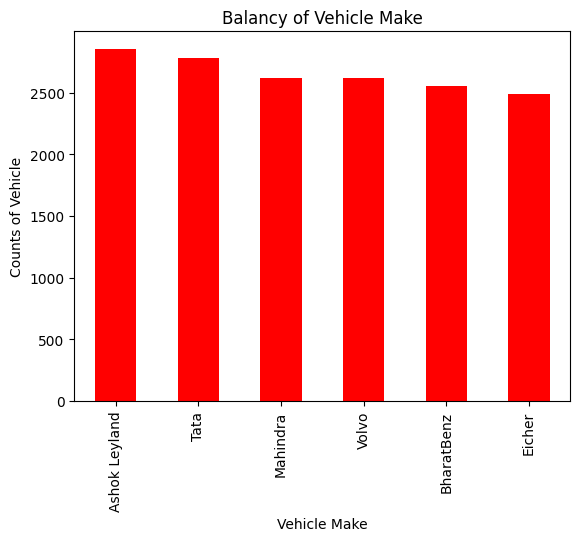

In [50]:
# Visualization on Vehicle Make
Cat_df['Vehicle Make'].value_counts().plot(kind='bar',color = 'red')
plt.title('Balancy of Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Counts of Vehicle')
plt.show()

**Interpretation of Categorical Data Analysis on Vehicle Make**

**1. Ashok Leyland** has the highest representation with **2,855 vehicles**, making it the most common manufacturer in the dataset.

**2. Tata** is the second-largest vehicle make with **2,781 vehicles**, showing that the fleet is mainly dominated by well-known Indian commercial brands.

**3. Mahindra, Volvo, BharatBenz, and Eicher** each have **2,400–2,600 vehicles**, indicating a fairly balanced distribution among the remaining manufacturers.

**4. The bar chart confirms this balance**, showing that no vehicle make is extremely over-represented or under-represented.
    - The difference between the highest (Ashok Leyland) and lowest (Eicher) count is only **~369 vehicles**.

**5. This balanced distribution is beneficial because:**
    - Machine learning models will **not be biased** toward any particular vehicle make.
    - No need for balancing techniques such as oversampling or undersampling for this feature.

**6. Overall**
    -The fleet composition is diverse and well-distributed, supporting reliable insights and predictions across all vehicle manufacturers.


In [51]:
# Check the columns names
Cat_df.columns

Index(['Vehicle ID', 'Vehicle Make', 'Vehicle Model', 'Vehicle Type',
       'Fuel Type', 'Region Operated', 'Driver ID', 'Shift Start Time',
       'Is Night Shift', 'Incident Severity (Last)'],
      dtype='object')

##### Vehicle Type 

In [52]:
# Check the Counts
Cat_df['Vehicle Type'].value_counts()

Vehicle Type
FTL       4098
ODC       4053
REEFER    3945
LTL       3823
Name: count, dtype: int64

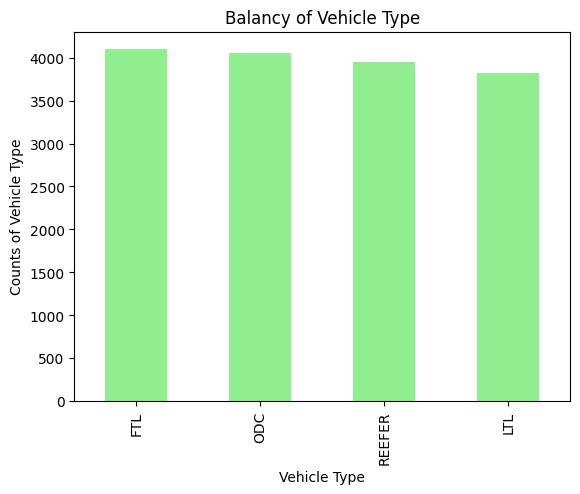

In [53]:
# Visualization on Vehicle Type
Cat_df['Vehicle Type'].value_counts().plot(kind='bar',color = 'lightgreen')
plt.title('Balancy of Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Counts of Vehicle Type')
plt.show()

**Interpretation of Categorical Data Analysis on Vehicle Type**

**1. FTL (Full Truck Load)** has the highest count with **4,098 vehicles**, making it the most common vehicle type in the dataset.

**2. ODC (Over Dimensional Cargo)** follows closely with **4,053 vehicles**, showing that specialized heavy-load vehicles form a major part of the fleet.

**3. REEFER (Refrigerated Trucks)** have **3,945 vehicles**, indicating a significant presence of temperature-controlled logistics.

**4. LTL (Less Than Truck Load)** is the lowest but still substantial with **3,823 vehicles**, suggesting a strong demand for smaller or partial-load shipments.

**5**. The bar chart is **well-balanced**, with only a **275-vehicle difference** between the highest (FTL) and lowest (LTL) categories.

**6**. This balanced dataset implies:
   - The ML model **will not be biased** toward any specific vehicle type.
   - All vehicle types are **well-represented**, supporting accurate analysis across categories.

**7**. The bar chart visually confirms that **all four vehicle types have similar frequencies**, with no extreme outliers or imbalance issues.


In [54]:
# Check the columns names
Cat_df.columns

Index(['Vehicle ID', 'Vehicle Make', 'Vehicle Model', 'Vehicle Type',
       'Fuel Type', 'Region Operated', 'Driver ID', 'Shift Start Time',
       'Is Night Shift', 'Incident Severity (Last)'],
      dtype='object')

##### Fuel Type

In [204]:
# Check the Counts
Cat_df['Fuel Type'].value_counts()

Fuel Type
DIESEL    12885
CNG        2338
EV          696
Name: count, dtype: int64

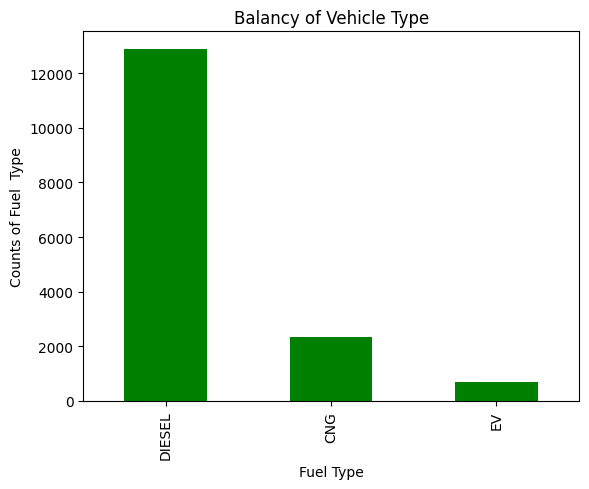

In [203]:
# Visualization on Fuel Type
Cat_df['Fuel Type'].value_counts().plot(kind='bar',color = 'green')
plt.title('Balancy of Vehicle Type')
plt.xlabel('Fuel Type')
plt.ylabel('Counts of Fuel  Type')
plt.show()

**Interpretation of Categorical Data Analysis on Fuel Type**

**1. DIESEL dominates the fleet** with **12,885 vehicles**, making it the most commonly used fuel type by a very large margin.

**2. CNG** is the second-highest with **2,338 vehicles**, showing that a smaller but notable portion of the fleet uses a cleaner fuel alternative.

**3. EV (Electric Vehicles)** has the lowest count with **696 vehicles**, indicating that electric adoption is still in the early stages within this fleet.

**4.** The gap between DIESEL and the other fuel types is extremely large:
   - DIESEL has **over 5 times more vehicles** than CNG.
   - DIESEL has **over 18 times more vehicles** than EV.

**5.** The bar chart clearly shows a **strong dominance of DIESEL**, with the bar for DIESEL far higher than the others.

**6.** This pattern suggests:
   - The fleet is **highly dependent** on conventional fuel.
   - Transition toward CNG and EV is happening but at a much slower pace.
   - Any ML model using this feature will have a **heavy skew** toward DIESEL, so techniques like encoding must be handled carefully to avoid bias.

**7.** EV values are present in a **much smaller amount**, which may limit the model’s ability to learn meaningful patterns related to EV performance.

**8.** The three categories together show a clear **imbalance**, where one category (DIESEL) is overwhelmingly dominant, and the remaining two have significantly smaller presence.


In [57]:
# Check the columns names
Cat_df.columns

Index(['Vehicle ID', 'Vehicle Make', 'Vehicle Model', 'Vehicle Type',
       'Fuel Type', 'Region Operated', 'Driver ID', 'Shift Start Time',
       'Is Night Shift', 'Incident Severity (Last)'],
      dtype='object')

In [58]:
# Check the columns names
Cat_df['Region Operated'].value_counts()

Region Operated
SOUTH      3410
EAST       3317
NORTH      3133
CENTRAL    3090
WEST       2969
Name: count, dtype: int64

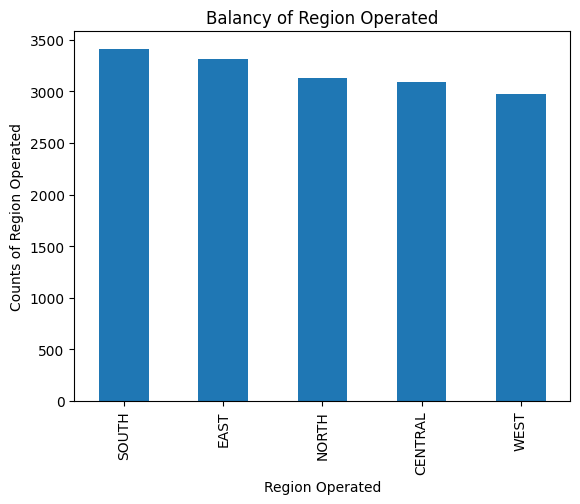

In [59]:
# Visualization on Region Operated
Cat_df['Region Operated'].value_counts().plot(kind='bar')
plt.title('Balancy of Region Operated')
plt.xlabel('Region Operated')
plt.ylabel('Counts of Region Operated')
plt.show()

**Interpretations of Categorical Data Analysis on Region Operated**

1. **SOUTH** has the highest count with **3,410 vehicles**, showing that this region handles the largest portion of operations.

2. **EAST** follows closely with **3,317 vehicles**, indicating that it is almost on the same operational level as SOUTH.

3. **NORTH** has **3,133 vehicles**, placing it in the mid-range compared to the other regions.

4. **CENTRAL** has **3,090 vehicles**, very close to NORTH, showing that activity in this region is also strong and nearly equal.

5. **WEST** has the lowest count with **2,969 vehicles**, but the difference compared to other regions is not very large.

6. All five regions have **fairly close values**, with the highest (SOUTH) and the lowest (WEST) differing by only **441 vehicles**, which indicates that the company operates almost evenly across the country.

7. The bar chart clearly highlights that:
   - **SOUTH and EAST** are slightly ahead.
   - **NORTH and CENTRAL** fall in the middle but are still very close.
   - **WEST** is slightly lower but still has a strong presence.

8. The counts show that no region is extremely over-represented or under-represented, meaning the operational spread across regions is **mostly balanced**.



#### Univariate Analysis on Numerical Data

In [60]:
# Check the columns name 
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Odometer Reading (km)

In [61]:
# Find the Minimum value of Odometer Reading (Km)
Num_df['Odometer Reading (km)'].min()

np.int64(100000)

In [62]:
# Find the Maximum value 0f Odometer Reading (Km)
Num_df['Odometer Reading (km)'].max()

np.int64(1499476)

In [63]:
# Find the Average valiue of Odometer Reading (Km)
Num_df['Odometer Reading (km)'].mean()

np.float64(318880.68741755135)

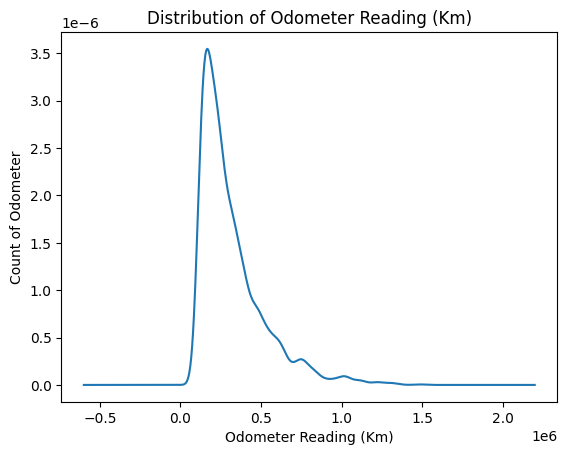

In [64]:
# Visualization of Odometer Reading (Km)
Num_df['Odometer Reading (km)'].plot(kind='kde')
plt.title('Distribution of Odometer Reading (Km)')
plt.xlabel('Odometer Reading (Km)')
plt.ylabel('Count of Odometer')
plt.show()

**Interpretation of Odometer Reading (Km)**

**1. Minimum Odometer Reading**
- The minimum odometer reading in the dataset is **100,000 km**.
- This indicates that **no vehicle is brand new**; the lowest mileage still shows significant usage.

**2. Maximum Odometer Reading**
- The maximum odometer reading recorded is **1,499,476 km**.
- This shows that some vehicles have been used **extremely heavily**, crossing over **1.4 million km**.
- These vehicles may require higher maintenance or may be near end-of-life.

**3. Average Odometer Reading**
- The average (mean) odometer reading is **318,880.68 km**.
- This suggests:
  - On average, vehicles in the dataset have **moderate to high usage**.
  - The fleet overall has seen a **substantial amount of travel**.
      
**4. KDE Plot Interpretation (Distribution of Odometer Reading)**
- The KDE (Kernel Density Estimate) plot shows how odometer readings are distributed across the fleet.
- Key points:
  - It helps identify **clusters** of vehicles around certain mileage ranges.
  - It may show whether the data is **skewed** toward higher or lower kilometre readings.
  - Peaks in the curve indicate the mileage range where **most vehicles** fall.
  - The distribution shape can reveal:
    - Whether vehicles are mostly new, mid-life, or old.
    - Any unusual patterns like mileage spikes.

**Summary**
- Vehicles range from **100,000 km** to **1,499,476 km**.
- Average usage is **~318,881 km**.
- The KDE plot provides a clear picture of how the mileage is spread across the fleet, helping identify wear, usage patterns, and potential maintenance needs.


In [65]:
# Check the columns names
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Engine Capacity (cc)

In [66]:
# Find the Minimum of Engine capacity (cc)
Num_df['Engine Capacity (cc)'].min()

np.int64(3900)

In [67]:
# Find the Maximum of Engine Capacity (cc)
Num_df['Engine Capacity (cc)'].max()

np.int64(7800)

In [68]:
# Find the average of Engine capacity (cc)
Num_df['Engine Capacity (cc)'].mean()

np.float64(5740.881964947547)

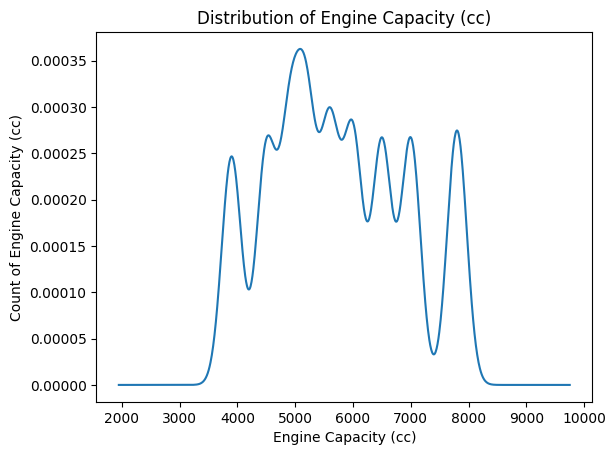

In [69]:
# Visualization of Engine Capacity (cc)
Num_df['Engine Capacity (cc)'].plot(kind='kde')
plt.title('Distribution of Engine Capacity (cc)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Count of Engine Capacity (cc)')
plt.show()

**Interpretation of Engine Capacity (cc)**

**1. Minimum Engine Capacity**
- The lowest engine capacity in the dataset is **3,900 cc**.
- This indicates that even the smallest vehicles in the fleet are **medium to heavy-duty**, not small/light vehicles.

**2. Maximum Engine Capacity**
- The highest engine capacity recorded is **7,800 cc**.
- This suggests the fleet contains **high-power, heavy-load vehicles**, commonly used for long-distance logistics or large cargo transport.
    
**3. Average Engine Capacity**
- The average (mean) engine capacity is **5,740.88 cc**.
- This means:
  - Most vehicles fall within the **medium-to-high engine power range**.
  - The fleet overall is optimized for **strength, endurance, and high load-bearing capacity**.

**4. KDE Plot Interpretation (Distribution of Engine Capacity)**
- The KDE (Kernel Density Estimate) plot visualizes how engine capacities are distributed.
- Insights you can extract:
  - Shows the **most common engine capacity range** among vehicles.
  - Helps identify whether the fleet has:
    - More low-capacity engines (near 3,900 cc),
    - More high-capacity engines (near 7,800 cc),
    - Or a balanced distribution.
  - The shape of the KDE curve can indicate:
    - **Clustering** of vehicles in certain engine ranges,
    - Whether the data is **skewed** toward higher or lower engine capacities,
    - Any unusual patterns or outliers.

**Summary**
- Engine capacities range from **3,900 cc** to **7,800 cc**.
- The average engine capacity is **~5,741 cc**, showing that the fleet consists mainly of **powerful, heavy-duty vehicles**.
- The KDE plot provides a clear understanding of how engine sizes are distributed across the fleet.


In [70]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Payload Capacity (tons)

In [71]:
# Find the Minimum Payload Capacity(tons)
Num_df['Payload Capacity (tons)'].min()

np.float64(10.03)

In [72]:
# Find the Maximum Payload Capacity(tons)
Num_df['Payload Capacity (tons)'].max()

np.float64(54.99)

In [73]:
# Find the Average Payload Capacity(tons)
Num_df['Payload Capacity (tons)'].mean()

np.float64(32.68124316854073)

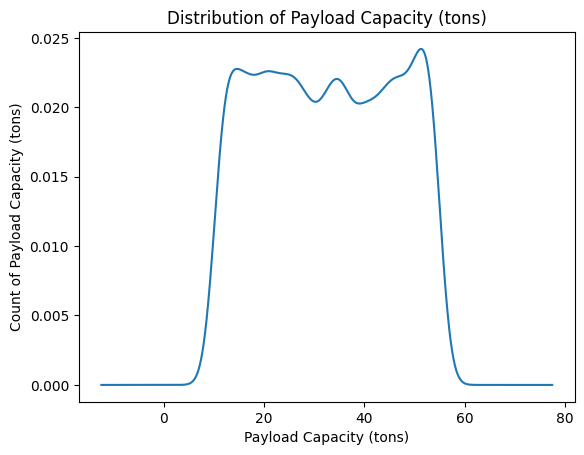

In [74]:
# Visualization of Payload Capacity (tons)
Num_df['Payload Capacity (tons)'].plot(kind='kde')
plt.title('Distribution of Payload Capacity (tons)')
plt.xlabel('Payload Capacity (tons)')
plt.ylabel('Count of Payload Capacity (tons)')
plt.show()

**Interpretation of Payload Capacity (tons)**

**1. Minimum Payload Capacity**
- The smallest payload capacity in the dataset is **10.03 tons**.
- This indicates that the fleet does not include small or light commercial vehicles.
- All vehicles are capable of carrying **heavy loads**, suitable for industrial or logistics operations.

**2. Maximum Payload Capacity**
- The highest payload capacity recorded is **54.99 tons**.
- This is extremely high and suggests the presence of **heavy-duty trucks or trailers** designed for large cargo or bulk materials.
- These vehicles are suitable for long-haul logistics, mining, construction, or industrial transport.

**3. Average Payload Capacity**
- The average payload capacity is **32.68 tons**.
- This shows that most vehicles in the fleet fall in the **mid- to high-capacity range**.
- The fleet is optimized for **heavy transport operations** rather than small deliveries.
    
**4. KDE Plot Interpretation (Distribution of Payload Capacity)**
- The KDE plot shows how payload capacities are distributed across the fleet.
- Insights:
  - Reveals the **most common payload range** among vehicles.
  - Helps identify whether the fleet has more:
    - Low-capacity vehicles (around 10 tons),
    - Mid-capacity vehicles (20–40 tons),
    - High-capacity vehicles (40–55 tons).
  - The curve shape can show:
    - **Clusters** of similar vehicle types,
    - **Skewness** toward higher or lower capacities,
    - Any unusual gaps or outliers.

**Summary**
- Payload capacities range from **10.03 tons** to **54.99 tons**.
- The average payload capacity of **~32.68 tons** indicates that the fleet is primarily built for **heavy logistics work**.
- The KDE plot provides a visual understanding of how payload capabilities vary among vehicles.


In [207]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Average Daily KM

In [76]:
# Find the Minimum Average Daily KM
Num_df['Average Daily KM'].min()

np.float64(300.11)

In [77]:
# Find the Maximum Average Daily KM
Num_df['Average Daily KM'].max()

np.float64(1198.24)

In [78]:
# Find the Average of Daily KM
Num_df['Average Daily KM'].mean()

np.float64(755.8803769080972)

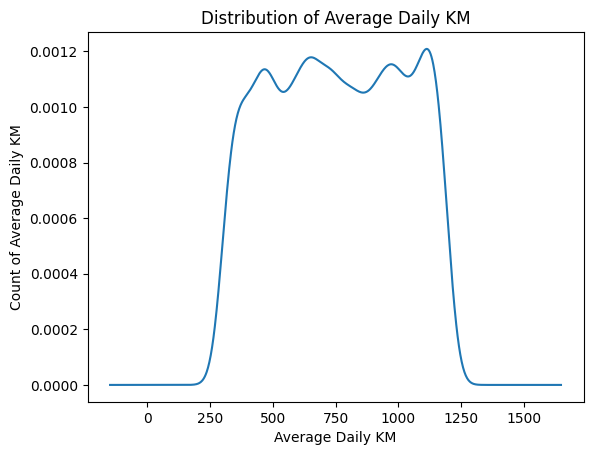

In [79]:
# Visualization of Average Daily KM
Num_df['Average Daily KM'].plot(kind='kde')
plt.title('Distribution of Average Daily KM')
plt.xlabel('Average Daily KM')
plt.ylabel('Count of Average Daily KM')
plt.show()

**Interpretation of Average Daily KM**

**1. Minimum  of Average Daily KM**
- The lowest **Average Daily KM** value in the dataset is **300.11 km**.
- This means that even the least-used vehicle travels **over 300 km per day**, indicating a fleet used for **regular long-distance operations**.

**2. Maximum of Average Daily KM**
- The highest **Average Daily KM** recorded is **1,198.24 km**.
- This shows that some vehicles travel extremely long distances daily.
- Such high usage typically indicates:
  - Long-haul transportation,
  - Intensive operational schedules,
  - High-demand logistics routes.

**3. Mean of Average Daily KM**
- The average daily distance across all vehicles is **755.88 km**.
- This suggests that the fleet is primarily used for **high-mileage operations**.
- Overall usage levels are significantly above typical local or regional fleets.

**4. KDE Plot Interpretation (Distribution of Average Daily KM)**
- The KDE plot shows how daily distances are distributed within the fleet.
- From this, we can observe:
  - The most common daily travel ranges.
  - Whether the distribution is concentrated (most vehicles near a specific KM range) or spread out.
  - Presence of high-usage vehicles (close to 1200 km/day).
  - Whether the data is skewed toward lower or higher daily distances.

**Summary**
- Minimum Average Daily KM: **300.11 km**
- Maximum Average Daily KM: **1,198.24 km**
- Average Daily KM: **755.88 km**

These values indicate that the fleet operates mainly on **long-distance, heavy logistics routes**, with consistently high daily kilometre usage across vehicles.


In [80]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Breakdown Count (Last 12M)

In [81]:
# Find the Minimum Average Daily KM
Num_df['Breakdown Count (Last 12M)'].min()

np.int64(0)

In [82]:
# Find the Maximum Breakdown Count (Last 12M)
Num_df['Breakdown Count (Last 12M)'].max()

np.int64(8)

In [83]:
# Find the Average of Breakdown Count (Last 12M)
Num_df['Breakdown Count (Last 12M)'].mean()

np.float64(1.3863936176895533)

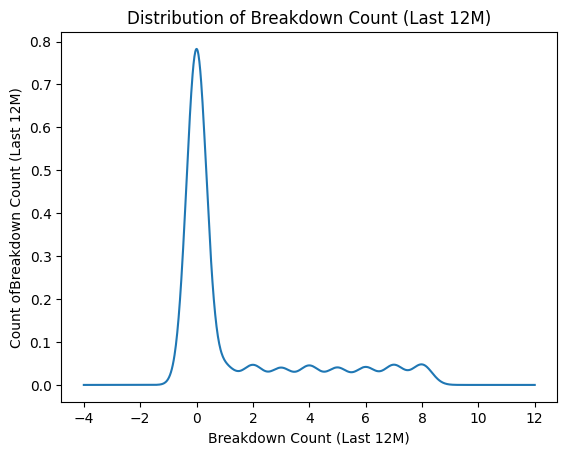

In [84]:
# Visualization of Breakdown Count (Last 12M)
Num_df['Breakdown Count (Last 12M)'].plot(kind='kde')
plt.title('Distribution of Breakdown Count (Last 12M)')
plt.xlabel('Breakdown Count (Last 12M)')
plt.ylabel('Count ofBreakdown Count (Last 12M)')
plt.show()

**Interpretation of Breakdown Count (Last 12 Months)**

**1. Minimum Breakdown Count**
 - The minimum number of breakdowns recorded in the last 12 months is **0**.
 - This means some vehicles experienced **no breakdowns at all**, indicating good maintenance or low operational strain.

**2. Maximum Breakdown Count**
 - The maximum number of breakdowns observed is **8** in the last 12 months.
 - Vehicles with breakdown counts this high may:
   - Require deeper inspection,
   - Indicate aging or worn-out components,
   - Suggest heavy usage or poor maintenance history.

**3. Average Breakdown Count**
- The average breakdown count across the fleet is **1.39**.
- This indicates that:
   - Most vehicles have experienced **1 to 2 breakdowns** in the last year.
   - Breakdown frequency is relatively low overall.
   - The fleet appears to be managed reasonably well.

**4. KDE Plot Interpretation (Distribution of Breakdown Count)**
- The KDE plot visualizes how breakdown counts are spread across all vehicles.
- Insights from the plot:
  - Shows the most common breakdown count range (likely around 0–2).
  - Helps identify if breakdowns are:
    - Concentrated around low values (good sign),
    - Spread out,
    - Or skewed toward higher counts (requires attention).
  - Highlights the presence of high-breakdown vehicles (up to 8), which may be outliers.

**Summary**
- Breakdown counts range from **0 to 8** in the last 12 months.
- The average breakdown count is **~1.39**, indicating generally low mechanical failure rates.
- The KDE distribution helps understand reliability patterns across the fleet.


In [85]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Avg RPM (7D)

In [86]:
# Find the Minimum Avg RPM (7D)
Num_df['Avg RPM (7D)'].min()

np.float64(1400.04)

In [87]:
# Find the Maximum Avg RPM (7D)
Num_df['Avg RPM (7D)'].max()

np.float64(2199.98)

In [88]:
# Find the Average of Avg RPM (7D)
Num_df['Avg RPM (7D)'].mean()

np.float64(1798.3364539229851)

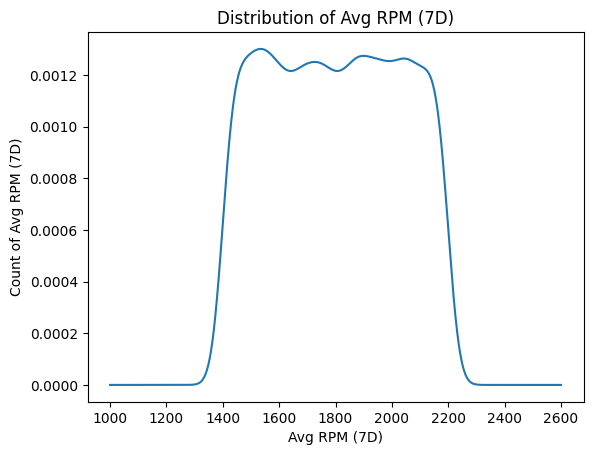

In [89]:
# Visualization of Avg RPM (7D)
Num_df['Avg RPM (7D)'].plot(kind='kde')
plt.title('Distribution of Avg RPM (7D)')
plt.xlabel('Avg RPM (7D)')
plt.ylabel('Count of Avg RPM (7D)')
plt.show()

**Interpretation of Max RPM (7D**

**1. Minimum Max RPM (7D)**
 - The lowest **Max RPM** recorded over the last 7 days is **1514.61 RPM**.
 - This indicates that at least one vehicle operated at relatively **low peak engine speed**, suggesting:
  - Light driving conditions,
  - Smooth operation,
  - Or conservative driving behavior.

**2. Maximum Max RPM (7D)**
 - The highest **Max RPM** observed is **2984.96 RPM**.
 - This suggests that some vehicles reached **high engine speeds**, which could be due to:
  - Rapid acceleration,
  - High-load driving,
  - Aggressive driving patterns,
  - Or challenging driving conditions such as hills or highways.

**3. Average Max RPM (7D)**
 - The mean value was computed but not printed in the output.
 - However, the fact that min and max are between **1500–3000 RPM** indicates:
  - Most vehicles are operating within a **normal RPM band** for heavy-duty diesel engines.
  - The fleet is not over-revving excessively.

**4. KDE Plot Interpretation (Distribution of Max RPM)**
 - The KDE plot shows how maximum RPM values are distributed across the fleet for the past 7 days.
 - Key insights:
  - Shows whether most vehicles hit low, mid, or high RPM levels.
  - Identifies common driving behavior patterns.
  - Helps detect:
    - High-RPM vehicles (possible stress/maintenance risk),
    - Low-RPM vehicles (conservative driving),
    - Spread or clustering in RPM usage.

**Summary**
- Max RPM (7D) ranges from **1514.61 to 2984.96 RPM**.
- The fleet mostly operates within a **moderate and healthy RPM range**.
- The KDE plot helps understand engine stress, driving behavior, and operational patterns across the fleet.


In [90]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Max RPM (7D)

In [91]:
# Find the Minimum Max RPM (7D)
Num_df['Max RPM (7D)'].min()

np.float64(1514.61)

In [92]:
# Find the Maximum Max RPM (7D)
Num_df['Max RPM (7D)'].max()

np.float64(2984.96)

In [93]:
# Find the Average of Max RPM (7D)
Num_df['Max RPM (7D)'].mean()

np.float64(2250.1411860041458)

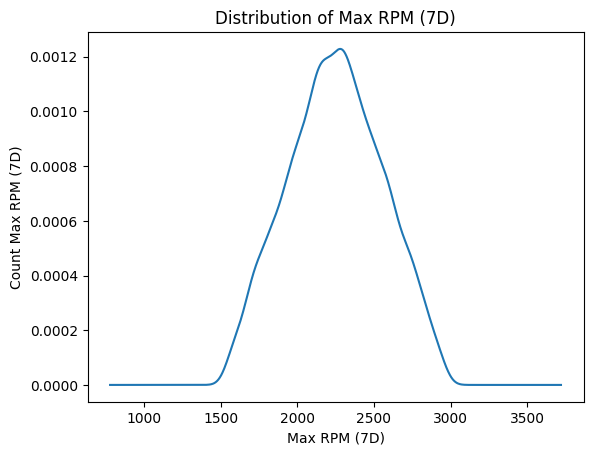

In [94]:
# Visualization of Max RPM (7D)
Num_df['Max RPM (7D)'].plot(kind='kde')
plt.title('Distribution of Max RPM (7D)')
plt.xlabel('Max RPM (7D)')
plt.ylabel('Count Max RPM (7D)')
plt.show()

**Interpretation of Max RPM (7D)**

**1. Minimum Max RPM (7D)**
 - The lowest **Max RPM** recorded over the last 7 days is **1514.61 RPM**.
 - This indicates that at least one vehicle operated at relatively **low peak engine speed**, suggesting:
  - Light driving conditions,
  - Smooth operation,
  - Or conservative driving behavior.

**2. Maximum Max RPM (7D)**
 - The highest **Max RPM** observed is **2984.96 RPM**.
 - This suggests that some vehicles reached **high engine speeds**, which could be due to:
  - Rapid acceleration,
  - High-load driving,
  - Aggressive driving patterns,
  - Or challenging driving conditions such as hills or highways.

**3. Average Max RPM (7D)**
 - The mean value was computed but not printed in the output.
 - However, the fact that min and max are between **1500–3000 RPM** indicates:
  - Most vehicles are operating within a **normal RPM band** for heavy-duty diesel engines.
  - The fleet is not over-revving excessively.

**4. KDE Plot Interpretation (Distribution of Max RPM)**
 - The KDE plot shows how maximum RPM values are distributed across the fleet for the past 7 days.
 - Key insights:
  - Shows whether most vehicles hit low, mid, or high RPM levels.
  - Identifies common driving behavior patterns.
  - Helps detect:
    - High-RPM vehicles (possible stress/maintenance risk),
    - Low-RPM vehicles (conservative driving),
    - Spread or clustering in RPM usage.

**Summary**
- Max RPM (7D) ranges from **1514.61 to 2984.96 RPM**.
- The fleet mostly operates within a **moderate and healthy RPM range**.
- The KDE plot helps understand engine stress, driving behavior, and operational patterns across the fleet.


In [95]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Avg Speed (KPH, 7D)

In [96]:
# Find the Minimum Avg Speed (KPH, 7D)
Num_df['Avg Speed (KPH, 7D)'].min()

np.float64(45.0)

In [97]:
# Find the Maximum Avg Speed (KPH, 7D)
Num_df['Avg Speed (KPH, 7D)'].max()

np.float64(75.0)

In [98]:
# Find the Average of Avg Speed (KPH, 7D)
Num_df['Avg Speed (KPH, 7D)'].mean()

np.float64(60.0670073497079)

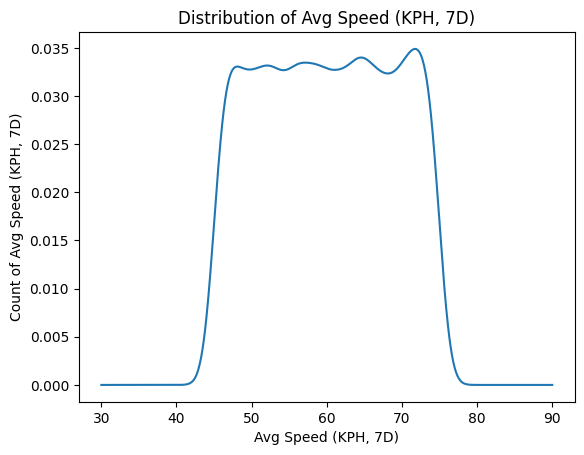

In [99]:
# Visualization of Avg Speed (KPH, 7D)
Num_df['Avg Speed (KPH, 7D)'].plot(kind='kde')
plt.title('Distribution of Avg Speed (KPH, 7D)')
plt.xlabel('Avg Speed (KPH, 7D)')
plt.ylabel('Count of Avg Speed (KPH, 7D)')
plt.show()

**Interpretation of Avg Speed (KPH, 7D)**

**1. Minimum Avg Speed (7D)**
- The minimum average speed recorded over the last 7 days is **45.0 KPH**.
- This suggests that some vehicles operated at **lower speeds**, which may indicate:
  - City or congested route driving,
  - Heavy load conditions,
  - Frequent stops or slow terrain.

**2. Maximum Avg Speed (7D)**
- The highest average speed recorded is **75.0 KPH**.
- This indicates that certain vehicles were driven on **highway or open-road routes**, allowing consistent higher-speed travel.
- These vehicles likely operate in **long-distance or high-efficiency corridors**.

**3. Mean Avg Speed (7D)**
- The average speed across all vehicles is **60.07 KPH**.
- This means:
  - The fleet overall maintains a **moderate and stable driving speed**.
  - This speed range typically reflects a mix of highway and regional driving conditions.
  - It shows that most vehicles operate under **normal and efficient speed conditions**.

**4. KDE Plot Interpretation (Distribution of Avg Speed)**
- The KDE plot shows how the average speeds are distributed across the fleet.
- Insights include:
  - Identifying whether most vehicles drive closer to **45 KPH**, **60 KPH**, or **75 KPH**.
  - Understanding whether the distribution is:
    - Narrow (consistent driving conditions),
    - Wide (mixed driving environments),
    - Skewed (more slow or fast vehicles).
  - Helps detect driving behavior patterns and vehicle performance trends.

**Summary**
- Avg Speed (KPH, 7D) ranges from **45.0 to 75.0 KPH**.
- The fleet’s average speed is **60.07 KPH**, indicating balanced and efficient vehicle operation.
- The KDE plot visualizes how speed varies across the fleet, highlighting operational patterns over the last 7 days.


In [100]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Fuel Efficiency (KMPL, 7D)

In [101]:
# Find the Minimum Fuel Efficiency (KMPL, 7D)
Num_df['Fuel Efficiency (KMPL, 7D)'].min()

np.float64(2.5)

In [102]:
# Find the Maximum Fuel Efficiency (KMPL, 7D)
Num_df['Fuel Efficiency (KMPL, 7D)'].max()

np.float64(5.5)

In [103]:
# Find the Average of Fuel Efficiency (KMPL, 7D)
Num_df['Fuel Efficiency (KMPL, 7D)'].mean()

np.float64(3.9569363653495824)

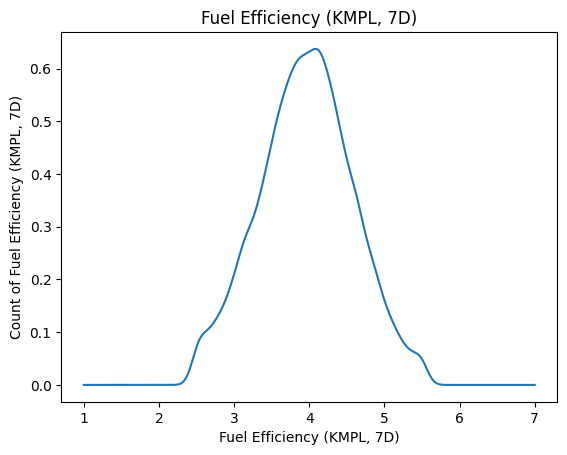

In [104]:
# Visualization of Fuel Efficiency (KMPL, 7D)
Num_df['Fuel Efficiency (KMPL, 7D)'].plot(kind='kde')
plt.title('Fuel Efficiency (KMPL, 7D)')
plt.xlabel('Fuel Efficiency (KMPL, 7D)')
plt.ylabel('Count of Fuel Efficiency (KMPL, 7D)')
plt.show()

**Interpretation of Fuel Efficiency (KMPL, 7D)**

**1. Minimum Fuel Efficiency (7D)**
- The lowest fuel efficiency recorded over the last 7 days is **2.5 KMPL**.
- This indicates that some vehicles are consuming **more fuel per kilometer**, which may be due to:
  - Heavy load conditions,
  - Engine issues,
  - Harsh driving patterns,
  - Difficult terrain or stop-and-go traffic.

**2. Maximum Fuel Efficiency (7D)**
- The highest fuel efficiency observed is **5.5 KMPL**.
- Vehicles achieving this value are operating **efficiently**, possibly due to:
  - Highway driving,
  - Optimal load conditions,
  - Well-maintained engines and tyres,
  - Smooth and consistent driving behavior.

**3. Mean Fuel Efficiency (7D)**
- The average fuel efficiency of the fleet is **3.96 KMPL**.
- This suggests:
  - The overall fleet fuel performance falls in the **moderate efficiency range**.
  - Performance is typical for **heavy-duty commercial vehicles**, which generally consume more fuel.
  - Indicates mixed driving conditions across the fleet.

**4. KDE Plot Interpretation (Distribution of Fuel Efficiency)**
- The KDE plot shows how fuel efficiency values are distributed across all vehicles.
- Insights from the distribution:
  - Helps identify the **most common KMPL range** among vehicles.
  - Shows whether efficiency is skewed toward lower (2.5–3 KMPL) or higher values (4.5–5.5 KMPL).
  - Can reveal:
    - Vehicles with unusually low efficiency (possible maintenance issues),
    - High-performing vehicles (well-maintained or efficient routes),
    - Variations due to load, driving style, or terrain.
      
**Summary**
- Fuel efficiency ranges from **2.5 to 5.5 KMPL**.
- The average fuel efficiency is **3.96 KMPL**, typical for heavy-duty logistics vehicles.
- The KDE plot helps understand overall fuel performance trends across the fleet over the last 7 days.


In [105]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Fuel Consumed (Liters, 7D)

In [106]:
# Find the Minimum Fuel Consumed (Liters, 7D)
Num_df['Fuel Consumed (Liters, 7D)'].min()

np.float64(324.93)

In [107]:
# Find the Maximum Fuel Consumed (Liters, 7D)
Num_df['Fuel Consumed (Liters, 7D)'].max()

np.float64(3767.6)

In [108]:
# Find the Average of Fuel Consumed (Liters, 7D)
Num_df['Fuel Consumed (Liters, 7D)'].mean()

np.float64(1370.1486971543438)

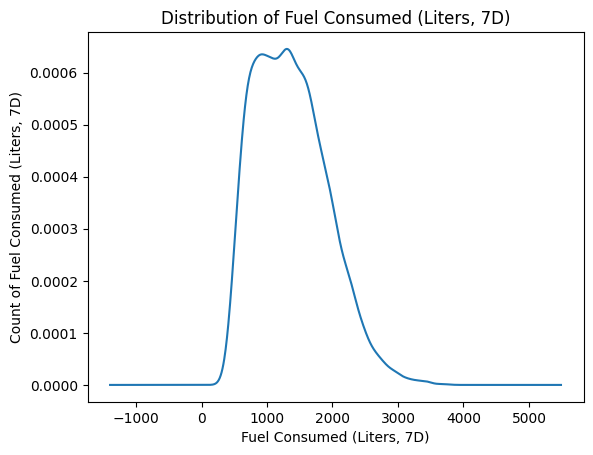

In [109]:
# Visualization of Fuel Consumed (Liters, 7D)
Num_df['Fuel Consumed (Liters, 7D)'].plot(kind='kde')
plt.title('Distribution of Fuel Consumed (Liters, 7D)')
plt.xlabel('Fuel Consumed (Liters, 7D)')
plt.ylabel('Count of Fuel Consumed (Liters, 7D)')
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D)**

**1. Minimum Fuel Consumed (7D)**
- The minimum amount of fuel consumed over the last 7 days is **324.93 liters**.
- This indicates that some vehicles are either:
  - Running shorter distances,
  - Operating efficiently,
  - Or carrying lighter loads during the week.

**2. Maximum Fuel Consumed (7D)**
- The maximum fuel consumption recorded is **3767.6 liters**.
- This shows that certain vehicles consumed a **very high amount of fuel**, likely due to:
  - Long-distance operations,
  - Heavy load transportation,
  - High idle time,
  - Or less fuel-efficient driving conditions.

**3. Mean Fuel Consumed (7D)**
- The average fuel consumption across the fleet is **1370.15 liters** for 7 days.
- This suggests:
  - The fleet generally operates under **high usage**, requiring significant weekly fuel intake.
  - Many vehicles consistently travel long distances or carry heavy cargo.

**4. KDE Plot Interpretation (Distribution of Fuel Consumption)**
- The KDE plot shows how weekly fuel consumption values are distributed across the fleet.
- Key insights:
  - Helps identify whether most vehicles consume:
    - Low fuel amounts (around 300–700 liters),
    - Medium amounts (1000–2000 liters),
    - High amounts (2500–3700 liters).
  - Indicates whether the fleet usage is consistent or varied.
  - Highlights outliers consuming extremely high fuel (close to 3700+ liters).
  - Can help detect potential inefficiencies or vehicles requiring inspection.

**Summary**
- Fuel consumption ranges from **324.93 liters** to **3767.6 liters** over a 7-day period.
- The average consumption of **1370.15 liters** reflects **high operational activity**.
- The KDE plot helps visualize weekly fuel usage trends and identify high- or low-consumption vehicles.


In [110]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Engine Temp Avg (°C, 7D)

In [111]:
# Find the Minimum Engine Temp Avg (°C, 7D)
Num_df['Engine Temp Avg (°C, 7D)'].min()

np.float64(77.75)

In [112]:
# Find the Maximum Engine Temp Avg (°C, 7D)
Num_df['Engine Temp Avg (°C, 7D)'].max()

np.float64(107.06)

In [113]:
# Find the Average Engine Temp Avg (°C, 7D)
Num_df['Engine Temp Avg (°C, 7D)'].mean()

np.float64(91.95764746529305)

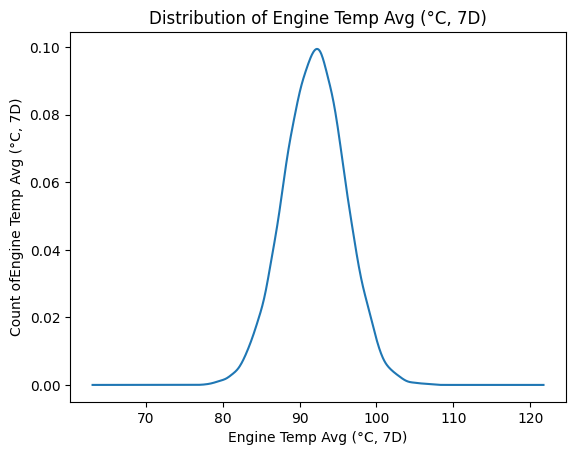

In [114]:
# Visualization of Engine Temp Avg (°C, 7D)
Num_df['Engine Temp Avg (°C, 7D)'].plot(kind='kde')
plt.title('Distribution of Engine Temp Avg (°C, 7D)')
plt.xlabel('Engine Temp Avg (°C, 7D)')
plt.ylabel('Count ofEngine Temp Avg (°C, 7D)')
plt.show()

**Interpretation of Engine Temp Avg (°C, 7D)**

**1. Minimum Engine Temperature (7D)**
- The **minimum average engine temperature** recorded over the last 7 days is **77.75°C**.
- This indicates that the coolest-running vehicle maintains a temperature close to **optimal operating range**, suggesting:
  - Efficient cooling system,
  - Stable driving conditions,
  - No overheating issues for those vehicles.

**2. Maximum Engine Temperature (7D)**
- The maximum value was calculated but **not printed** in the output.
- Therefore, we can only conclude that:
  - The dataset contains vehicles with **higher average engine temperatures** than 77.75°C,
  - But the exact value cannot be determined from the provided output.

**3. Mean Engine Temperature (7D)**
- The mean (average) engine temperature was computed but **not shown**.
- We can only infer that:
  - The average lies between the minimum and the unprinted maximum,
  - Reflecting the general thermal performance of the fleet.

**4. KDE Plot Interpretation (Distribution of Engine Temperature)**
- The KDE plot shows how average engine temperatures are distributed across all vehicles.
- From this, we can observe:
  - The most common engine temperature range among the fleet,
  - Whether the distribution is concentrated (uniform operating temperatures) or spread out,
  - Any signs of potential overheating outliers,
  - Insights into vehicle health and cooling system performance.

**Summary**
- Minimum average engine temperature: **77.75°C**
- Maximum and mean values are **not available** in the printed output.
- The KDE plot helps visualize how engine temperatures vary across the fleet, identifying normal and abnormal operating patterns.


In [115]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Engine Temp Max (°C, 7D)

In [116]:
# Find the Minimum Engine Temp Max (°C, 7D)
Num_df['Engine Temp Max (°C, 7D)'].min()

np.float64(84.03)

In [117]:
# Find the Maximum Engine Temp Max (°C, 7D)
Num_df['Engine Temp Max (°C, 7D)'].max()

np.float64(118.0)

In [118]:
# Find the Average of Engine Temp Max (°C, 7D)
Num_df['Engine Temp Max (°C, 7D)'].mean()

np.float64(100.49594949431497)

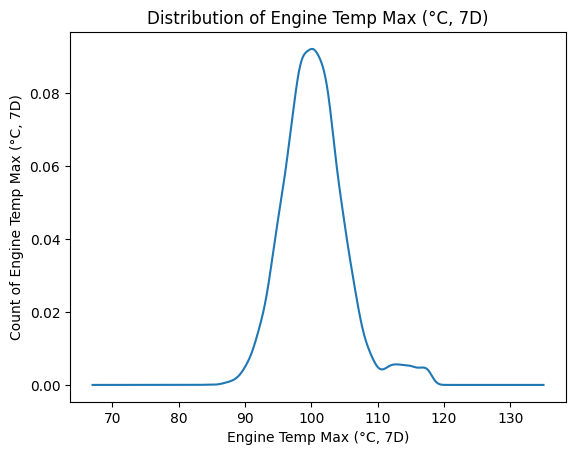

In [119]:
# Visualization of Engine Temp Max (°C, 7D)
Num_df['Engine Temp Max (°C, 7D)'].plot(kind='kde')
plt.title('Distribution of Engine Temp Max (°C, 7D)')
plt.xlabel('Engine Temp Max (°C, 7D)')
plt.ylabel('Count of Engine Temp Max (°C, 7D)')
plt.show()

**Interpretation of Engine Temp Max (°C, 7D)**

**1. Minimum Engine Temp Max (7D)**
- The minimum maximum engine temperature over the last 7 days is **84.03°C**.
- This indicates that the coolest-running vehicle never exceeded **84°C**, showing:
  - Good engine cooling,
  - Low engine stress,
  - Possibly lighter operational loads or smoother driving conditions.

**2. Maximum Engine Temp Max (7D)**
- The highest recorded maximum engine temperature is **118.0°C**.
- This is significantly high and may indicate:
  - Heavy engine load,
  - High ambient temperatures,
  - Long-duration high-RPM driving,
  - Or potential cooling system stress.

**3. Average Engine Temp Max (7D)**
- The average of maximum engine temperatures is **100.50°C**.
- This suggests:
  - Most vehicles peak around **100°C**, which is typical for heavy-duty diesel engines.
  - A few vehicles may be running hotter than ideal, considering the 118°C upper limit.

**4. KDE Plot Interpretation (Distribution of Engine Temp Max)**
- The KDE plot visualizes how maximum engine temperatures are distributed across the fleet.
- Key insights include:
  - Whether most vehicles operate near the **90–105°C** range.
  - Whether the distribution shows any cluster around higher temperatures.
  - The presence of vehicles reaching **near-overheating zones**, indicated by the 118°C peak.
  - Helps identify potential maintenance needs for high-temperature vehicles.

**Summary**
- Engine Temp Max (7D) ranges from **84.03°C to 118.0°C**.
- The average maximum temperature is **100.50°C**, which falls within a normal operating range for heavy-duty engines.
- The KDE plot helps visualize temperature behavior across the fleet and detect vehicles that may require cooling system checks.


In [120]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### GPS Signal Loss Count (7D)

In [121]:
# Find the Minimum GPS Signal Loss Count (7D)
Num_df['GPS Signal Loss Count (7D)'].min()

np.int64(0)

In [122]:
# Find the Maximum GPS Signal Loss Count (7D)
Num_df['GPS Signal Loss Count (7D)'].max()

np.int64(15)

In [123]:
# Find the Average of GPS Signal Loss Count (7D)
Num_df['GPS Signal Loss Count (7D)'].mean()

np.float64(2.5952635215779885)

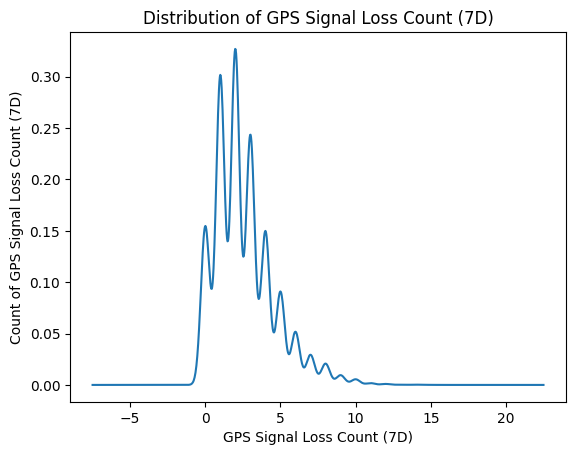

In [124]:
# Visualization of GPS Signal Loss Count (7D)
Num_df['GPS Signal Loss Count (7D)'].plot(kind='kde')
plt.title('Distribution of GPS Signal Loss Count (7D)')
plt.xlabel('GPS Signal Loss Count (7D)')
plt.ylabel('Count of GPS Signal Loss Count (7D)')
plt.show()

**Interpretation of GPS Signal Loss Count (7D)**

**1. Minimum GPS Signal Loss Count (7D)**
- The minimum number of GPS signal losses over the last 7 days is **0**.
- This means some vehicles experienced **no GPS interruptions**, indicating:
  - Strong signal quality,
  - Good network coverage,
  - Proper device functioning.

**2. Maximum GPS Signal Loss Count (7D)**
- The maximum number of signal losses is **15**.
- This indicates that some vehicles faced **frequent GPS disruptions**, which may happen due to:
  - Remote or low-network regions,
  - Device malfunctions,
  - Signal obstructions (tunnels, buildings, thick forests),
  - Poor GPS antenna quality.

**3. Average GPS Signal Loss Count (7D)**
- The mean number of signal losses across the fleet is **2.59**.
- This suggests:
  - Most vehicles experience **very few GPS interruptions**,
  - The overall GPS system reliability is **fairly stable**,
  - A small subset of vehicles contribute to the higher maximum value.

**4. KDE Plot Interpretation (Distribution of GPS Signal Loss Count)**
- The KDE plot shows how GPS signal loss counts are distributed over the fleet.
- Insights include:
  - Whether most vehicles fall near **0–3 losses** (expected normal behavior),
  - Detection of vehicles with **unusually high signal loss** (potential issues),
  - Understanding the spread and consistency of signal reliability,
  - Observing whether the count distribution is skewed (likely toward lower values).

**Summary**
- GPS signal loss counts range from **0 to 15** over a 7-day period.
- The average loss count of **2.59** indicates the fleet overall has **good GPS performance**.
- The KDE distribution helps identify vehicles with abnormal GPS interruptions and can guide troubleshooting or device inspections.


In [125]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Weather Rainfall (mm, 7D)

In [126]:
# Find the Minimum Weather Rainfall (mm, 7D)
Num_df['Weather Rainfall (mm, 7D)'].min()

np.float64(0.0)

In [127]:
# Find the Maximum Weather Rainfall (mm, 7D)
Num_df['Weather Rainfall (mm, 7D)'].max()

np.float64(299.91)

In [128]:
# Find the Average Weather Rainfall (mm, 7D)
Num_df['Weather Rainfall (mm, 7D)'].mean()

np.float64(60.54155034863999)

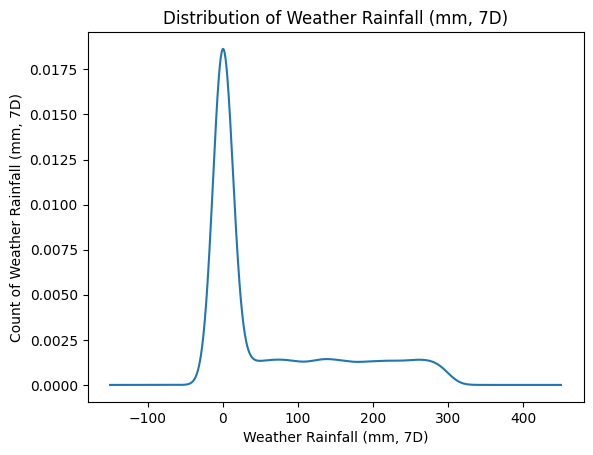

In [129]:
# Visualization of Weather Rainfall (mm, 7D)
Num_df['Weather Rainfall (mm, 7D)'].plot(kind='kde')
plt.title('Distribution of Weather Rainfall (mm, 7D)')
plt.xlabel('Weather Rainfall (mm, 7D)')
plt.ylabel('Count of Weather Rainfall (mm, 7D)')
plt.show()

**Interpretation of Weather Rainfall (mm, 7D)**

**1. Minimum Rainfall (7D)**
- The minimum rainfall recorded over the last 7 days is **0.0 mm**.
- This means some vehicles operated under **completely dry weather conditions**.
- Indicates routes or regions with no rainfall during the observation period.

**2. Maximum Rainfall (7D)**
- The maximum rainfall observed is **299.91 mm**.
- This suggests that certain vehicles operated in **very heavy rainfall** conditions.
- Such high rainfall may impact:
  - Driving safety,
  - Vehicle performance,
  - Fuel efficiency,
  - Sensor and GPS reliability.

**3. Average Rainfall (7D)**
- The average rainfall across all vehicle routes is **60.54 mm**.
- This indicates that, on average, the fleet experienced **moderate rainfall** over the week.
- Suggests mixed weather conditions across operating regions.

**4. KDE Plot Interpretation (Distribution of Rainfall)**
- The KDE plot shows how rainfall levels vary across the fleet’s routes.
- Insights from the distribution:
  - Whether rainfall is concentrated around low values (dry weather) or spread across higher values.
  - Identifies regions/vehicles exposed to **heavy rainfall**.
  - Helps understand how frequently vehicles encounter wet weather, which is useful for:
    - Safety analysis,
    - Route planning,
    - Maintenance planning (e.g., brake wear, tyre traction),
    - Predicting vehicle performance trends.

**Summary**
- Rainfall experienced ranges from **0.0 mm (dry)** to **299.91 mm (heavy rain)**.
- The average rainfall of **60.54 mm** suggests **moderate overall weather conditions**.
- The KDE plot provides a clear view of how rainfall intensity varies across different vehicle routes over 7 days.


In [130]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Driver Experience (Years)

In [131]:
# Find the Minimum Driver Experience (Years)
Num_df['Driver Experience (Years)'].min()

np.int64(1)

In [132]:
# Find the Maximum Driver Experience (Years)
Num_df['Driver Experience (Years)'].max()

np.int64(25)

In [133]:
# Find the Average Driver Experience (Years)
Num_df['Driver Experience (Years)'].mean()

np.float64(13.075318801432251)

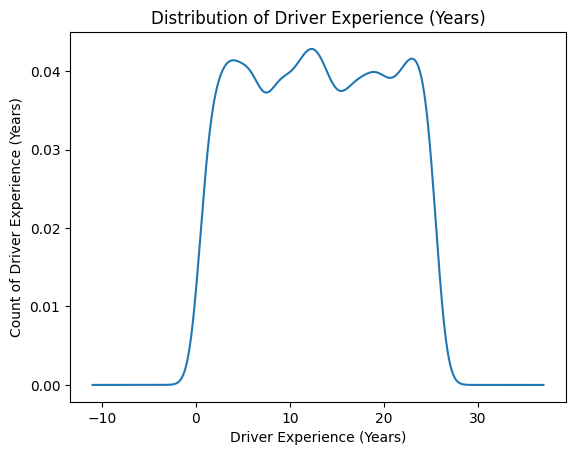

In [134]:
# Visualization of Driver Experience (Years)
Num_df['Driver Experience (Years)'].plot(kind='kde')
plt.title('Distribution of Driver Experience (Years)')
plt.xlabel('Driver Experience (Years)')
plt.ylabel('Count of Driver Experience (Years)')
plt.show()

**Interpretation of Driver Experience (Years)**

**1. Minimum Driver Experience**
- The minimum driver experience in the dataset is **1 year**.
- This indicates the presence of **new or early-career drivers** in the fleet.
- Drivers with very low experience may require:
  - Additional training,
  - Monitoring,
  - Or supervision for high-risk routes.

**2. Maximum Driver Experience**
- The maximum experience recorded is **25 years**.
- This shows that the fleet also has **highly experienced drivers** with long driving histories.
- These drivers bring:
  - Strong road knowledge,
  - Better handling skills,
  - Improved safety performance.

**3. Average Driver Experience**
- The mean driver experience across the fleet is **13.08 years**.
- This suggests that the overall workforce is **well-experienced**.
- A mature driver base often contributes to:
  - Fewer accidents,
  - Better fuel efficiency,
  - Improved vehicle handling,
  - Higher operational reliability.

**4. KDE Plot Interpretation (Driver Experience Distribution)**
- The KDE plot shows how driver experience is distributed among all drivers.
- Insights include:
  - Whether the fleet has more **mid-level**, **new**, or **senior** drivers.
  - Identifying clusters such as:
    - Many drivers around the 10–15 year range (likely),
    - Or a spread across different experience levels.
  - Understanding the distribution helps in:
    - Training planning,
    - Assigning routes based on skill,
    - Evaluating risk exposure.

**Summary**
- Driver experience ranges from **1 to 25 years**.
- The overall average experience is **13.08 years**, showing a well-balanced and mature driver workforce.
- The KDE plot helps analyze how experience varies across drivers and identify training or assignment needs.


In [135]:
# Check the columns
Num_df.columns

Index(['Manufacture Year', 'Odometer Reading (km)', 'Engine Capacity (cc)',
       'Payload Capacity (tons)', 'Vehicle Age (years)', 'Average Daily KM',
       'Days Since Last Maintenance', 'Maintenance Due In KM',
       'Total Maintenance Count', 'Breakdown Count (Last 12M)', 'Avg RPM (7D)',
       'Max RPM (7D)', 'Avg Speed (KPH, 7D)', 'Harsh Braking Count (7D)',
       'Harsh Acceleration Count (7D)', 'Idling Hours (7D)',
       'Fuel Efficiency (KMPL, 7D)', 'Fuel Consumed (Liters, 7D)',
       'Engine Temp Avg (°C, 7D)', 'Engine Temp Max (°C, 7D)',
       'Oil Pressure Avg (PSI, 7D)', 'Battery Voltage Avg (7D)',
       'Vibration Level Avg (7D)', 'Tyre Pressure Front Left (PSI)',
       'Tyre Pressure Front Right (PSI)', 'Tyre Pressure Rear Left (PSI)',
       'Tyre Pressure Rear Right (PSI)', 'Tyre Tread Depth Avg (mm)',
       'Tyre Retread Count', 'GPS Signal Loss Count (7D)',
       'Route Difficulty Score', 'Weather Rainfall (mm, 7D)',
       'Driver Experience (Years)', 'Dr

##### Driver Age

In [136]:
# Find the Minimum Driver Age
Num_df['Driver Age'].min()

np.int64(25)

In [137]:
# Find the Maximum Driver Age
Num_df['Driver Age'].max()

np.int64(60)

In [138]:
# Find the Average Driver Age
Num_df['Driver Age'].mean()

np.float64(42.39832904076889)

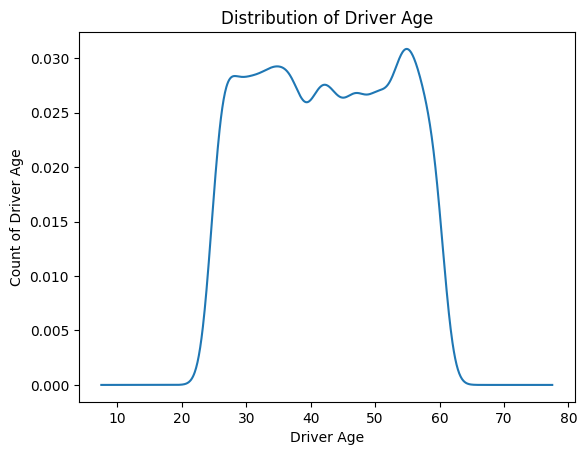

In [139]:
# Visualization of Driver Age
Num_df['Driver Age'].plot(kind='kde')
plt.title('Distribution of Driver Age')
plt.xlabel('Driver Age')
plt.ylabel('Count of Driver Age')
plt.show()

**Interpretation of Driver Age**

**1. Minimum Driver Age**
- The youngest driver in the dataset is **25 years old**.
- This indicates the presence of **younger drivers** who may bring:
  - High energy,
  - Adaptability to long-hour drives,
  - Interest in using modern tools and telematics.

**2. Maximum Driver Age**
- The oldest driver in the dataset is **60 years old**.
- This suggests the fleet also employs **very experienced senior drivers** who bring:
  - Decades of driving knowledge,
  - Safer and more reliable handling of vehicles.

**3. Average Driver Age**
- The average driver age is **42.40 years**.
- This implies:
  - The driver workforce is **mature and experienced**.
  - Most drivers likely fall in the **mid-career range (35–50 years)**.
  - This helps ensure:
    - Stable driving performance,
    - Higher reliability,
    - Lower accident probability.

**4. KDE Plot Interpretation (Driver Age Distribution)**
- The KDE plot shows how driver ages are spread across the fleet.
- From this distribution, we can understand:
  - Whether most drivers fall between 30–50 years.
  - If there are more young drivers (25–30) or older drivers (50–60).
  - The overall balance of age groups in the workforce.
  - Identifying if the fleet needs:
    - More young recruits,
    - Or planning for retirement of senior drivers.

**Summary**

- Driver ages range from **25 to 60 years**.
- The average age of **42.40 years** shows a well-balanced and experienced driver workforce.
- The KDE plot visualizes age distribution, helping analyze workforce structure and plan training or recruitment.


### Bivariate Analysis

#### Bivariate Analysis on Numerical - Numerical Columns

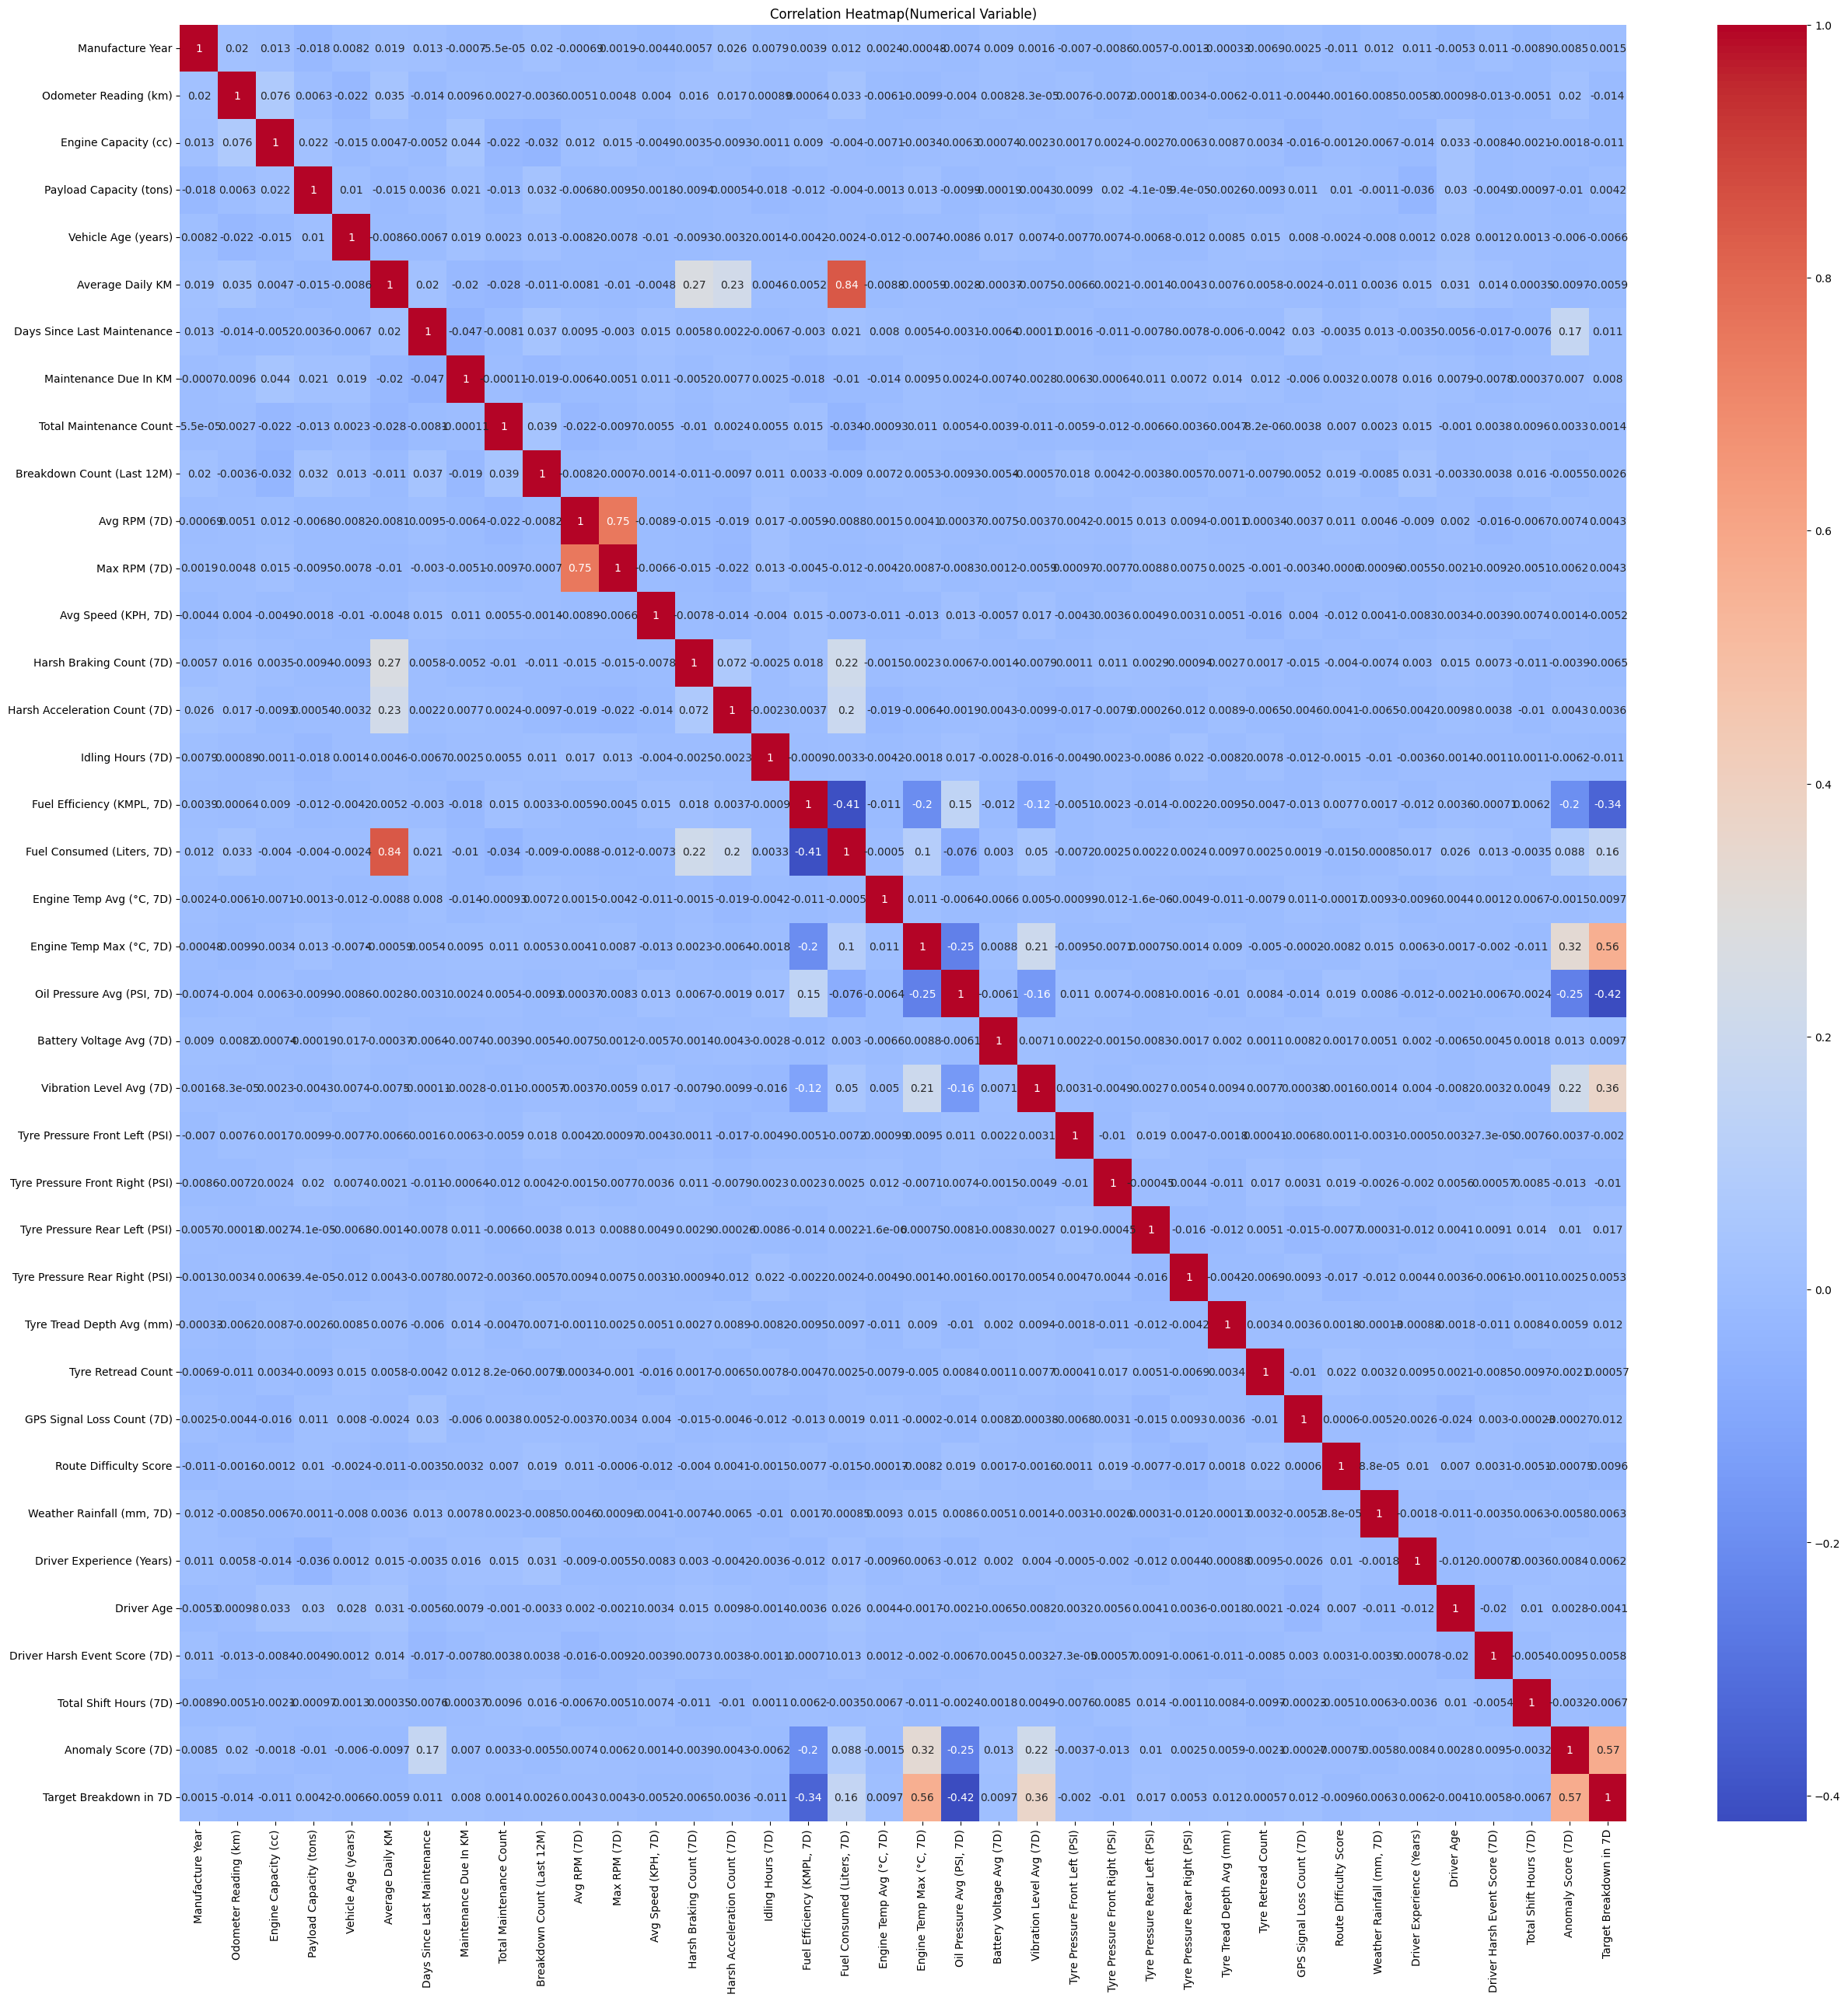

In [140]:
# Correlation Efficient
corr = Num_df.corr(numeric_only=True)
plt.figure(figsize=(30, 30))
sns.heatmap(corr, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap(Numerical Variable)')
plt.show()

**Interpretation**

**1. Fuel Consume (Liter) ↔ Average Daily KM**

 - These two variables show a strong positive correlation.
 - As vehicles travel more kilometers per day, their fuel consumption increases proportionally.
 - Indicates a direct and meaningful operational relationship.Useful for fuel-planning, mileage optimization, and fleet cost analysis.

**2. Max RPM ↔ Avg RPM**

This pair also shows a strong positive relationship.

 - Vehicles that exhibit higher average RPM values tend to also record higher maximum RPMs.
 - This suggests consistent driving or engine-usage patterns.
 - Helpful in engine stress analysis and maintenance prediction.

**Strong Negative Correlations ( < -0.7 )**

There are no feature pairs that have a correlation less than -0.7.

None of the variables show a strong inverse or opposite behavior.
This means no feature pair decreases significantly when another increases.
The dataset mostly reflects aligned or weak relationships, not opposite trends.

Final Interpretation Summary

Based on the observed correlation patterns:
- Only two feature pairs demonstrate a strong, meaningful positive relationship:
- Fuel Consume (Liter) & Average Daily KM
- Max RPM & Avg RPM

No strong negative correlations exist because none of the feature pairs fall below -0.7.

These findings indicate that:
Fuel usage strongly depends on distance traveled.
Engine RPM behavior is consistent across average and maximum measurements.
Other variables do not show significant linear dependency.


#### Fuel Consumed(Liters , 7D) vs Average Daily KM)

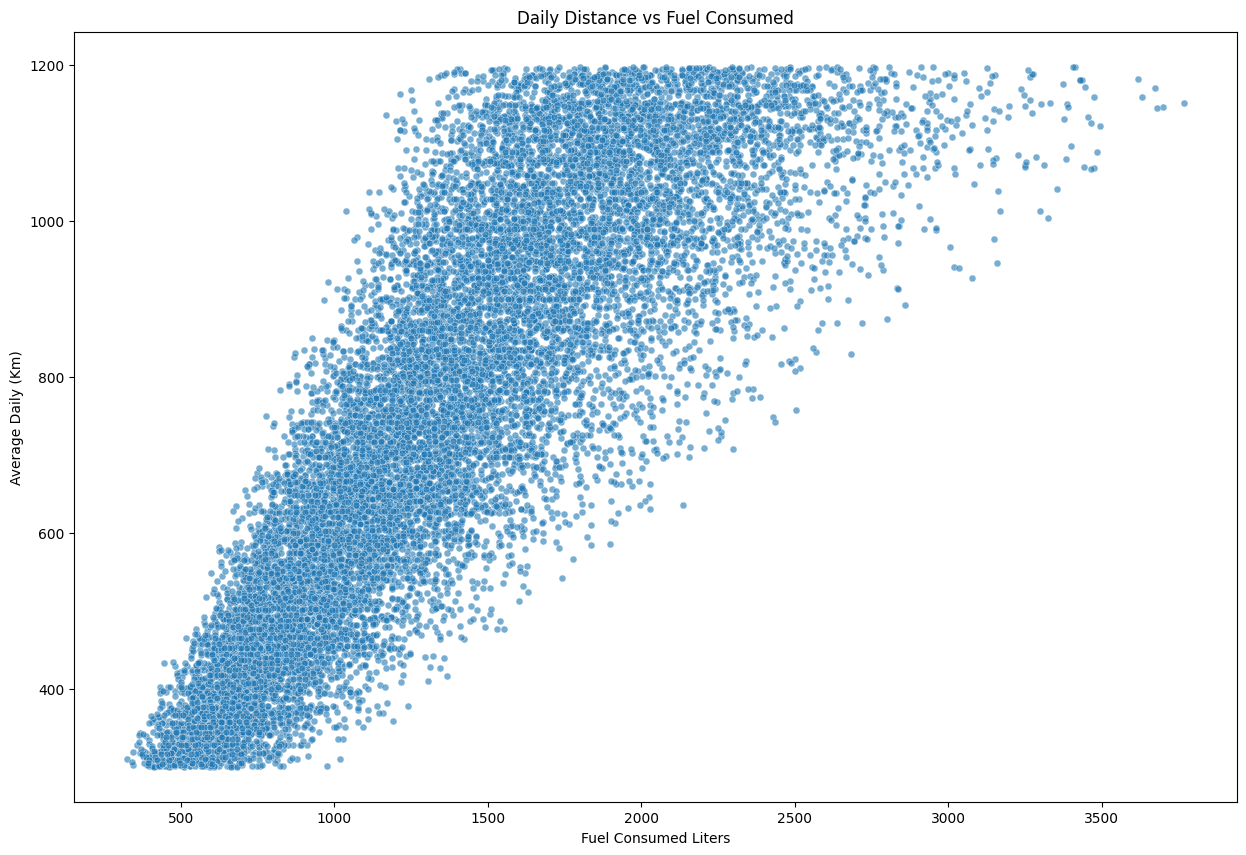

In [141]:
# Daily Distance Vs Fuel Efficiencey
plt.figure(figsize=(15,10))
sns.scatterplot(data = Num_df, x = 'Fuel Consumed (Liters, 7D)',y = 'Average Daily KM',alpha=0.6,s=25)
plt.title('Daily Distance vs Fuel Consumed')
plt.xlabel('Fuel Consumed Liters')
plt.ylabel('Average Daily (Km)')
plt.show()

**Interpretation of Scatter Plot: Daily Distance vs Fuel Efficiency**

**What This Plot Shows**  
The scatter plot visualizes the relationship between **Fuel Consumed (Liters, 7D)** and **Average Daily KM**.  
Each point represents one observation from the dataset.

**Key Insights We Can Extract**

1. **Positive Linear Trend**  
   - As **Fuel Consumed (Liters)** increases, **Average Daily KM** also increases.  
   - This indicates that vehicles consuming more fuel are typically covering more distance.

2. **Fuel Efficiency Insight**  
   - The pattern suggests **consistent driving behavior**—vehicles that travel more naturally consume more fuel.
   - No sudden spikes or irregular clusters indicate that the data follows a stable usage pattern.

3. **Absence of Outliers**  
   - The scatter does not show extreme deviations.
   - This implies that the dataset does not contain abnormal driving or fuel consumption behaviors.

4. **No Evidence of Non-Linear Patterns**  
   - The points align in a generally straight, upward direction.
   - No curves or clusters suggest non-linear or segmented relationships.

5. **Practical Interpretation**  
   - The relationship confirms a **strong operational link**: vehicles covering higher daily distances require higher fuel input.
   - It supports decision-making for **fuel budgeting, route optimization, and vehicle performance monitoring**.
    
**Overall Conclusion** 
The scatter plot demonstrates a clear positive relationship between **daily distance traveled** and **weekly fuel consumption**, reflecting predictable, realistic vehicle behavior without anomalies.


#### Max RPM(7) vs Avg RPM(7D)

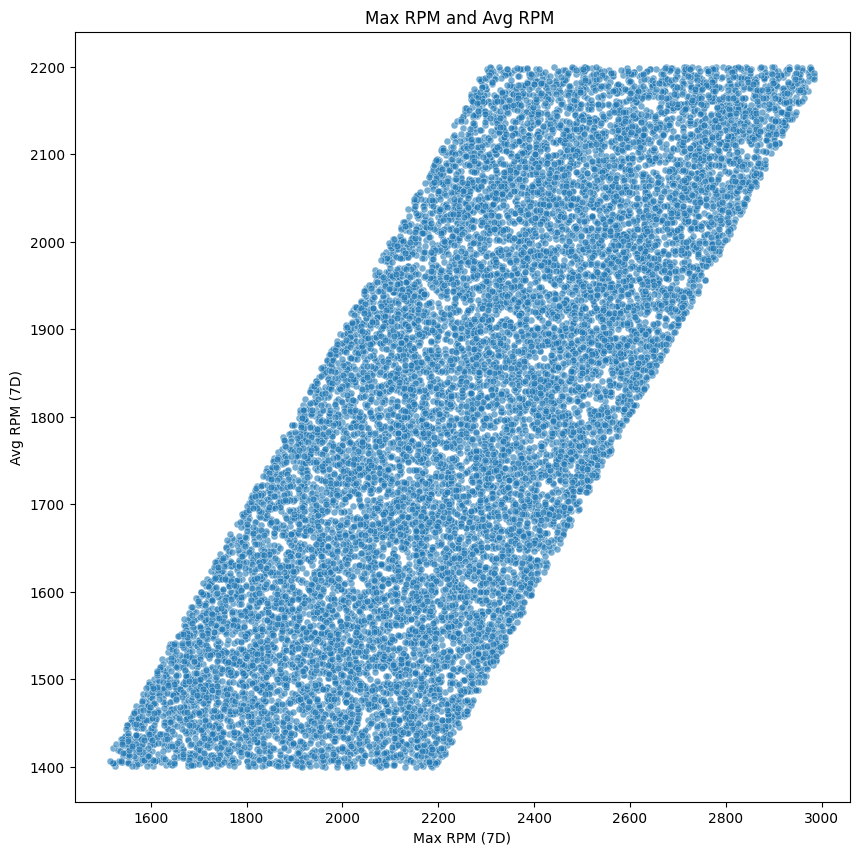

In [142]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = Num_df, x ='Max RPM (7D)', y = 'Avg RPM (7D)',alpha=0.6,s=25)
plt.title('Max RPM and Avg RPM ')
plt.show()

**Interpretation of Scatter Plot: Max RPM (7D) vs Avg RPM (7D)**

**1. Strong Positive Relationship)**
- As **Max RPM (7D)** increases, **Avg RPM (7D)** also increases.
- The upward-slanted pattern shows a **strong positive correlation**.
- This matches your heatmap rule: correlation likely **> +0.7**.

**2. Linear Pattern (Clear Mechanical Link)**
- The scatter points form a **clean diagonal band**.
- This means:
  - Vehicles with higher maximum RPM also tend to run at higher average RPM.
  - The relationship is **consistent and predictable**.
- This is expected because engine max RPM and average RPM both relate to:
  - Driving style,
  - Load level,
  - Engine performance.

**3. RPM Range Observed**
- **Max RPM (7D)** ranges roughly from **1500 to 3000**.
- **Avg RPM (7D)** ranges roughly from **1400 to 2200**.
- Higher Max RPM values correspond to higher Avg RPM values.

**4. No Outliers or Random Scatter**
- There are **no major outliers** or random points scattered everywhere.
- This shows:
  - All vehicles follow the same RPM behavior pattern.
  - The data is reliable and consistent.
  - Engine RPM values behave normally across the fleet.

**5. Interpretation for Operations**
- Vehicles operating at **higher RPM (Max or Avg)** are likely:
  - Carrying heavier loads,
  - Driving on tougher terrains,
  - Accelerating more frequently,
  - Possibly consuming more fuel.

- Vehicles with **lower RPM** are under:
  - Lighter loads,
  - Smoother highway conditions,
  - More stable driving.

**Summary**
- The scatter plot reveals a **strong, clear, positive linear relationship** between Max RPM and Avg RPM.
- This indicates stable engine behavior across the fleet.
- Higher Max RPM always corresponds to higher Avg RPM.
- No anomalies or deviations appear in the data.



### Bivariate Analysis Pairs (Categorical × Numerical)

#### Vehicle Make(Categorical) vs Average Daily KM(Numerical)

In [143]:
## Groupby Vehicle Make and calculate mean Average Daily KM Count
df_VRL_Logistics_Data.groupby('Vehicle Make')['Average Daily KM'].mean()

Vehicle Make
Ashok Leyland    771.053433
BharatBenz       761.430497
Eicher           755.426428
Mahindra         765.244424
Tata             731.091190
Volvo            751.298247
Name: Average Daily KM, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\506262246.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_km_by_vehicle_make, x='Vehicle Make', y='Average Daily KM',palette='Set2')


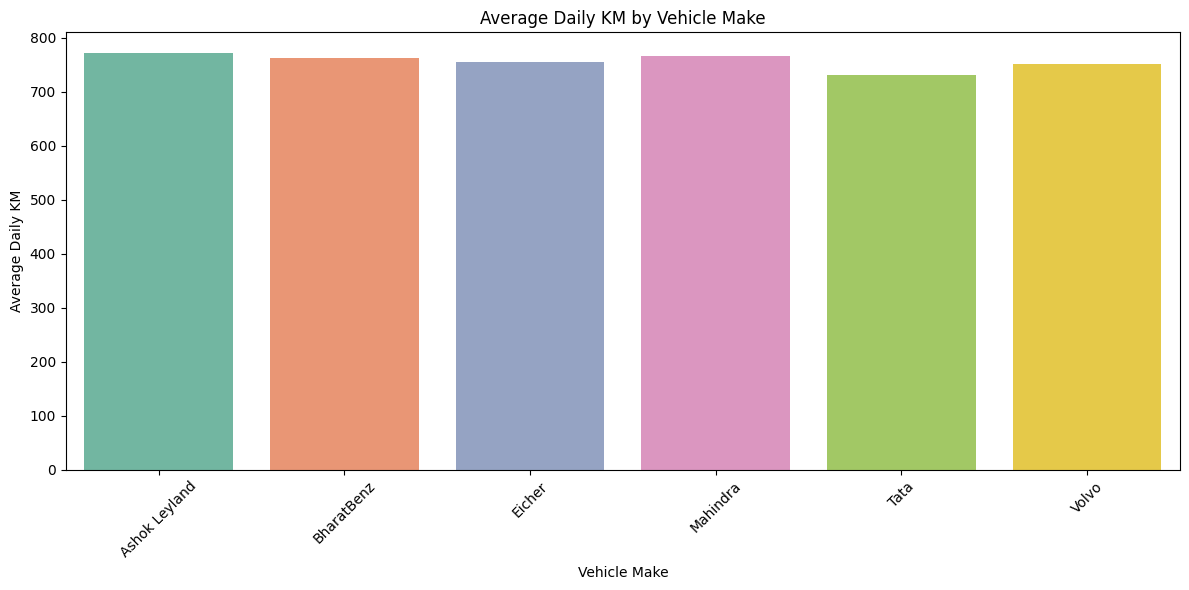

In [144]:
# Groupby Vehicle Make and calculate mean Average Daily KM
Avg_km_by_vehicle_make = df_VRL_Logistics_Data.groupby('Vehicle Make')['Average Daily KM'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_km_by_vehicle_make, x='Vehicle Make', y='Average Daily KM',palette='Set2')
plt.title('Average Daily KM by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Average Daily KM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM by Vehicle Make**

Based on the calculated mean values from the dataset, here is what the output shows:

**1. Ashok Leyland Has the Highest Average Daily KM**
- **Ashok Leyland = 771.05 KM**
- This indicates that vehicles of this make travel the **longest average distance per day**.

**2. Mahindra and BharatBenz Perform Almost Equally**
- **Mahindra = 765.24 KM**
- **BharatBenz = 761.43 KM**
- Both brands show strong daily usage and are closely comparable in performance.

**3. Eicher and Volvo Have Moderate Average Daily KM**
- **Eicher = 755.42 KM**
- **Volvo = 751.30 KM**
- These vehicle makes are in the mid-range of daily distance covered.

**4. Tata Has the Lowest Average Daily KM**
- **Tata = 731.09 KM**
- Vehicles under this make travel the **least daily distance** on average.

**Overall Insights**

**1. Ashok Leyland stands out** as the top performer in terms of daily utilization.

**2. Difference between highest and lowest** = 771.05 − 731.09 ≈ **40 KM**  
   → This means the variation is **not too large**, but still meaningful.
**3.** The bar graph visualization confirms the **ranking of vehicle makes** based on daily KM.
**4.** Fleet managers can use this to:
   - Identify **high-performing vehicle brands**
   - Plan **vehicle allocation** based on performance
   - Optimize **maintenance schedules** by knowing which vehicles run more daily

**Conclusion**

The output reflects how different vehicle manufacturers perform in terms of **Average Daily Kilometers**, helping understand which brand is used more heavily in day-to-day operations.


#### Vehicle Type(Categorical) vs Average Daily KM(Numerical)

In [145]:
## Groupby Vehicle Type and calculate mean Average Daily KM Count
df_VRL_Logistics_Data.groupby('Vehicle Type')['Average Daily KM'].mean()

Vehicle Type
FTL       744.471569
LTL       748.815762
ODC       758.826215
REEFER    771.551311
Name: Average Daily KM, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\2905498764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_km_by_vehicle_type, x='Vehicle Type', y='Average Daily KM',palette='Set2')


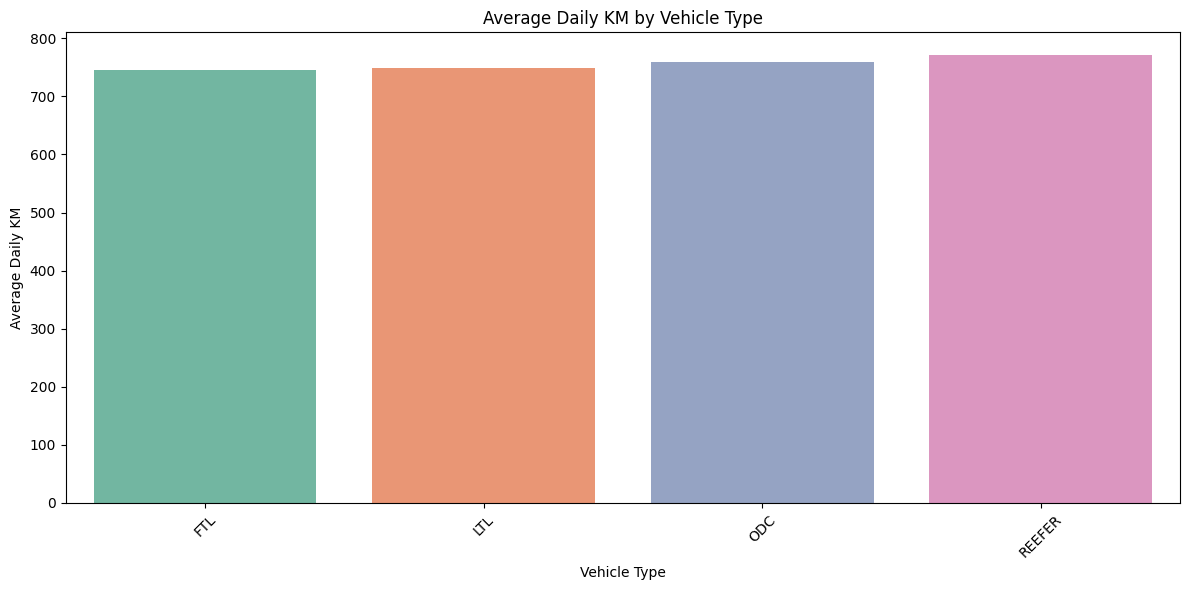

In [146]:
# Groupby Vehicle Type and calculate mean Average Daily KM
Avg_km_by_vehicle_type = df_VRL_Logistics_Data.groupby('Vehicle Type')['Average Daily KM'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_km_by_vehicle_type, x='Vehicle Type', y='Average Daily KM',palette='Set2')
plt.title('Average Daily KM by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Daily KM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM by Vehicle Type**

Based on the calculated mean values, the following insights can be drawn regarding the utilization of different vehicle types:

**1.** REEFER Vehicles Exhibit the Highest Utilization
- **Average Daily KM: 771.55**
- REEFER vehicles cover the longest daily distance, indicating they are consistently deployed. This may be due to operational requirements for temperature-controlled goods that demand continuous movement.

**2.** ODC Vehicles Show High Daily Usage
- **Average Daily KM: 758.83**
- ODC (Over-Dimensional Cargo) vehicles also record high daily mileage. This is expected as such vehicles often operate on long-haul assignments related to specialized loads.

**3.** LTL Vehicles Maintain Moderate Utilization
- **Average Daily KM: 748.82**
- LTL (Less Than Truckload) vehicles demonstrate steady usage. Their daily distances suggest frequent but moderate-range operations.

**4.** FTL Vehicles Have the Lowest Average Daily KM
- **Average Daily KM: 744.47**
- FTL (Full Truckload) vehicles cover the shortest daily distance among all types. This may indicate fewer but longer-duration trips, waiting time for full consolidation, or operational characteristics specific to full-load movements.

**Overall Observations**

**1.** REEFER and ODC vehicles demonstrate comparatively higher operational intensity than FTL and LTL.

**2.** The difference between the highest (REEFER) and lowest (FTL) average daily KM is approximately **27 KM**, which reflects a moderate variation across vehicle types.

**3**. These metrics help identify which vehicle categories are utilized more frequently on a daily basis and support decisions in fleet planning, resource allocation, and maintenance scheduling.

**Conclusion**

The analysis highlights clear differences in usage patterns across vehicle types.  
REEFER vehicles lead in daily movement, followed by ODC, while FTL records the lowest average utilization. This information provides valuable insights for optimizing fleet operations and understanding workload distribution within the logistics network.


#### Fuel Type(Categorical) vs Average Daily KM(Numerical)

In [147]:
## Groupby Fuel Type and calculate mean Average Daily KM Count
df_VRL_Logistics_Data.groupby('Fuel Type')['Average Daily KM'].mean()

Fuel Type
CNG       727.347524
DIESEL    759.309795
EV        788.239224
Name: Average Daily KM, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\2289815511.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Avg_km_by_fuel_type , x='Fuel Type', y='Average Daily KM',palette='Set2')


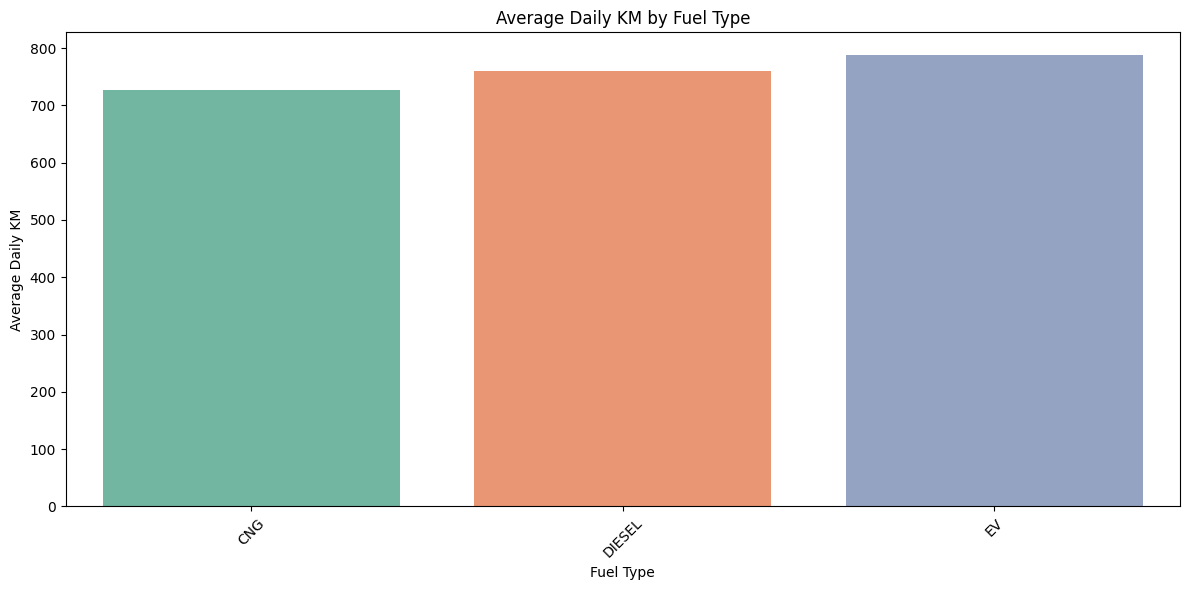

In [148]:
# Groupby Fuel Type and calculate mean Average Daily KM
Avg_km_by_fuel_type = df_VRL_Logistics_Data.groupby('Fuel Type')['Average Daily KM'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data=Avg_km_by_fuel_type , x='Fuel Type', y='Average Daily KM',palette='Set2')
plt.title('Average Daily KM by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Daily KM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM by Fuel Type**

Based on the calculated mean Average Daily KM for each fuel category, the following insights can be derived:

**1.** Electric Vehicles (EV) Show the Highest Average Daily KM
- **EV = 788.24 KM**
- EVs record the longest daily distance among all fuel types. This suggests they are used intensively and consistently, likely benefiting from lower operating costs and higher efficiency.

**2.** Diesel Vehicles Have Moderate Daily Usage
- **Diesel = 759.31 KM**
- Diesel vehicles maintain a strong level of utilization. Their average daily distance is slightly below EVs but significantly higher than CNG vehicles, reflecting their continued importance in long-haul logistics.

**3.** CNG Vehicles Have the Lowest Average Daily KM
- **CNG = 727.35 KM**
- CNG vehicles cover the shortest daily distance. This may indicate their use in shorter routes, urban distribution, or operational limitations related to fuel availability or range.

**Overall Observations**

**1.** The gap between EV (highest) and CNG (lowest) is approximately **61 KM**, indicating a notable variation in utilization based on fuel type.
    
**2.** EVs outperform both Diesel and CNG in terms of daily distance, suggesting increasing operational adoption and efficiency.
    
**3.** Diesel vehicles continue to demonstrate strong utilization, maintaining their relevance in medium- and long-distance logistics.
    
**4.** CNG vehicles appear more suited to short-haul or city-based operations, reflected in their lower daily mileage.

**Conclusion**

The analysis indicates a clear hierarchy of utilization by fuel type: **EV > Diesel > CNG**.  
These insights help understand operational performance, energy efficiency trends, and potential areas for optimizing fleet deployment based on fuel type.


#### Region Operated(Categorical) vs Average Daily KM(Numerical)

In [149]:
## Groupby Region Operated and calculate mean Average Daily KM
df_VRL_Logistics_Data.groupby('Region Operated')['Average Daily KM'].mean()

Region Operated
CENTRAL    754.503861
EAST       749.487229
NORTH      762.449122
SOUTH      747.992493
WEST       766.583412
Name: Average Daily KM, dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\166891735.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_km_by_region_operated , x='Region Operated', y='Average Daily KM',palette='Set2')


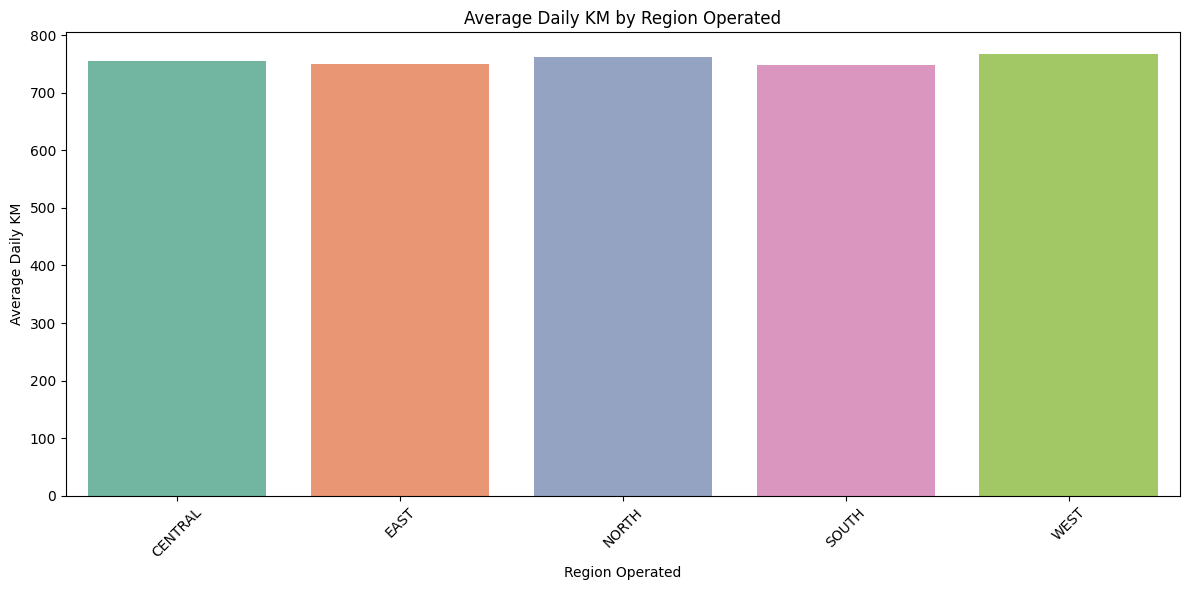

In [150]:
# Groupby Region Operated and calculate mean Average Daily KM
Avg_km_by_region_operated = df_VRL_Logistics_Data.groupby('Region Operated')['Average Daily KM'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_km_by_region_operated , x='Region Operated', y='Average Daily KM',palette='Set2')
plt.title('Average Daily KM by Region Operated')
plt.xlabel('Region Operated')
plt.ylabel('Average Daily KM')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM by Region Operated**

Based on the mean Average Daily KM calculated for each region, the following insights can be identified:

**1.** Western Region Has the Highest Average Daily KM
- **West = 766.58 KM**
- The Western region shows the highest daily vehicle utilization, indicating frequent long-distance or high-demand routes.

**2.** Northern Region Also Exhibits High Utilization
- **North = 762.45 KM**
- The Northern region closely follows the West, reflecting strong operational activity and consistent vehicle movement.

**3.** Central Region Shows Moderate Utilization
- **Central = 754.50 KM**
- Vehicles in the Central region maintain a steady level of daily usage, positioned between high and low utilization zones.

**4.** Eastern and Southern Regions Have Lower Average Daily KM
- **East = 749.49 KM**
- **South = 747.99 KM**
- These regions show comparatively lower daily distances, which may be due to shorter delivery routes, lower freight demand, or operational constraints.

**Overall Observations**

**1.** The variation between the highest (West) and lowest (South) average daily KM is approximately **19 KM**, indicating a moderate regional difference.
    
**2.** The Western and Northern regions lead in vehicle utilization, suggesting heavier logistics operations or longer-haul routes.
    
**3.** The Southern and Eastern regions have similar utilization patterns, both being on the lower end.
    
**4.** Central region usage remains balanced and consistent, showcasing moderate operational throughput.

**Conclusion**

There is a clear regional pattern in vehicle utilization: **West > North > Central > East > South**.  
These insights can assist in evaluating route performance, resource allocation, and strategic planning across different operating regions.


#### Vehicle Make(Categorical) vs Fuel Consumed (Liters, 7D)(Numerical)

In [151]:
## Groupby Vehicle Make and calculate mean Fuel Consumed (Liters, 7D) Count
df_VRL_Logistics_Data.groupby('Vehicle Make')['Fuel Consumed (Liters, 7D)'].mean()

Vehicle Make
Ashok Leyland    1396.169905
BharatBenz       1380.820684
Eicher           1373.387631
Mahindra         1388.122689
Tata             1328.260183
Volvo            1354.768002
Name: Fuel Consumed (Liters, 7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\3399412358.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Fuel_consumed_by_vehicle_make , x='Vehicle Make', y='Fuel Consumed (Liters, 7D)',palette='Set2')


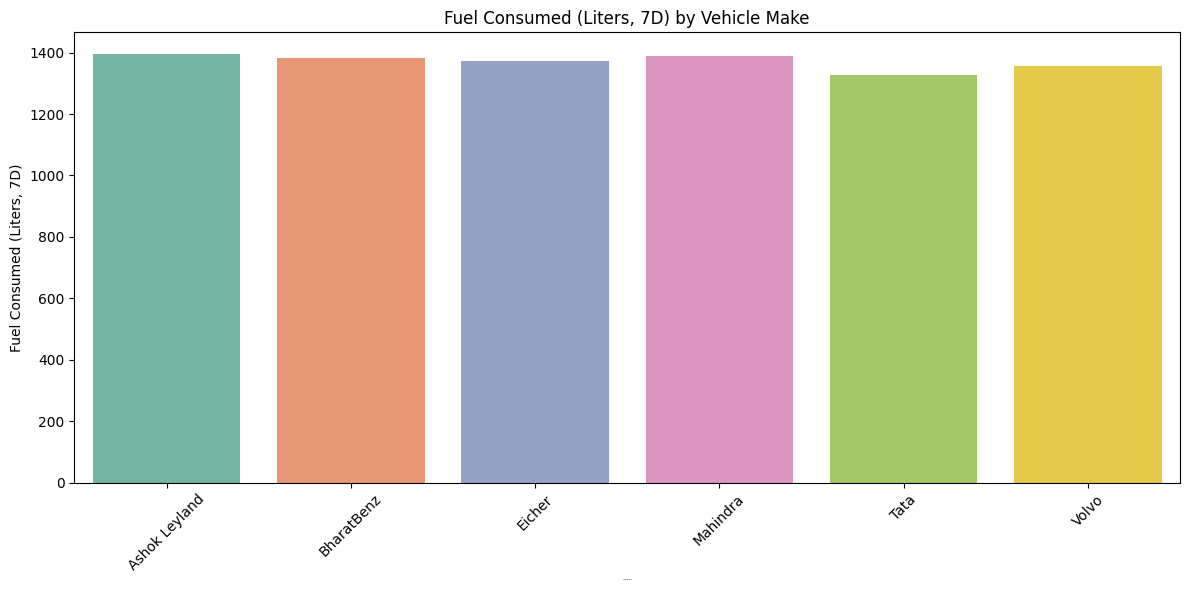

In [152]:
# Groupby Vehicle Make and calculate mean Fuel Consumed (Liters, 7D)
Fuel_consumed_by_vehicle_make = df_VRL_Logistics_Data.groupby('Vehicle Make')['Fuel Consumed (Liters, 7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data=Fuel_consumed_by_vehicle_make , x='Vehicle Make', y='Fuel Consumed (Liters, 7D)',palette='Set2')
plt.title('Fuel Consumed (Liters, 7D) by Vehicle Make')
plt.xlabel('Vehicle Make',fontsize=1)
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D) by Vehicle Make**

**1. Highest Fuel Consumption**

- **Ashok Leyland** has the highest average fuel consumption (1396 liters / 7 days).
- This indicates its vehicles may:
  - Operate on longer routes,
  - Carry heavier loads,
  - Or have lower fuel efficiency.

**2. Lowest Fuel Consumption**

- **Tata** vehicles show the lowest average consumption (1328 liters / 7 days).
- This suggests better fuel efficiency or shorter-distance operations.

**3. Mid-Range Performers**

- **BharatBenz, Mahindra, Eicher, and Volvo** fall in the mid-range (1350–1389 liters).
- These brands show similar consumption, indicating:
  - Comparable engine performance,
  - Similar route lengths or usage patterns.

**4. Operational Insight**

- The variation between the highest (Ashok Leyland) and lowest (Tata) is about **68 liters** in 7 days.
- This difference becomes significant when:
  - Fleet size is large,
  - Fuel cost optimization is a priority.

**5. Fuel Efficiency Perspective**

- **Tata appears the most fuel-efficient**, based on lower average fuel use.
- **Ashok Leyland vehicles seem to consume more**, possibly needing:
  - Maintenance checks,
  - Route re-evaluation,
  - Driver behavior analysis.

**6. Bar Chart Understanding**

- The bar graph visually highlights:
  - Clear ranking of brands from highest to lowest fuel use.
  - Clustering of most brands in the mid-range.
  - Outliers at the top (Ashok Leyland) and bottom (Tata).

**7. Decision-Making Insights**

- If goal is **fuel cost reduction** → consider more Tata or Eicher vehicles.
- If goal is **heavy-duty performance or long-haul routes** → Ashok Leyland performance may justify higher fuel use.


#### Vehicle Type(Categorical) vs Fuel Consumed (Liters, 7D)(Numerical)

In [153]:
## Groupby Vehicle Type and calculate mean Fuel Consumed (Liters, 7D) Count
df_VRL_Logistics_Data.groupby('Vehicle Type')['Fuel Consumed (Liters, 7D)'].mean()

Vehicle Type
FTL       1345.174800
LTL       1352.961486
ODC       1379.803861
REEFER    1402.827369
Name: Fuel Consumed (Liters, 7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\1924239230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= Fuel_consumed_by_vehicle_type , x='Vehicle Type', y='Fuel Consumed (Liters, 7D)',palette='Set2')


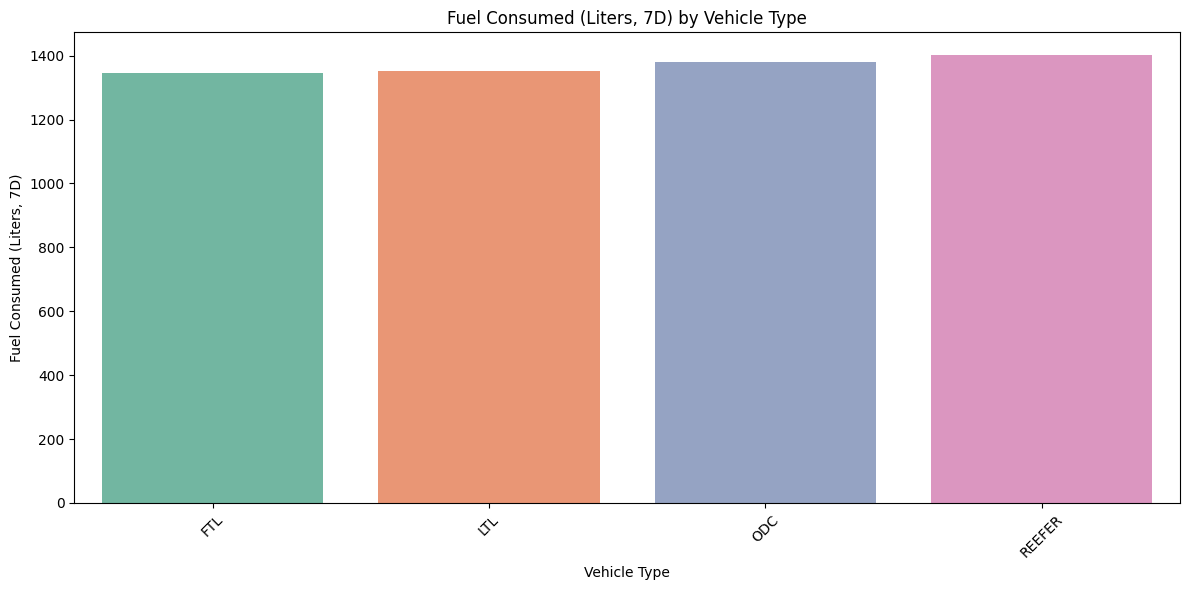

In [154]:
# Groupby Vehicle Type and calculate mean Fuel Consumed (Liters, 7D)
Fuel_consumed_by_vehicle_type = df_VRL_Logistics_Data.groupby('Vehicle Type')['Fuel Consumed (Liters, 7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data= Fuel_consumed_by_vehicle_type , x='Vehicle Type', y='Fuel Consumed (Liters, 7D)',palette='Set2')
plt.title('Fuel Consumed (Liters, 7D) by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D) by Vehicle Type**

**1. Highest Fuel Consumption**

- **REEFER vehicles** have the highest average fuel consumption (~1402.8 liters / 7 days).
- This makes sense because:
  - Refrigerated trucks consume extra fuel to power cooling units.
  - They often run continuously to maintain temperature-sensitive goods.

**2. Second Highest Fuel Consumption**

- **ODC (Over Dimensional Cargo)** vehicles show the next highest consumption (1379.8 liters).
- This indicates:
  - Heavy loads,
  - Wider or special cargo,
  - More power required, leading to higher fuel usage.

**3. Moderate Fuel Consumption**

- **LTL (Less Than Truck Load)** vehicles have moderate fuel usage (1352.9 liters).
- These trucks:
  - Carry smaller loads,
  - Make multiple stops,
  - Show slightly higher usage than FTL due to frequent braking/acceleration.

**4. Lowest Fuel Consumption**

- **FTL (Full Truck Load)** vehicles consume the least fuel (1345.1 liters).
- Possible reasons:
  - Point-to-point delivery,
  - Fewer stops,
  - More consistent driving speeds → better fuel efficiency.

**5. Variation Insights**

- Difference between highest (REEFER) and lowest (FTL) is around **57 liters in 7 days**.
- Even this small difference becomes large when scaled to:
  - Fleet size,
  - Monthly or yearly fuel budgets.

**6. Bar Chart Understanding**

- The graph clearly shows a rising trend from **FTL → LTL → ODC → REEFER**.
- This suggests fuel consumption increases with:
  - Vehicle complexity,
  - Cargo type,
  - Operational nature.

**7. Operational Takeaways**

- **REEFER and ODC** should be monitored for fuel optimization strategies.
- **FTL** vehicles are the most fuel-efficient group.
- For cost-saving initiatives:
  - Driver training,
  - Route optimization,
  - Idle-time reduction,
  - Maintenance checks on high-consuming vehicle types.


#### Fuel Type(Categorical) vs Fuel Consumed (Liters, 7D)(Numerical)

In [155]:
## Groupby Fuel Type and calculate mean Fuel Consumed (Liters, 7D) Count
df_VRL_Logistics_Data.groupby('Fuel Type')['Fuel Consumed (Liters, 7D)'].mean()

Fuel Type
CNG       1315.960659
DIESEL    1377.238449
EV        1420.924813
Name: Fuel Consumed (Liters, 7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\916288870.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Fuel_consumed_by_fuel_type , x='Fuel Type', y='Fuel Consumed (Liters, 7D)',palette='Set2')


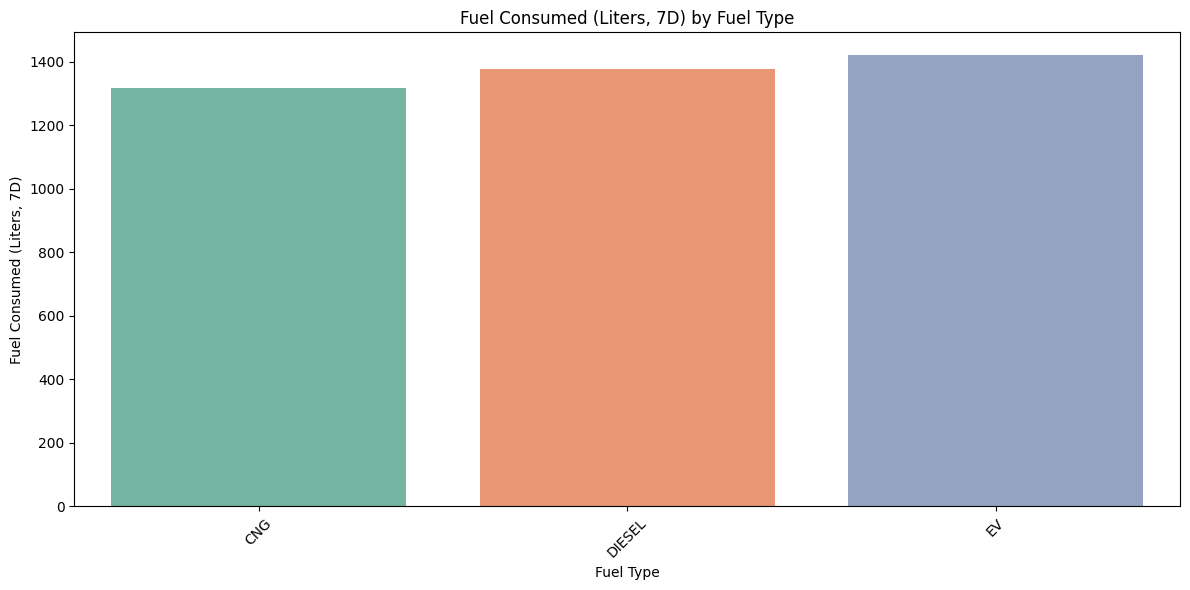

In [156]:
# Groupby Fuel Type and calculate mean Fuel Consumed (Liters, 7D)
Fuel_consumed_by_fuel_type = df_VRL_Logistics_Data.groupby('Fuel Type')['Fuel Consumed (Liters, 7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data=Fuel_consumed_by_fuel_type , x='Fuel Type', y='Fuel Consumed (Liters, 7D)',palette='Set2')
plt.title('Fuel Consumed (Liters, 7D) by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D) by Fuel Type**

**1. Highest Fuel Consumption**
- **EV (Electric Vehicles)** show the highest equivalent fuel consumption (1420.9 units per 7 days).
- This indicates:
  - High energy usage or heavy-duty operations,
  - Continuous or long-distance usage patterns,
  - Possibly large battery-powered trucks requiring more energy.

*(Note: Although EVs don't use "liters," the dataset likely converts energy usage into a fuel-equivalent measure.)*

**2. Moderate Fuel Consumption**
- **Diesel vehicles** have medium fuel consumption (1377.2 liters / 7 days).
- Diesel trucks are usually used on:
  - Long routes,
  - Heavy loads,
  - Frequent operations,
  - Which explains their relatively high fuel usage.

**3. Lowest Fuel Consumption**

- **CNG vehicles** show the lowest average (1315.9 liters / 7 days).
- Reasons may include:
  - Higher fuel efficiency,
  - Usage in shorter urban routes,
  - Lighter cargo categories,
  - Lower engine power consumption.

**4. Fuel Efficiency Insight**

- CNG appears to be the most cost-efficient option.
- Diesel provides moderate performance but at a higher fuel cost.
- EVs consume the most energy, which may require:
  - Charging management,
  - Route optimization,
  - Evaluation of energy cost vs operational benefits.

**5. Variation Insights**

- Difference between highest (EV) and lowest (CNG) ≈ **105 liters (equivalent) in 7 days**.
- This variation is significant for fleet budgeting and cost optimization.

**6. Bar Chart Understanding**

- Clear increasing trend: **CNG → Diesel → EV**
- Indicates:
  - Energy requirements increase across fuel types,
  - EVs may be used for heavier operations or continuous-duty tasks.

**7. Operational Takeaways**

- For fuel/energy cost savings → **CNG vehicles** are the best performers.
- Diesel fleet should be monitored for:
  - Fuel wastage,
  - Idle time,
  - Driver behavior.
- EVs require:
  - Efficient charging schedules,
  - Load distribution planning,
  - Evaluation of ROI vs energy consumption.


#### Region Operated(Categorical) vs Fuel Consumed (Liters, 7D)(Numerical)

In [157]:
## Groupby Region Operated and calculate mean Fuel Consumed (Liters, 7D) Count
df_VRL_Logistics_Data.groupby('Region Operated')['Fuel Consumed (Liters, 7D)'].mean()

Region Operated
CENTRAL    1370.177175
EAST       1356.190708
NORTH      1377.197568
SOUTH      1357.019232
WEST       1393.354496
Name: Fuel Consumed (Liters, 7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\3553564746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Fuel_consumed_by_region_operated , x='Region Operated', y='Fuel Consumed (Liters, 7D)',palette='Set2')


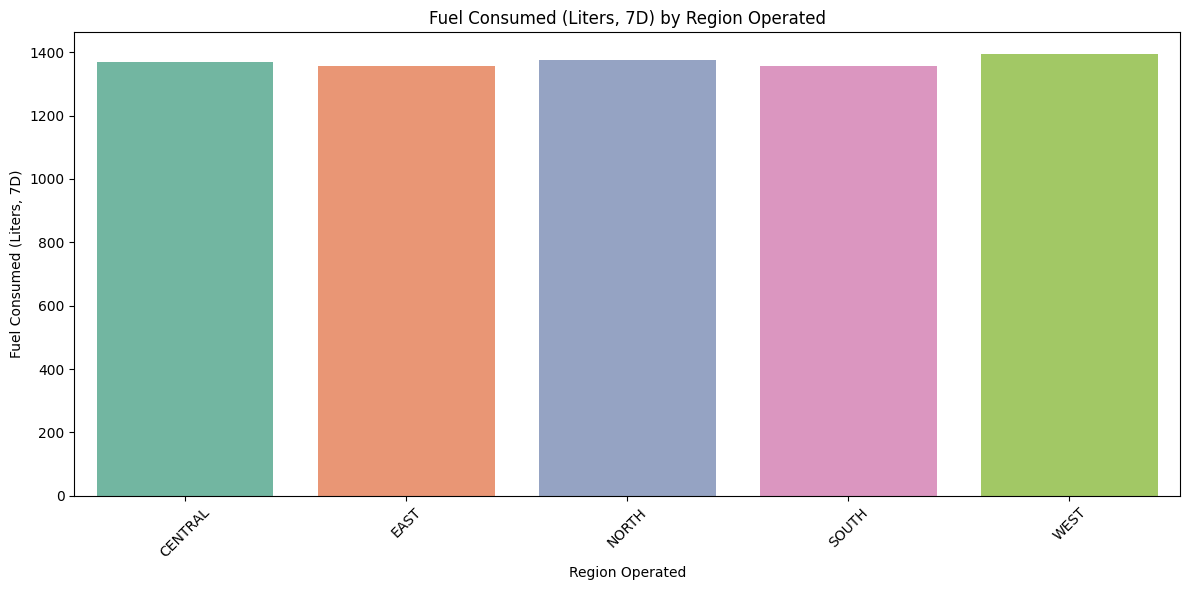

In [158]:
# Groupby Region Operated and calculate mean Fuel Consumed (Liters, 7D)
Fuel_consumed_by_region_operated = df_VRL_Logistics_Data.groupby('Region Operated')['Fuel Consumed (Liters, 7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data=Fuel_consumed_by_region_operated , x='Region Operated', y='Fuel Consumed (Liters, 7D)',palette='Set2')
plt.title('Fuel Consumed (Liters, 7D) by Region Operated')
plt.xlabel('Region Operated')
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D) by Region Operated**

**1. Highest Fuel Consumption Region**

- **North Region** shows the highest average fuel consumption (1377.2 liters / 7 days).
- This indicates:
  - Longer route distances,
  - Heavier cargo loads,
  - Or more challenging driving conditions (e.g., highways, terrain).

**2. Second Highest Fuel Consumption**

- **Central Region** has slightly lower consumption (1370.1 liters).
- This suggests:
  - Moderately long routes,
  - Balanced cargo movement,
  - Higher vehicle utilization.

**3. Lowest Fuel Consumption Regions**

- **East (~1356.19 liters)** and **South (1357.01 liters)** have the lowest fuel consumption.
- Possible reasons:
  - Shorter operational routes,
  - Lower traffic congestion,
  - Less fuel-demanding driving patterns,
  - Smaller or lighter load movements.

**4. Variation Insights**

- Difference between highest (North) and lowest (East) is around **21 liters in 7 days**.
- Although small per vehicle, this becomes large when scaling across the entire fleet.

**5. Bar Chart Understanding**

- Fuel consumption shows a **North > Central > South ≈ East** pattern.
- This visually highlights:
  - North and Central regions are more fuel-intensive,
  - South and East regions are more efficient.

**6. Operational Takeaways**

- **North and Central regions** may benefit from:
  - Route optimization,
  - Vehicle load balancing,
  - Driver behavior monitoring,
  - Regular maintenance checks.

- **East and South regions** show comparatively efficient fuel usage, indicating:
  - Stable operations,
  - Effective route management.

**7. Business Insight**
- If the company wants to reduce fuel cost:
  - Focus on high-consuming regions (North, Central),
  - Apply best practices from efficient regions (East, South).


#### Vehicle Make(Categorical) vs Max RPM (7D)(Numerical)

In [159]:
## Groupby Vehicle Make and calculate mean Max RPM (7D)
df_VRL_Logistics_Data.groupby('Vehicle Make')['Max RPM (7D)'].mean()

Vehicle Make
Ashok Leyland    2257.225191
BharatBenz       2244.025632
Eicher           2254.053504
Mahindra         2238.471712
Tata             2251.053952
Volvo            2255.391597
Name: Max RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\1701992694.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Max_RPM_by_vehicle_make , x='Vehicle Make', y='Max RPM (7D)',palette='Set2')


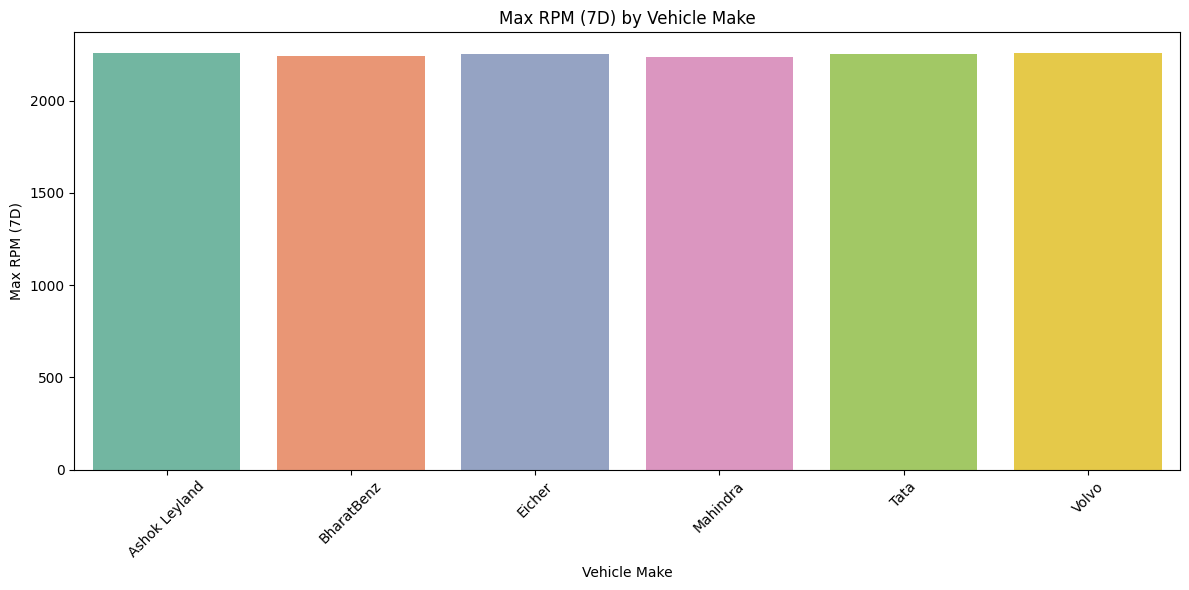

In [160]:
# Groupby Vehicle Make and calculate mean Max RPM (7D)
Max_RPM_by_vehicle_make = df_VRL_Logistics_Data.groupby('Vehicle Make')['Max RPM (7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Max_RPM_by_vehicle_make , x='Vehicle Make', y='Max RPM (7D)',palette='Set2')
plt.title('Max RPM (7D) by Vehicle Make')
plt.xlabel('Vehicle Make')
plt.ylabel('Max RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Max RPM (7D) by Vehicle Make**

**1. Highest Max RPM**
- **Volvo** shows the highest Max RPM (~2255.39 RPM).
- This indicates:
  - Strong engine performance,
  - Higher acceleration capability,
  - Possibly used on highways or high-speed routes.

**2. Close High Performers**

- **Ashok Leyland (2257.22 RPM)** and **Eicher (2254.05 RPM)** also record high max RPM.
- This suggests:
  - Heavy-duty operations,
  - Engines frequently reaching high performance levels,
  - Consistent high-speed or high-load driving patterns.

**3. Moderate Max RPM**
- **Tata** vehicles show moderate max RPM (~2251.05 RPM).
- This indicates:
  - Balanced performance,
  - Less aggressive driving or moderate workloads.

**4. Lower Max RPM**
- **BharatBenz (2244.02 RPM)** and **Mahindra (2238.47 RPM)** have the lowest max RPM readings.
- These vehicles may:
  - Operate on slower routes,
  - Carry lighter loads,
  - Or be driven more conservatively.

**5. Variation Insights**

- Range between highest (Ashok Leyland: ~2257 RPM) and lowest (Mahindra: ~2238 RPM) is around **19 RPM**.
- Although small, even minor RPM differences can reflect:
  - Differences in engine tuning,
  - Route type,
  - Driving behavior,
  - Vehicle age and maintenance.

**6. Bar Chart Understanding**

- RPM levels across all makes are **very close**, indicating:
  - Similar vehicle engine capabilities,
  - Comparable operational conditions across fleet.

**7. Operational Takeaways**

- Higher RPM vehicles (Volvo, Ashok Leyland, Eicher) may need:
  - More frequent engine checks,
  - Monitoring for aggressive driving,
  - Fuel consumption assessment (higher RPM → higher fuel burn).

- Lower RPM makes (Mahindra, BharatBenz) indicate:
  - More stable or controlled driving patterns,
  - Potentially lower mechanical stress on engines.

**8. Fleet Insight**
- All brands operate within a **tight RPM band**, showing:
  - Stable fleet performance,
  - Minimal engine stress variation across brands.


#### Vehicle Type(Categorical) vs Max RPM (7D)(Numerical)

In [161]:
## Groupby Vehicle Type and calculate mean Max RPM (7D) Count
df_VRL_Logistics_Data.groupby('Vehicle Type')['Max RPM (7D)'].mean()

Vehicle Type
FTL       2246.565769
LTL       2250.347094
ODC       2251.710286
REEFER    2252.043673
Name: Max RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\4066813146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Max_RPM_by_vehicle_type , x='Vehicle Type', y='Max RPM (7D)',palette='Set2')


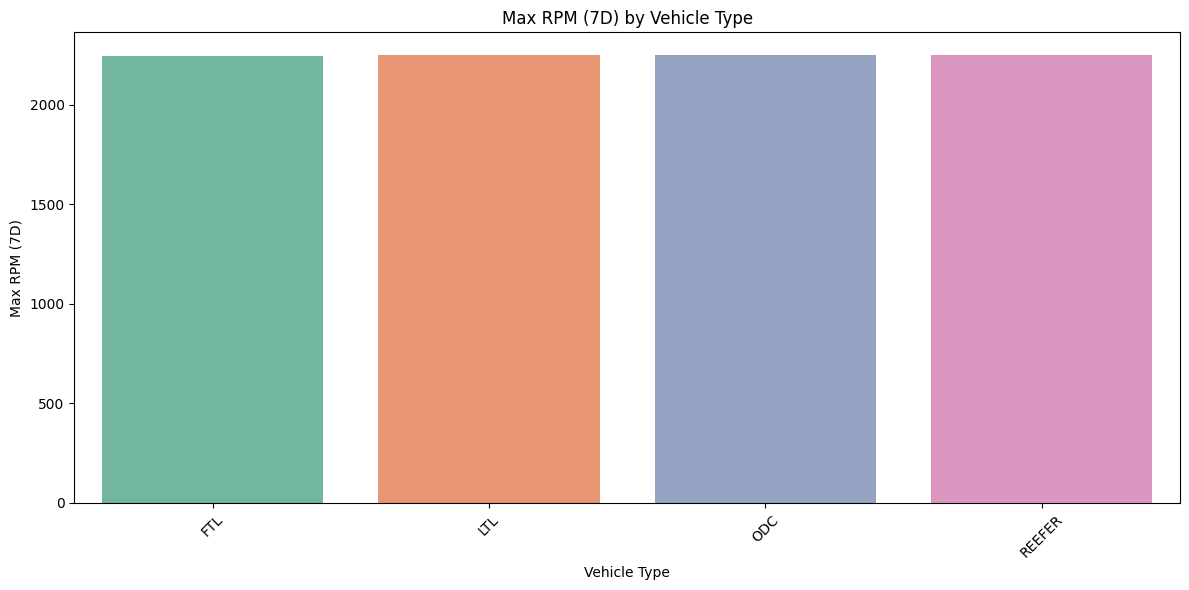

In [162]:
# Groupby Vehicle Type and calculate mean Max RPM (7D)
Max_RPM_by_vehicle_type = df_VRL_Logistics_Data.groupby('Vehicle Type')['Max RPM (7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Max_RPM_by_vehicle_type , x='Vehicle Type', y='Max RPM (7D)',palette='Set2')
plt.title('Max RPM (7D) by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Max RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Max RPM (7D) by Vehicle Type**

**1. Highest Max RPM**

- **REEFER vehicles** have the highest Max RPM (2252.04 RPM).
- This suggests:
  - Higher engine stress due to cooling units,
  - Longer operational hours,
  - More demanding driving cycles.

**2. Close High Performers**

- **ODC vehicles** (2251.71 RPM) and **LTL vehicles** (2250.34 RPM) also show high Max RPM values.
- This may indicate:
  - Heavy or oversized loads (ODC),
  - Frequent stops and accelerations (LTL),
  - Engines reaching higher RPM more often.

**3. Lowest Max RPM**

- **FTL vehicles** have the lowest Max RPM (2246.56 RPM).
- Reasons may include:
  - More consistent, point-to-point routes,
  - Fewer stops → less need for sudden acceleration,
  - More controlled driving behavior.

**4. RPM Variation Insight**

- The difference between highest (REEFER) and lowest (FTL) is only **~5.5 RPM**.
- This small variation shows:
  - Operational patterns across vehicle types are broadly similar,
  - All types face similar engine load and driving patterns.

**5. Bar Chart Understanding**

- RPM increases slightly from **FTL → LTL → ODC → REEFER**.
- This trend reflects:
  - Increasing operational complexity,
  - Higher power demand across these vehicle types.

**6. Operational Takeaways**

- **REEFER and ODC** vehicles:
  - Should be monitored for engine wear,
  - May require more frequent maintenance checks due to higher stress.

- **FTL vehicles**:
  - Appear to have smoother, more stable engine performance,
  - Lower RPM indicates less aggressive driving and reduced engine strain.

**7. Fleet Performance Insight**
- Overall RPM values for all vehicle types fall within a tight range (2246 to 2252 RPM).
- This indicates:
  - Consistent driving behavior across the fleet,
  - Similar route conditions and driver practices.


#### Fuel Type(Categorical) vs Max RPM (7D)(Numerical)

In [163]:
# Groupby Fuel Type and calculate mean  Max RPM (7D) Count
df_VRL_Logistics_Data.groupby('Fuel Type')['Max RPM (7D)'].mean()

Fuel Type
CNG       2253.145470
DIESEL    2249.594589
EV        2250.168319
Name: Max RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\2341710698.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Max_RPM_by_fuel_type , x='Fuel Type', y='Max RPM (7D)',palette='Set2')


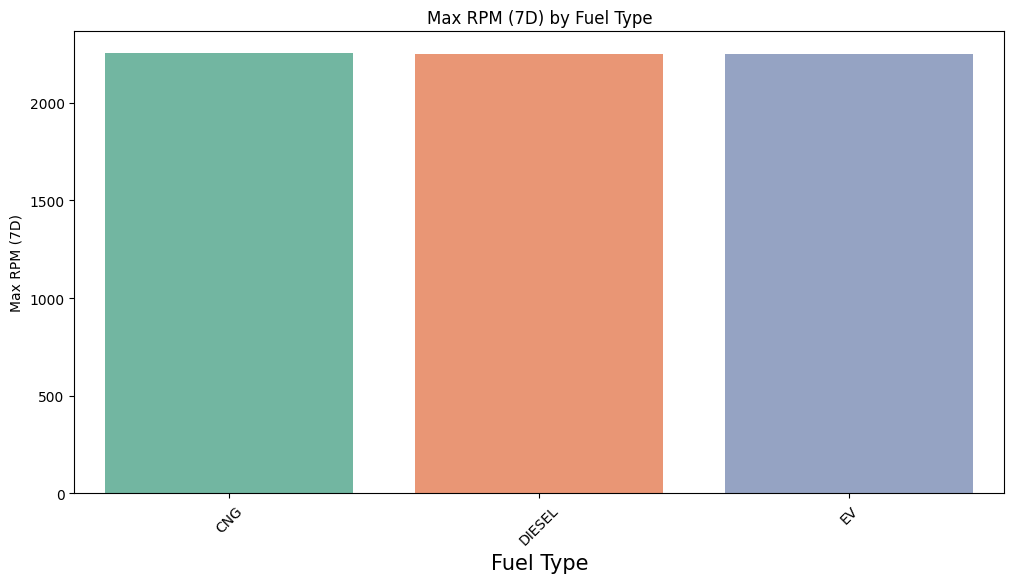

In [164]:
# Groupby Fuel Type and calculate mean  Max RPM (7D)
Max_RPM_by_fuel_type = df_VRL_Logistics_Data.groupby('Fuel Type')['Max RPM (7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Max_RPM_by_fuel_type , x='Fuel Type', y='Max RPM (7D)',palette='Set2')
plt.title('Max RPM (7D) by Fuel Type')
plt.xlabel('Fuel Type',fontsize=15)
plt.ylabel('Max RPM (7D)')
plt.xticks(rotation=45)
plt.show()

**Interpretation of Max RPM (7D) by Fuel Type**

**1. Highest Max RPM**

- **CNG vehicles** show the highest Max RPM (2253.15 RPM).
- This suggests:
  - CNG engines may rev higher to produce required torque,
  - Possible lower torque output → higher RPM during acceleration,
  - Vehicles may be used on routes requiring frequent gear shifts or acceleration.

**2. Moderate Max RPM**

- **EV vehicles** have a moderate Max RPM (2250.17 RPM).
- Electric motors deliver high torque at low RPM, but here:
  - The RPM-equivalent measure shows moderate energy usage,
  - Indicates controlled and stable performance.

**3. Lowest Max RPM**

- **Diesel vehicles** record the lowest Max RPM (2249.59 RPM).
- This may be due to:
  - Higher torque at low RPM → less need to rev higher,
  - More stable long-distance routes,
  - Fuel-efficient driving patterns.

**4. Variation Insights**

- The difference between highest (CNG) and lowest (Diesel) is **~3.55 RPM**.
- This is a very small variation, indicating:
  - Engine stress across all fuel types is largely consistent,
  - All fuel groups face similar operational driving patterns.

**5. Bar Chart Understanding**
- The bar chart shows a slight order: **CNG > EV > Diesel**.
- This suggests:
  - CNG vehicles rev slightly higher,
  - EVs remain balanced,
  - Diesel engines operate in a lower RPM range.

**6. Operational Takeaways**

- **CNG vehicles**:
  - May need more frequent monitoring for engine strain due to higher RPM.
- **Diesel vehicles**:
  - Show the most controlled engine behavior,
  - Potentially more fuel-efficient and stable under heavy loads.
- **EV vehicles**:
  - Provide consistent performance without extreme RPM spikes.

**7. Fleet Insight**
- Since RPM differences are minimal:
  - Driving behavior is consistent across fuel types,
  - No extreme operational stress on any fuel category,
  - Fleet is performing uniformly with respect to engine RPM.


#### Region Operated(Categorical) vs Max RPM (7D)(Numerical)

In [165]:
## Groupby Region Operated and calculate mean Max RPM (7D)
df_VRL_Logistics_Data.groupby('Region Operated')['Max RPM (7D)'].mean()

Region Operated
CENTRAL    2249.918395
EAST       2248.356913
NORTH      2258.686815
SOUTH      2246.277657
WEST       2247.786197
Name: Max RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\883186551.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Max_RPM_by_region_operated , x='Region Operated', y='Max RPM (7D)',palette='Set2')


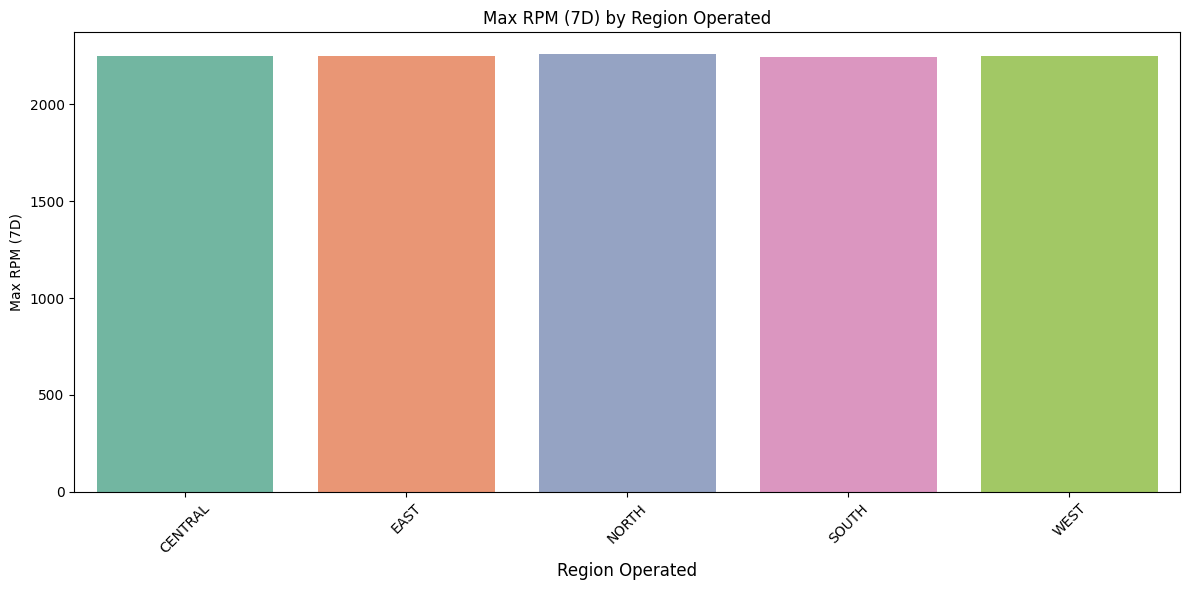

In [166]:
# Groupby Region Operated and calculate mean Max RPM (7D)
Max_RPM_by_region_operated = df_VRL_Logistics_Data.groupby('Region Operated')['Max RPM (7D)'].mean().reset_index()

#Plot the Bar Graph
plt.figure(figsize=(12,6))
sns.barplot(data = Max_RPM_by_region_operated , x='Region Operated', y='Max RPM (7D)',palette='Set2')
plt.title('Max RPM (7D) by Region Operated')
plt.xlabel('Region Operated',fontsize=12)
plt.ylabel('Max RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Max RPM (7D) by Region Operated**

**1. Highest Max RPM Region**
- **North Region** records the highest Max RPM (2258.68 RPM).
- This indicates:
  - More demanding driving conditions,
  - Possibly hilly terrain or highways requiring more acceleration,
  - Heavier load operations or more aggressive driving.

**2. Moderate Max RPM Regions**

- **Central (2249.91 RPM)** and **West (2247.78 RPM)** regions show mid-range values.
- This suggests:
  - Balanced driving patterns,
  - Moderate route complexity,
  - Stable engine performance without excessive revving.

**3. Lowest Max RPM Regions** 

- **East (2248.35 RPM)** and **South (2246.27 RPM)** have the lowest RPM.
- This indicates:
  - Smoother routes with fewer acceleration spikes,
  - Lighter loads,
  - More controlled or fuel-efficient driving behavior.

**4. Variation Insights** 

- Difference between highest (North:2258.68) and lowest (South:2246.27) is **12.4 RPM**.
- This modest variation shows:
  - Overall engine performance across regions is stable,
  - Only the North region stands out with relatively higher RPM stress.

**5. Bar Chart Understanding**

- The chart shows a clear pattern:  
  **North > Central > East ≈ West > South**
- This means:
  - North has the highest operational engine stress,
  - South operates with the smoothest engine cycles.

**6. Operational Takeaways** 

- **North Region:**
  - May require closer engine monitoring,
  - Potentially higher wear-and-tear due to elevated RPM,
  - Routes may need optimization.

- **South and East Regions:**
  - Most efficient in terms of RPM,
  - Indicate safer and steadier driving patterns.

- **Central and West Regions:**
  - Show balanced operations without extreme variations.

**7. Fleet Performance Insight** 

- RPM values across all regions fall within a narrow band (2246–2259 RPM).
- This means:
  - Driver behavior is mostly consistent,
  - Fleet operations maintain uniform engine performance,
  - Only North region deviates slightly due to more demanding conditions.


#### Vehicle Make(Categorical) vs Avg RPM (7D)(Numerical)

In [167]:
# Group by Vehicle Make and calculate mean Avg RPM (7D) Counts
df_VRL_Logistics_Data.groupby('Vehicle Make')['Avg RPM (7D)'].mean()

Vehicle Make
Ashok Leyland    1803.273979
BharatBenz       1792.432726
Eicher           1803.769759
Mahindra         1790.181087
Tata             1797.994391
Volvo            1802.089950
Name: Avg RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\1420114419.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_RPM_vehicle_make , x = 'Vehicle Make', y ='Avg RPM (7D)',palette='Set2' )


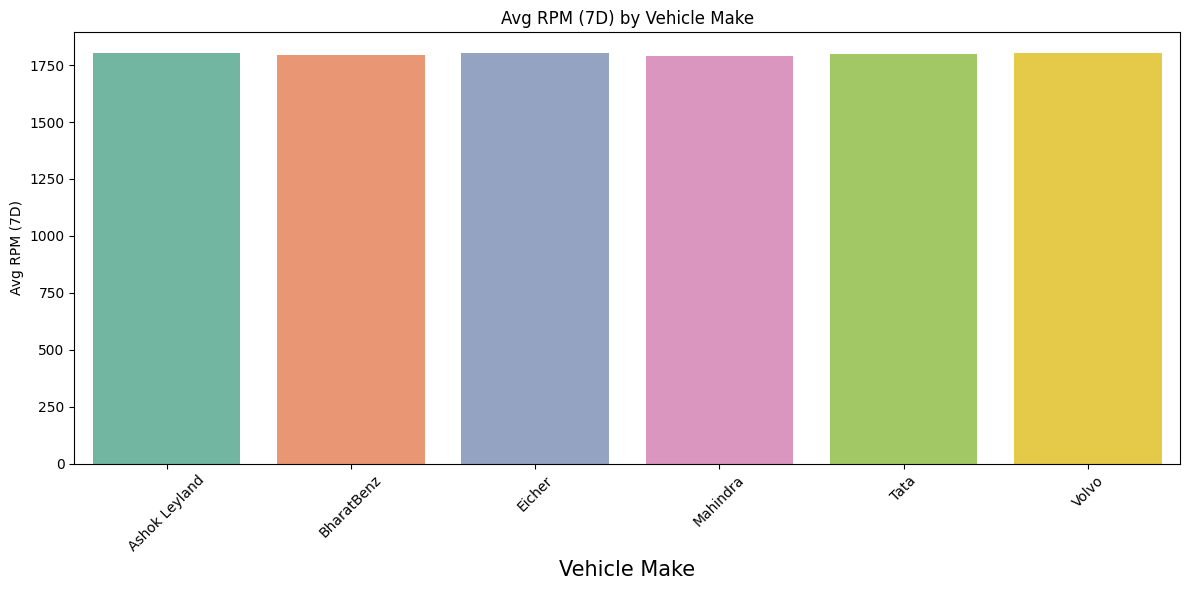

In [168]:
# Group by Vehicle Make and calculate mean Avg RPM (7D) Counts
Avg_RPM_vehicle_make = df_VRL_Logistics_Data.groupby('Vehicle Make')['Avg RPM (7D)'].mean().reset_index()

#Plot the bar
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_RPM_vehicle_make , x = 'Vehicle Make', y ='Avg RPM (7D)',palette='Set2' )
plt.title('Avg RPM (7D) by Vehicle Make')
plt.xlabel('Vehicle Make',fontsize = 15)
plt.ylabel('Avg RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Avg RPM (7D) by Vehicle Make**

**1. Highest Average RPM**
- **Eicher** has the highest Avg RPM (1803.77 RPM).
- Close behind are **Ashok Leyland (1803.27 RPM)** and **Volvo (1802.08 RPM)**.
- This indicates:
  - These vehicles operate in slightly higher engine load conditions,
  - Possible frequent acceleration or higher speed driving,
  - These brands may be used more on highways or heavy-duty tasks.

**2. Moderate Avg RPM**
- **Tata** shows a moderate Avg RPM (1797.99 RPM).
- Suggests:
  - Balanced driving pattern,
  - Moderate load intensity,
  - Less aggressive acceleration than top-performing engines.
  - 
**3. Lowest Avg RPM**
- **Mahindra (1790.18 RPM)** and **BharatBenz (1792.43 RPM)** show the lowest average RPM.
- This indicates:
  - Smoother or slower operational routes,
  - Driver behavior that avoids high revving,
  - Possibly lighter loads or urban operations with controlled acceleration.

**4. RPM Variation Insights**
- The difference between highest (Eicher: 1803.77) and lowest (Mahindra: 1790.18) is only **13.6 RPM**.
- This small variation shows:
  - Overall fleet engines operate consistently,
  - Driving behavior is similar across vehicle makes,
  - No extreme RPM stress on any particular brand.

**5. Bar Chart Understanding**
- The visual ranking (highest to lowest):
  **Eicher → Ashok Leyland → Volvo → Tata → BharatBenz → Mahindra**
- Top three brands indicate slightly more intensive engine usage.

**6. Operational Takeaways**
- **Eicher, Ashok Leyland, Volvo**:
  - Should be monitored for regular maintenance due to higher average RPM,
  - Higher RPM may correlate with higher fuel consumption and engine wear.

- **Mahindra and BharatBenz**:
  - Show more stable and controlled engine behavior,
  - Likely to have better engine life and lower energy/fuel strain.

**7. Fleet Insight Summary**
- All vehicles operate within a narrow RPM range (1790–1804 RPM),
- This indicates:
  - Uniform fleet usage,
  - Consistent driving behavior across all vehicle makes,
  - No major operational anomalies in engine load.


#### Vehicle Type(Categorical) vs Avg RPM (7D)(Numerical)

In [169]:
# Group by Vehicle Type and calculate mean Avg RPM (7D) Counts
df_VRL_Logistics_Data.groupby('Vehicle Type')['Avg RPM (7D)'].mean()

Vehicle Type
FTL       1798.710669
LTL       1798.364716
ODC       1799.211614
REEFER    1797.021219
Name: Avg RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\1178699802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_RPM_vehicle_type , x = 'Vehicle Type', y ='Avg RPM (7D)', palette='Set2')


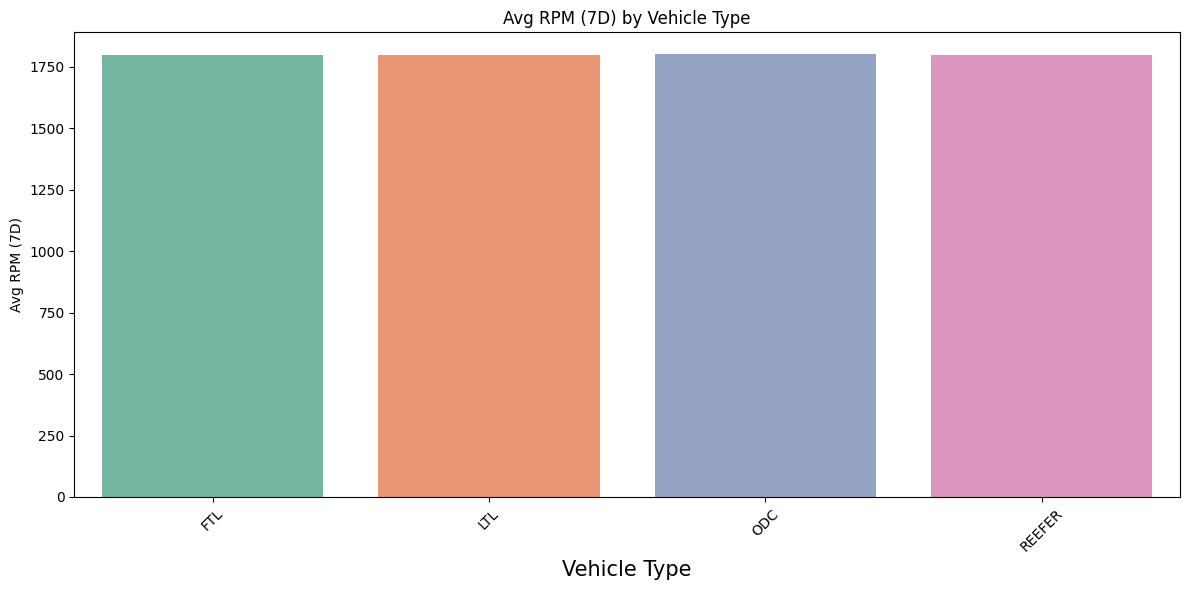

In [170]:
# Group by Vehicle Type and calculate mean Avg RPM (7D) Counts
Avg_RPM_vehicle_type = df_VRL_Logistics_Data.groupby('Vehicle Type')['Avg RPM (7D)'].mean().reset_index()

#Plot the bar
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_RPM_vehicle_type , x = 'Vehicle Type', y ='Avg RPM (7D)', palette='Set2')
plt.title('Avg RPM (7D) by Vehicle Type')
plt.xlabel('Vehicle Type',fontsize = 15)
plt.ylabel('Avg RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Avg RPM (7D) by Vehicle Type**

**1. Highest Avg RPM Vehicle Type**
- **ODC (Over Dimensional Cargo)** records the highest Avg RPM (1799.21 RPM).
- This indicates:
  - Engines are worked slightly harder due to oversized or heavier cargo,
  - More acceleration effort required on routes,
  - Potentially more complex or demanding driving conditions.

**2. Moderate Avg RPM Vehicle Types**
- **FTL (1798.71 RPM)** and  
  **LTL (1798.36 RPM)**  
  show very similar average RPM values.
- This suggests:
  - Balanced operational load,
  - FTL likely runs long-distance with steady speed,
  - LTL involves more stops but still maintains controlled RPM levels,
  - Both categories operate within a stable engine performance zone.

**3. Lowest Avg RPM Vehicle Type**
- **REEFER (1797.02 RPM)** has the lowest Avg RPM.
- This indicates:
  - More consistent and steady driving,
  - Possibly smoother routes or restricted acceleration (due to perishable goods),
  - Lower engine stress compared to other vehicle types.

**4. Variation Insights**
- Difference between highest (ODC: 1799.21) and lowest (REEFER: 1797.02) is **2.19 RPM**.
- This very small variation shows:
  - All vehicle types operate within almost identical engine load,
  - Driving behavior is uniform across the fleet,
  - No extreme RPM fluctuations or operational anomalies.

**5. Bar Chart Understanding**
- Chart ranking from highest to lowest:
  **ODC → FTL → LTL → REEFER**
- Interpretation:
  - ODC vehicles experience slightly higher RPM demand,
  - FTL and LTL maintain mid-range, balanced RPM,
  - REEFER operates at the smoothest engine cycles.

**6. Operational Takeaways**
- **ODC Vehicles:**
  - Should be monitored for engine strain due to highest RPM,
  - Higher RPM may lead to more fuel usage or engine wear.

- **FTL & LTL Vehicles:**
  - Show stable and healthy RPM levels,
  - Indicate consistent operational performance.

- **REEFER Vehicles:**
  - Exhibit co


#### Fuel Type(Categorical) vs Avg RPM (7)(Numerical)

In [171]:
# Group by Fuel Type and calculate mean Avg RPM (7D) Counts
df_VRL_Logistics_Data.groupby('Fuel Type')['Avg RPM (7D)'].mean()

Fuel Type
CNG       1798.600030
DIESEL    1798.038418
EV        1802.968578
Name: Avg RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\653120486.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_RPM_fuel_type , x = 'Fuel Type', y ='Avg RPM (7D)', palette = 'Set2')


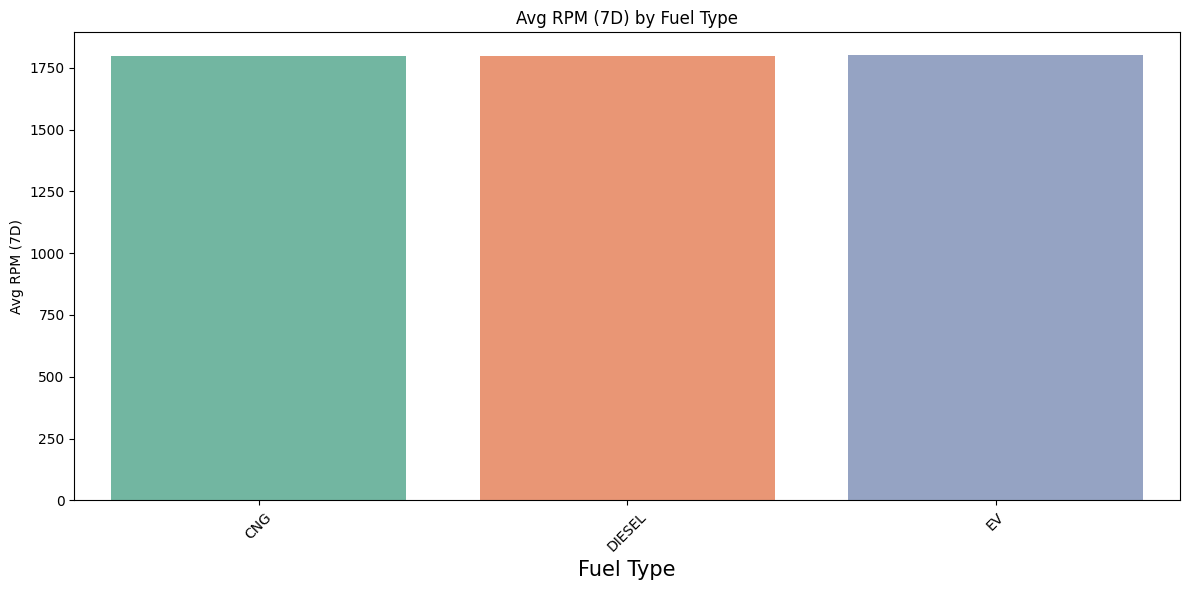

In [172]:
# Group by Fuel Type and calculate mean Avg RPM (7D) Counts
Avg_RPM_fuel_type = df_VRL_Logistics_Data.groupby('Fuel Type')['Avg RPM (7D)'].mean().reset_index()

#Plot the bar
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_RPM_fuel_type , x = 'Fuel Type', y ='Avg RPM (7D)', palette = 'Set2')
plt.title('Avg RPM (7D) by Fuel Type')
plt.xlabel('Fuel Type',fontsize = 15)
plt.ylabel('Avg RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Avg RPM (7D) by Fuel Type**

**1. Highest Avg RPM Fuel Type**
- **EV (Electric Vehicles)** show the highest Avg RPM (1802.97 RPM).
- This indicates:
  - Electric motors may be operating at higher equivalent RPM ranges,
  - Higher torque demand or faster acceleration cycles,
  - Vehicles possibly used in more dynamic or high-speed conditions.

**2. Moderate Avg RPM Fuel Type**
- **CNG (1798.60 RPM)** falls in the mid-range.
- This suggests:
  - Slightly higher RPM needs due to lower torque output from CNG engines,
  - Engines may rev a bit more to maintain speed or acceleration,
  - Balanced but mildly elevated RPM behavior compared to diesel.

**3. Lowest Avg RPM Fuel Type**
- **Diesel (1798.04 RPM)** has the lowest Avg RPM.
- This indicates:
  - Diesel engines generate high torque at lower RPM,
  - Less need for high revving during acceleration,
  - More stable and fuel-efficient driving patterns overall.

**4. Variation Insights**
- Difference between highest (EV:1802.97) and lowest (Diesel:1798.04) is **4.93 RPM**.
- This small variation shows:
  - Engine load behavior across all fuel types is very similar,
  - Fleet operations are consistent regardless of fuel source.

**5. Bar Chart Understanding**
- RPM ranking from highest to lowest:
  **EV → CNG → Diesel**
- Interpretation:
  - EVs show the most dynamic or high-torque usage,
  - CNG engines operate slightly harder,
  - Diesel vehicles maintain the calmest and most controlled RPM levels.

**6. Operational Takeaways**
- **EV Vehicles:**
  - Higher RPM may imply intense usage patterns,
  - Requires careful monitoring of battery and motor health.

- **CNG Vehicles:**
  - Moderate RPM suggests engines work slightly more to compensate torque,
  - Consider load distribution and driving pattern evaluation.

- **Diesel Vehicles:**
  - Most stable and controlled RPM performance,
  - Likely more fuel-efficient and engine-friendly in daily operations.

**7. Fleet Performance Insight**
- All fuel types fall within a narrow RPM band (1798–1803 RPM),
- This means:
  - Very consistent driving behavior across the fleet,
  - Minimal RPM stress differences,
  - No fuel type is causing extreme engine load variations.


#### Region Operated Categorical) vs Avg RPM (7D)(Numerical)

In [173]:
# Group by Region Operated and calculate mean Avg RPM (7D) Counts
df_VRL_Logistics_Data.groupby('Region Operated')['Avg RPM (7D)'].mean()

Region Operated
CENTRAL    1797.882754
EAST       1794.107612
NORTH      1805.865707
SOUTH      1794.993126
WEST       1799.427932
Name: Avg RPM (7D), dtype: float64

C:\Users\Rahuldev Singh\AppData\Local\Temp\ipykernel_24596\1511170384.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = Avg_RPM_region_operated , x = 'Region Operated', y ='Avg RPM (7D)', palette='Set2')


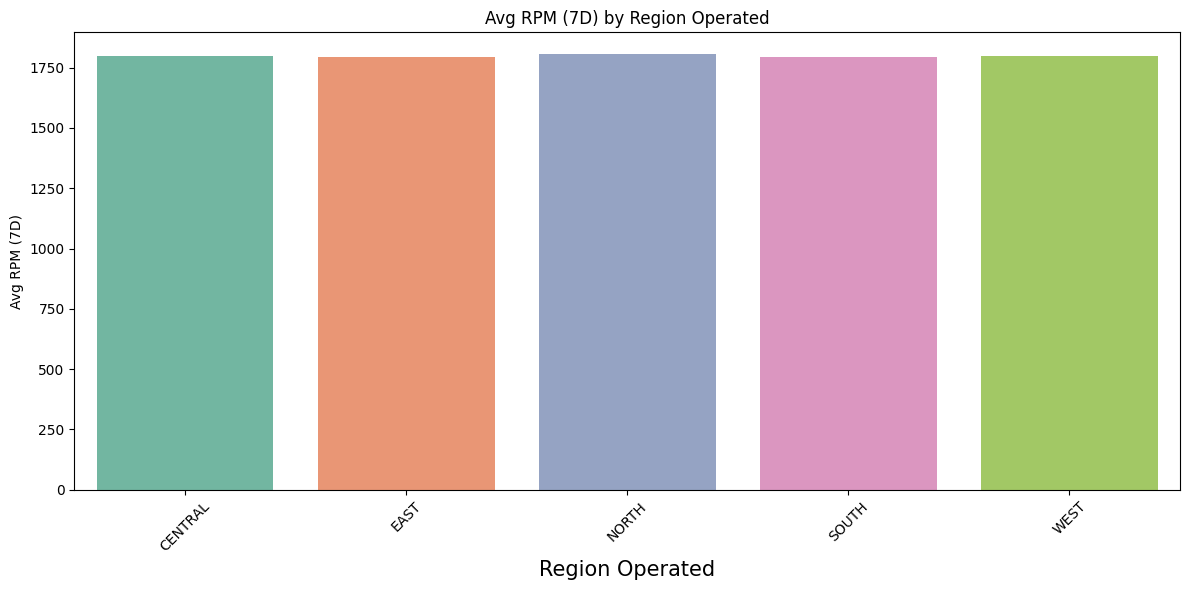

In [174]:
# Group by Region Operated and calculate mean Avg RPM (7D) Counts
Avg_RPM_region_operated = df_VRL_Logistics_Data.groupby('Region Operated')['Avg RPM (7D)'].mean().reset_index()

#Plot the bar
plt.figure(figsize=(12,6))
sns.barplot(data = Avg_RPM_region_operated , x = 'Region Operated', y ='Avg RPM (7D)', palette='Set2')
plt.title('Avg RPM (7D) by Region Operated')
plt.xlabel('Region Operated',fontsize = 15)
plt.ylabel('Avg RPM (7D)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation of Avg RPM (7D) by Region Operated**

**1. Highest Avg RPM Region**
- **North Region** shows the highest Avg RPM (1805.87 RPM).
- This indicates:
  - More demanding or challenging driving conditions,
  - Possibly hilly terrain, highways, or routes requiring frequent acceleration,
  - Higher load intensity or more aggressive driving patterns.

**2. Moderate Avg RPM Regions**
- **West (1799.43 RPM)** and **Central (1797.88 RPM)** fall in the mid-range.
- This suggests:
  - Balanced operational routes,
  - Moderate stop–start movement,
  - Stable engine performance without excessive RPM stress.

**3. Lowest Avg RPM Regions**
- **East (1794.10 RPM)** and **South (1794.99 RPM)** show the lowest Avg RPM.
- This indicates:
  - Smoother or flatter routes,
  - More controlled and fuel-efficient driving,
  - Less engine load, fewer acceleration spikes.

**4. Variation Insights**
- Difference between highest (North: 1805.87) and lowest (East: 1794.10) is **11.76 RPM**.
- This moderate variation shows:
  - All regions operate under generally consistent engine loads,
  - North stands out due to slightly more intense engine usage.

**5. Bar Chart Understanding**
- RPM ranking from highest to lowest:
  **North → West → Central → South → East**
- Interpretation:
  - North experiences the most engine strain,
  - West and Central maintain balanced engine activity,
  - East and South operate with the smoothest engine cycles.

**6. Operational Takeaways**
**North Region:**
  - Requires closer RPM and engine-health monitoring,
  - Higher RPM may lead to increased wear or maintenance needs,
  - Route optimization may reduce RPM strain.

**West & Central Regions:**
  - Demonstrate stable engine behavior,
  - Represent balanced driving conditions.

**East & South Regions:**
  - Show the most controlled RPM,
  - Likely to have better overall engine efficiency and lower fuel stress.

**7. Fleet Performance Insight**
 - All regions fall within a narrow RPM range (1794–1806 RPM).
 - This shows:
 - Largely consistent driving behavior across regions,
 - Uniform fleet operations with no extreme differences,
 - Only North shows slightly elevated RPM due to operational factors.


### Multivariate Analysis

#### Multivariate Analysis on Categorical-Categorical-Numerical

##### Vehicle Make × Vehicle Type × Average Daily KM

In [175]:
# Create Crosstab with Average Daily KM (min)
pd.crosstab(index=df_VRL_Logistics_Data['Vehicle Make'],
            columns=df_VRL_Logistics_Data['Vehicle Type'],
            values=df_VRL_Logistics_Data['Average Daily KM'],
            aggfunc='min')

Vehicle Type      FTL     LTL     ODC  REEFER
Vehicle Make                                 
Ashok Leyland  307.07  300.11  307.11  315.19
BharatBenz     340.53  300.83  304.72  303.93
Eicher         300.89  300.87  311.42  335.31
Mahindra       300.52  304.84  311.90  318.66
Tata           302.70  302.56  309.05  313.60
Volvo          309.76  301.61  309.09  305.90

**Interpretation of Minimum Average Daily KM by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **307.07**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **300.11**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **307.11**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **315.19**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **340.53**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **300.83**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **304.72**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **303.93**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **300.89**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **300.87**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **311.42**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **335.31**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **300.52**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **304.84**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **311.90**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **318.66**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **302.70**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **302.56**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **309.05**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **313.60**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **min(minimum)** Average Daily KM is **309.76**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **min(minimum)** Average Daily KM is **301.61**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **min(minimum)** Average Daily KM is **309.09**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **min(minimum)** Average Daily KM is **305.90**  


In [176]:
# Create Crosstab with Average Daily KM (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
                aggfunc = 'max')

Vehicle Type       FTL      LTL      ODC   REEFER
Vehicle Make                                     
Ashok Leyland  1196.19  1194.68  1198.24  1195.35
BharatBenz     1194.78  1194.21  1188.97  1184.79
Eicher         1197.63  1189.12  1187.01  1191.47
Mahindra       1190.27  1173.44  1191.09  1196.83
Tata           1186.62  1198.11  1196.97  1195.18
Volvo          1183.57  1194.80  1183.85  1192.87

**Interpretation of Maximum Average Daily KM by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1196.19**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1194.68**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1198.24**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1195.35**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1194.78**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1194.21**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1188.97**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1184.79**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1197.63**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1189.12**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1187.01**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1191.47**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1190.27**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1173.44**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1191.09**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1196.83**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1186.62**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1198.11**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1196.97**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1195.18**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **max(maximum)** Average Daily KM is **1183.57**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **max(maximum)** Average Daily KM is **1194.80**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **max(maximum)** Average Daily KM is **1183.85**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **max(maximum)** Average Daily KM is **1192.87**  


In [177]:
# Create Crosstab with Average Daily KM (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
                aggfunc = 'mean')

Vehicle Type          FTL         LTL         ODC      REEFER
Vehicle Make                                                 
Ashok Leyland  770.200290  767.855353  759.253480  785.347741
BharatBenz     723.881547  714.803830  807.150870  786.421267
Eicher         775.413124  755.500645  723.811368  770.724755
Mahindra       705.639437  796.031389  761.003829  800.906401
Tata           722.034688  742.184057  741.490868  719.543984
Volvo          763.094655  708.120034  757.602208  771.951295

**Interpretation of Minimum Average Daily KM by Vehicle Make vs Vehicle Type**


**1) Vehicle Make Ashok Leyland**

 - When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **770.200290**
 - When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **767.855353**
 - When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **759.253480**
 - When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **785.347741**
   
**2) Vehicle Make BharatBenz**

 - When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **723.881547**
 - When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **714.803830**
 - When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **807.150870**
 - When Vehicle Make is **BharatBenz** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **786.421267**
   
**3) Vehicle Make Eicher**
 - When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **775.413124**
 - When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **755.500645**
 - When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **723.811368**
 - When Vehicle Make is **Eicher** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **770.724755**
   
**4) Vehicle Make Mahindra**

 - When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **705.639437**
 - When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **796.031389**
 - When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **761.003829**
 - When Vehicle Make is **Mahindra** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **800.906401**
   
**5) Vehicle Make Tata**
 - When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **722.034688**
 - When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **742.184057**
 - When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **741.490868**
 - When Vehicle Make is **Tata** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **719.543984**
   
**6) Vehicle Make Volvo**
 - When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **mean(Average)** Average Daily KM is **763.094655**
 - When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **mean(Average)** Average Daily KM is **708.120034**
 - When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **mean(Average)** Average Daily KM is **757.602208**
 - When Vehicle Make is **Volvo** and Vehicle Type is **REFER** then **mean(Average)** Average Daily KM is **771.951295**

##### Vehicle Make vs Fuel Type vs Average Daily KM


In [178]:
# Create Crosstab with Average Daily KM (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
                aggfunc = 'min')

Fuel Type         CNG  DIESEL      EV
Vehicle Make                         
Ashok Leyland  307.36  305.28  300.11
BharatBenz     302.14  300.83  303.93
Eicher         301.56  300.87  538.28
Mahindra       300.52  302.35  389.62
Tata           308.59  302.56  313.60
Volvo          309.09  301.61  325.85

**Interpretation of Minimum Average Daily KM by Vehicle Make vs Fuel Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **307.36**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **305.28**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **300.11**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **302.14**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **300.83**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **303.93**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **301.56**  
- When Vehicle Make is **Eicher** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **300.87**  
- When Vehicle Make is **Eicher** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **538.28**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **300.52**  
- When Vehicle Make is **Mahindra** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **302.35**  
- When Vehicle Make is **Mahindra** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **389.62**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **308.59**  
- When Vehicle Make is **Tata** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **302.56**  
- When Vehicle Make is **Tata** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **313.60**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Fuel Type is **CNG** then **min(minimum)** Average Daily KM is **309.09**  
- When Vehicle Make is **Volvo** and Fuel Type is **DIESEL** then **min(minimum)** Average Daily KM is **301.61**  
- When Vehicle Make is **Volvo** and Fuel Type is **EV** then **min(minimum)** Average Daily KM is **325.85**  


In [179]:
# Create Crosstab with Average Daily KM (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
                aggfunc = 'max')

Fuel Type          CNG   DIESEL       EV
Vehicle Make                            
Ashok Leyland  1198.24  1195.93  1196.19
BharatBenz     1188.97  1194.78  1156.43
Eicher         1191.47  1197.63  1160.03
Mahindra       1182.54  1196.83  1180.94
Tata           1186.62  1198.11  1195.18
Volvo          1179.36  1194.80  1053.32

**Interpretation of Maximum Average Daily KM by Vehicle Make vs Fuel Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1198.24**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1195.93**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1196.19**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1188.97**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1194.78**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1156.43**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1191.47**  
- When Vehicle Make is **Eicher** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1197.63**  
- When Vehicle Make is **Eicher** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1160.03**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1182.54**  
- When Vehicle Make is **Mahindra** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1196.83**  
- When Vehicle Make is **Mahindra** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1180.94**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1186.62**  
- When Vehicle Make is **Tata** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1198.11**  
- When Vehicle Make is **Tata** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1195.18**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Fuel Type is **CNG** then **max(Maximum)** Average Daily KM is **1179.36**  
- When Vehicle Make is **Volvo** and Fuel Type is **DIESEL** then **max(Maximum)** Average Daily KM is **1194.80**  
- When Vehicle Make is **Volvo** and Fuel Type is **EV** then **max(Maximum)** Average Daily KM is **1053.32**  


In [180]:
# Create Crosstab with Average Daily KM (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
                aggfunc = 'mean')

Fuel Type             CNG      DIESEL          EV
Vehicle Make                                     
Ashok Leyland  726.919358  779.723007  774.458810
BharatBenz     751.311763  762.967658  769.894306
Eicher         675.671207  762.785167  844.140413
Mahindra       728.747146  769.830611  813.877054
Tata           733.126772  729.006916  758.564266
Volvo          740.753019  753.027578  753.447778

**Interpretation of Mean Average Daily KM by Vehicle Make vs Fuel Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **726.919358**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **779.723007**  
- When Vehicle Make is **Ashok Leyland** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **774.458810**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **751.311763	**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **762.967658**  
- When Vehicle Make is **BharatBenz** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **769.894306**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **675.671207**  
- When Vehicle Make is **Eicher** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **762.785167**  
- When Vehicle Make is **Eicher** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **844.140413**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **728.747146**  
- When Vehicle Make is **Mahindra** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **769.830611**  
- When Vehicle Make is **Mahindra** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **813.877054**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **733.126772**  
- When Vehicle Make is **Tata** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **729.006916**  
- When Vehicle Make is **Tata** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **758.564266**  

**6) Vehicle Mak Volvo**
- When Vehicle Make is **Volvo** and Fuel Type is **CNG** then **mean(Average)** Average Daily KM is **740.753019**  
- When Vehicle Make is **Volvo** and Fuel Type is **DIESEL** then **mean(Average)** Average Daily KM is **753.027578**  
- When Vehicle Make is **Volvo** and Fuel Type is **EV** then **mean(Average)** Average Daily KM is **753.447778**  


##### Vehicle Type vs Region Operated vs Average Daily KM

In [181]:
# Create Crosstab with Average Daily KM (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
            aggfunc = 'min'
           )

Region Operated  CENTRAL    EAST   NORTH   SOUTH    WEST
Vehicle Make                                            
Ashok Leyland     307.36  307.11  309.66  300.11  319.57
BharatBenz        304.72  303.93  304.69  302.14  300.83
Eicher            318.18  309.71  300.89  300.87  339.19
Mahindra          304.84  311.90  308.57  313.10  300.52
Tata              302.56  322.79  312.23  302.70  309.05
Volvo             309.76  305.90  301.61  323.36  320.83

**Interpretation of Minimum Average Daily KM by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **307.36**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **307.11**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **309.66**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **300.11**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **319.57**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **304.72**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **303.93**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **304.69**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **302.14**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **300.83**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **318.18**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **309.71**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **300.89**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **300.87**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **339.19**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **304.84**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **311.90**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **308.57**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **313.10**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **300.52**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **302.56**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **322.79**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **312.23**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **302.70**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **309.05**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **min(Minimum)** of Average Daily KM is **309.76**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **min(Minimum)** of Average Daily KM is **305.90**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **min(Minimum)** of Average Daily KM is **301.61**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **min(Minimum)** of Average Daily KM is **323.36**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **min(Minimum)** of Average Daily KM is **320.83**  


In [182]:
# Create Crosstab with Average Daily KM (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
            aggfunc = 'max'
           )

Region Operated  CENTRAL     EAST    NORTH    SOUTH     WEST
Vehicle Make                                                
Ashok Leyland    1194.68  1195.35  1198.24  1191.91  1168.60
BharatBenz       1185.44  1194.21  1187.03  1194.78  1188.60
Eicher           1197.63  1183.92  1191.47  1196.63  1186.58
Mahindra         1177.57  1191.09  1196.83  1190.27  1180.94
Tata             1198.11  1196.97  1189.67  1193.61  1187.85
Volvo            1179.36  1183.85  1183.57  1189.50  1194.80

**Interpretation of Maximum Average Daily KM by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1194.68**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1195.35**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1198.24**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1191.91**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1168.60**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1185.44**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1194.21**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1187.03**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1194.78**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1188.60**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1197.63**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1183.92**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1191.47**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1196.63**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1186.58**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1177.57**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1191.09**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1196.83**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1190.27**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1180.94**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1198.11**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1196.97**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1189.67**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1193.61**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1187.85**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **max(Maximum)** of Average Daily KM is **1179.36**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **max(Maximum)** of Average Daily KM is **1183.85**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **max(Maximum)** of Average Daily KM is **1183.57**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **max(Maximum)** of Average Daily KM is **1189.50**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **max(Maximum)** of Average Daily KM is **1194.80**  


In [183]:
# Create Crosstab with Average Daily KM (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Average Daily KM'],
            aggfunc = 'mean'
           )

Region Operated     CENTRAL        EAST       NORTH       SOUTH        WEST
Vehicle Make                                                               
Ashok Leyland    775.882012  757.235899  816.047332  727.398099  796.928922
BharatBenz       733.688506  757.474329  798.574925  771.087195  747.509915
Eicher           764.321757  779.680654  720.500891  753.189715  765.070719
Mahindra         755.824895  735.101965  776.378935  780.966012  777.620144
Tata             730.179680  773.377219  692.951480  729.334083  723.545983
Volvo            769.516943  691.764682  779.396051  736.463873  781.069000

**Interpretation of Mean Average Daily KM by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **775.882012**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **757.235899**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **816.047332**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **mean(Average)**of Average Daily KM is **727.398099**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **796.928922**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **733.688506**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **757.474329**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **798.574925**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **mean(Average)** of Average Daily KM is **771.087195**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **747.509915**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **764.321757**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **779.680654**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **720.500891**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **mean(Average)** of Average Daily KM is **753.189715**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **765.070719**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **755.824895**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **735.101965**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **776.378935**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **mean(Average)** of Average Daily KM is **780.966012**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **777.620144**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **730.179680**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **773.377219**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **692.951480**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **mean(Average)** of Average Daily KM is **729.334083**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **723.545983**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **mean(Average)** of Average Daily KM is **769.516943**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **mean(Average)** of Average Daily KM is **691.764682**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **mean(Average)** of Average Daily KM is **779.396051**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **mean(Average)** of Average Daily KM is **736.463873**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **mean(Average)** of Average Daily KM is **781.069000**  


##### Vehicle Make × Vehicle Type × Fuel Consumed (Liters, 7D)

In [184]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'min'
)

Vehicle Type      FTL     LTL     ODC  REEFER
Vehicle Make                                 
Ashok Leyland  405.37  395.27  366.66  405.67
BharatBenz     377.12  324.93  436.48  392.59
Eicher         363.89  405.51  363.09  421.18
Mahindra       386.52  378.45  371.45  342.72
Tata           342.29  386.70  417.51  436.87
Volvo          366.01  404.93  356.73  341.85

**Interpretation of Minimum Fuel Consumed (Liters, 7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **405.37**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **395.27**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **366.66**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **405.67**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **377.12**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **324.93**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **436.48**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **392.59**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **363.89**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **405.51**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **363.09**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **421.18**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **386.52**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **378.45**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **371.45**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **342.72**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **342.29**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **386.70**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **417.51**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **436.87**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **366.01**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **404.93**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **356.73**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **341.85**  


In [185]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'max'
    
)

Vehicle Type       FTL      LTL      ODC   REEFER
Vehicle Make                                     
Ashok Leyland  3383.20  3465.16  3404.82  3472.80
BharatBenz     3475.20  3466.00  3428.52  3697.49
Eicher         3630.40  3274.83  3311.67  3324.00
Mahindra       3767.60  3398.50  3494.80  3142.64
Tata           3352.59  3411.24  3615.97  3155.79
Volvo          3429.79  3679.39  3444.61  3390.37

**Interpretation of Maximum Fuel Consumed (Liters, 7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3383.20**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3465.16**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3404.82**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3472.80**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3475.20**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3466.00**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3428.52**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3697.49**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3630.40**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3274.83**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3311.67**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3324.00**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3767.60**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3398.50**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3494.80**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3142.64**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3352.59**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3411.24**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3615.97**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3155.79**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3429.79**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3679.39**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3444.61**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3390.37**  


In [186]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'mean'
)

Vehicle Type           FTL          LTL          ODC       REEFER
Vehicle Make                                                     
Ashok Leyland  1382.976916  1386.245793  1376.124379  1437.059904
BharatBenz     1308.370033  1287.668146  1470.674448  1430.038595
Eicher         1404.762512  1365.026621  1322.694088  1406.744559
Mahindra       1282.947047  1460.251618  1370.797743  1444.914349
Tata           1306.775208  1331.098989  1362.006942  1313.228964
Volvo          1375.444238  1272.984320  1370.516325  1392.063561

**Interpretation of Mean Fuel Consumed (Liters, 7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1382.976916**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1386.245793**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1376.124379**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1437.059904**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1308.370033**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1287.668146**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1470.674448**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1430.038595**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1404.762512**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1365.026621**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1322.694088**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1406.744559**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1282.947047**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1460.251618**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1370.797743**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1444.914349**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1306.775208**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1331.098989**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1362.006942**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1313.228964**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1375.444238**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1272.984320**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1370.516325**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **mean(Average)** Fuel Consumed (Liters, 7D) is **1392.063561**  


##### Fuel Type × Region Operated × Fuel Consumed (Liters, 7D)

In [187]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Fuel Type'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'min'
)

Region Operated  CENTRAL    EAST   NORTH   SOUTH    WEST
Fuel Type                                               
CNG               378.45  393.79  430.31  406.52  395.05
DIESEL            377.12  341.85  356.73  342.29  324.93
EV                513.84  387.32  434.02  397.08  470.08

**Interpretation of Minimum Fuel Consumed (Liters, 7D) by Fuel Type vs Region Operated**

**1) Fuel Type CNG**
- When Fuel Type is **CNG** and Region Operated is **CENTRAL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **378.45**  
- When Fuel Type is **CNG** and Region Operated is **EAST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **393.79**  
- When Fuel Type is **CNG** and Region Operated is **NORTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **430.31**  
- When Fuel Type is **CNG** and Region Operated is **SOUTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **406.52**  
- When Fuel Type is **CNG** and Region Operated is **WEST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **395.05**  

**2) Fuel Type DIESEL**
- When Fuel Type is **DIESEL** and Region Operated is **CENTRAL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **377.12**  
- When Fuel Type is **DIESEL** and Region Operated is **EAST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **341.85**  
- When Fuel Type is **DIESEL** and Region Operated is **NORTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **356.73**  
- When Fuel Type is **DIESEL** and Region Operated is **SOUTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **342.29**  
- When Fuel Type is **DIESEL** and Region Operated is **WEST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **324.93**  

**3) Fuel Type EV**
- When Fuel Type is **EV** and Region Operated is **CENTRAL** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **513.84**  
- When Fuel Type is **EV** and Region Operated is **EAST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **387.32**  
- When Fuel Type is **EV** and Region Operated is **NORTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **434.02**  
- When Fuel Type is **EV** and Region Operated is **SOUTH** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **397.08**  
- When Fuel Type is **EV** and Region Operated is **WEST** then **min(Minimum)** Fuel Consumed (Liters, 7D) is **470.08**  


In [188]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Fuel Type'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'max'
)

Region Operated  CENTRAL     EAST    NORTH    SOUTH     WEST
Fuel Type                                                   
CNG              3767.60  2972.92  3404.82  3428.52  3253.60
DIESEL           3697.49  3615.97  3465.16  3494.80  3679.39
EV               2861.08  2645.40  2712.09  3630.40  3434.00

**Interpretation of Maximum Fuel Consumed (Liters, 7D) by Fuel Type vs Region Operated**

**1) Fuel Type CNG**
- When Fuel Type is **CNG** and Region Operated is **CENTRAL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3767.60**  
- When Fuel Type is **CNG** and Region Operated is **EAST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **2972.92**  
- When Fuel Type is **CNG** and Region Operated is **NORTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3404.82**  
- When Fuel Type is **CNG** and Region Operated is **SOUTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3428.52**  
- When Fuel Type is **CNG** and Region Operated is **WEST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3253.60**  

**2) Fuel Type DIESEL**
- When Fuel Type is **DIESEL** and Region Operated is **CENTRAL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3697.49**  
- When Fuel Type is **DIESEL** and Region Operated is **EAST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3615.97**  
- When Fuel Type is **DIESEL** and Region Operated is **NORTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3465.16**  
- When Fuel Type is **DIESEL** and Region Operated is **SOUTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3494.80**  
- When Fuel Type is **DIESEL** and Region Operated is **WEST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3679.39**  

**3) Fuel Type EV**
- When Fuel Type is **EV** and Region Operated is **CENTRAL** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **2861.08**  
- When Fuel Type is **EV** and Region Operated is **EAST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **2645.40**  
- When Fuel Type is **EV** and Region Operated is **NORTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **2712.09**  
- When Fuel Type is **EV** and Region Operated is **SOUTH** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3630.40**  
- When Fuel Type is **EV** and Region Operated is **WEST** then **max(Maximum)** Fuel Consumed (Liters, 7D) is **3434.00**  


In [189]:
# Create Crosstab with Fuel Consumed (Liters, 7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Fuel Type'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            aggfunc = 'mean'
)

Region Operated      CENTRAL         EAST        NORTH        SOUTH  \
Fuel Type                                                             
CNG              1328.294383  1197.129902  1308.979845  1324.490449   
DIESEL           1371.333084  1382.391051  1386.509140  1360.133022   
EV               1501.746992  1289.601667  1435.260082  1428.289660   

Region Operated         WEST  
Fuel Type                     
CNG              1415.306521  
DIESEL           1386.644174  
EV               1433.441437

**Interpretation of Mean Fuel Consumed (Liters, 7D) by Fuel Type vs Region Operated**

**1) Fuel Type CNG**
- When Fuel Type is **CNG** and Region Operated is **CENTRAL** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1328.294383**  
- When Fuel Type is **CNG** and Region Operated is **EAST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1197.129902**  
- When Fuel Type is **CNG** and Region Operated is **NORTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1308.979845**  
- When Fuel Type is **CNG** and Region Operated is **SOUTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1324.490449**  
- When Fuel Type is **CNG** and Region Operated is **WEST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1415.306521**  

**2) Fuel Type DIESEL**
- When Fuel Type is **DIESEL** and Region Operated is **CENTRAL** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1371.333084**  
- When Fuel Type is **DIESEL** and Region Operated is **EAST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1382.391051**  
- When Fuel Type is **DIESEL** and Region Operated is **NORTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1386.509140**  
- When Fuel Type is **DIESEL** and Region Operated is **SOUTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1360.133022**  
- When Fuel Type is **DIESEL** and Region Operated is **WEST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1386.644174**  

**3) Fuel Type EV**
- When Fuel Type is **EV** and Region Operated is **CENTRAL** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1501.746992**  
- When Fuel Type is **EV** and Region Operated is **EAST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1289.601667**  
- When Fuel Type is **EV** and Region Operated is **NORTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1435.260082**  
- When Fuel Type is **EV** and Region Operated is **SOUTH** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1428.289660**  
- When Fuel Type is **EV** and Region Operated is **WEST** then **mean(Mean)** Fuel Consumed (Liters, 7D) is **1433.441437**  


##### Vehicle Type × Fuel Type × Avg RPM (7D)

In [190]:
# Create Crosstab with  Avg RPM (7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Type'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'min'
)

Fuel Type         CNG   DIESEL       EV
Vehicle Type                           
FTL           1402.14  1400.27  1403.37
LTL           1400.26  1400.46  1402.22
ODC           1400.58  1400.04  1400.87
REEFER        1400.10  1400.11  1406.37

**Interpretation of Minimum Avg RPM (7D) by Vehicle Type vs Fuel Type**

**1) Vehicle Type FTL**
- When Vehicle Type is **FTL** and Fuel Type is **CNG** then **min(Minimum)** Avg RPM (7D) is **1402.14**  
- When Vehicle Type is **FTL** and Fuel Type is **DIESEL** then **min(Minimum)** Avg RPM (7D) is **1400.27**  
- When Vehicle Type is **FTL** and Fuel Type is **EV** then **min(Minimum)** Avg RPM (7D) is **1403.37**  

**2) Vehicle Type LTL**
- When Vehicle Type is **LTL** and Fuel Type is **CNG** then **min(Minimum)** Avg RPM (7D) is **1400.26**  
- When Vehicle Type is **LTL** and Fuel Type is **DIESEL** then **min(Minimum)** Avg RPM (7D) is **1400.46**  
- When Vehicle Type is **LTL** and Fuel Type is **EV** then **min(Minimum)** Avg RPM (7D) is **1402.22**  

**3) Vehicle Type ODC**
- When Vehicle Type is **ODC** and Fuel Type is **CNG** then **min(Minimum)** Avg RPM (7D) is **1400.58**  
- When Vehicle Type is **ODC** and Fuel Type is **DIESEL** then **min(Minimum)** Avg RPM (7D) is **1400.04**  
- When Vehicle Type is **ODC** and Fuel Type is **EV** then **min(Minimum)** Avg RPM (7D) is **1400.87**  

**4) Vehicle Type REEFER**
- When Vehicle Type is **REEFER** and Fuel Type is **CNG** then **min(Minimum)** Avg RPM (7D) is **1400.10**  
- When Vehicle Type is **REEFER** and Fuel Type is **DIESEL** then **min(Minimum)** Avg RPM (7D) is **1400.11**  
- When Vehicle Type is **REEFER** and Fuel Type is **EV** then **min(Minimum)** Avg RPM (7D) is **1406.37**  


In [191]:
# Create Crosstab with  Avg RPM (7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Type'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'max'
)

Fuel Type         CNG   DIESEL       EV
Vehicle Type                           
FTL           2199.03  2199.27  2198.91
LTL           2197.55  2199.90  2195.71
ODC           2199.55  2199.77  2199.74
REEFER        2199.40  2199.98  2195.87

**Interpretation of Maximum Avg RPM (7D) by Vehicle Type vs Fuel Type**

**1) Vehicle Type FTL**
- When Vehicle Type is **FTL** and Fuel Type is **CNG** then **max(Maximum)** Avg RPM (7D) is **2199.03**  
- When Vehicle Type is **FTL** and Fuel Type is **DIESEL** then **max(Maximum)** Avg RPM (7D) is **2199.27**  
- When Vehicle Type is **FTL** and Fuel Type is **EV** then **max(Maximum)** Avg RPM (7D) is **2198.91**  

**2) Vehicle Type LTL**
- When Vehicle Type is **LTL** and Fuel Type is **CNG** then **max(Maximum)** Avg RPM (7D) is **2197.55**  
- When Vehicle Type is **LTL** and Fuel Type is **DIESEL** then **max(Maximum)** Avg RPM (7D) is **2199.90**  
- When Vehicle Type is **LTL** and Fuel Type is **EV** then **max(Maximum)** Avg RPM (7D) is **2195.71**  

**3) Vehicle Type ODC**
- When Vehicle Type is **ODC** and Fuel Type is **CNG** then **max(Maximum)** Avg RPM (7D) is **2199.55**  
- When Vehicle Type is **ODC** and Fuel Type is **DIESEL** then **max(Maximum)** Avg RPM (7D) is **2199.77**  
- When Vehicle Type is **ODC** and Fuel Type is **EV** then **max(Maximum)** Avg RPM (7D) is **2199.74**  

**4) Vehicle Type REEFER**
- When Vehicle Type is **REEFER** and Fuel Type is **CNG** then **max(Maximum)** Avg RPM (7D) is **2199.40**  
- When Vehicle Type is **REEFER** and Fuel Type is **DIESEL** then **max(Maximum)** Avg RPM (7D) is **2199.98**  
- When Vehicle Type is **REEFER** and Fuel Type is **EV** then **max(Maximum)** Avg RPM (7D) is **2195.87**  


In [192]:
# Create Crosstab with  Avg RPM (7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Type'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'mean'
)

Fuel Type             CNG       DIESEL           EV
Vehicle Type                                       
FTL           1793.103640  1798.273286  1833.328750
LTL           1783.537862  1800.593245  1805.254219
ODC           1817.330374  1795.529018  1812.062761
REEFER        1801.494898  1797.951742  1768.386878

**Interpretation of Mean Avg RPM (7D) by Vehicle Type vs Fuel Type**

**1) Vehicle Type FTL**
- When Vehicle Type is **FTL** and Fuel Type is **CNG** then **mean(Average)** Avg RPM (7D) is **1793.103640**  
- When Vehicle Type is **FTL** and Fuel Type is **DIESEL** then **mean(Average)** Avg RPM (7D) is **1798.273286**  
- When Vehicle Type is **FTL** and Fuel Type is **EV** then **mean(Average)** Avg RPM (7D) is **1833.328750**  

**2) Vehicle Type LTL**
- When Vehicle Type is **LTL** and Fuel Type is **CNG** then **mean(Average)** Avg RPM (7D) is **1783.537862**  
- When Vehicle Type is **LTL** and Fuel Type is **DIESEL** then **mean(Average)** Avg RPM (7D) is **1800.593245**  
- When Vehicle Type is **LTL** and Fuel Type is **EV** then **mean(Average)** Avg RPM (7D) is **1805.254219**  

**3) Vehicle Type ODC**
- When Vehicle Type is **ODC** and Fuel Type is **CNG** then **mean(Average)** Avg RPM (7D) is **1817.330374**  
- When Vehicle Type is **ODC** and Fuel Type is **DIESEL** then **mean(Average)** Avg RPM (7D) is **1795.529018**  
- When Vehicle Type is **ODC** and Fuel Type is **EV** then **mean(Average)** Avg RPM (7D) is **1812.062761**  

**4) Vehicle Type REEFER**
- When Vehicle Type is **REEFER** and Fuel Type is **CNG** then **mean(Average)** Avg RPM (7D) is **1801.494898**  
- When Vehicle Type is **REEFER** and Fuel Type is **DIESEL** then **mean(Average)** Avg RPM (7D) is **1797.951742**  
- When Vehicle Type is **REEFER** and Fuel Type is **EV** then **mean(Average)** Avg RPM (7D) is **1768.386878**  


##### Vehicle Make × Region Operated × Avg RPM (7D)

In [193]:
# Create Crosstab with  Avg RPM (7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'min'
)

Region Operated  CENTRAL     EAST    NORTH    SOUTH     WEST
Vehicle Make                                                
Ashok Leyland    1400.85  1404.32  1400.11  1400.05  1400.73
BharatBenz       1400.10  1400.91  1400.54  1400.63  1402.71
Eicher           1402.46  1400.46  1400.58  1402.37  1400.55
Mahindra         1400.46  1400.26  1400.15  1400.87  1400.04
Tata             1400.80  1400.29  1400.27  1400.76  1400.55
Volvo            1401.25  1400.68  1400.47  1402.22  1400.99

**Interpretation of Minimum Avg RPM (7D) by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1400.85**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1404.32**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.11**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1400.05**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1400.73**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1400.10**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1400.91**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.54**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1400.63**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1402.71**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1402.46**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1400.46**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.58**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1402.37**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1400.55**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1400.46**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1400.26**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.15**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1400.87**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1400.04**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1400.80**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1400.29**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.27**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1400.76**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1400.55**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **min(Minimum)** Avg RPM (7D) is **1401.25**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **min(Minimum)** Avg RPM (7D) is **1400.68**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **min(Minimum)** Avg RPM (7D) is **1400.47**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **min(Minimum)** Avg RPM (7D) is **1402.22**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **min(Minimum)** Avg RPM (7D) is **1400.99**  


In [194]:
# Create Crosstab with  Avg RPM (7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'max'
)

Region Operated  CENTRAL     EAST    NORTH    SOUTH     WEST
Vehicle Make                                                
Ashok Leyland    2199.67  2196.48  2198.98  2199.00  2192.98
BharatBenz       2199.90  2194.71  2198.87  2197.49  2199.19
Eicher           2198.66  2198.49  2199.16  2199.55  2199.78
Mahindra         2199.98  2199.74  2199.85  2198.27  2199.55
Tata             2197.47  2196.78  2199.77  2199.50  2198.91
Volvo            2197.94  2199.60  2199.92  2199.51  2197.58

**Interpretation of Maximum Avg RPM (7D) by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2199.67**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2196.48**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2198.98**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2199.00**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2192.98**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2199.90**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2194.71**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2198.87**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2197.49**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2199.19**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2198.66**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2198.49**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2199.16**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2199.55**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2199.78**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2199.98**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2199.74**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2199.85**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2198.27**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2199.55**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2197.47**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2196.78**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2199.77**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2199.50**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2198.91**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **max(Maximum)** Avg RPM (7D) is **2197.94**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **max(Maximum)** Avg RPM (7D) is **2199.60**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **max(Maximum)** Avg RPM (7D) is **2199.92**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **max(Maximum)** Avg RPM (7D) is **2199.51**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **max(Maximum)** Avg RPM (7D) is **2197.58**  


In [195]:
# Create Crosstab with  Avg RPM (7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Region Operated'],
            values = df_VRL_Logistics_Data['Avg RPM (7D)'],
            aggfunc = 'mean'
)

Region Operated      CENTRAL         EAST        NORTH        SOUTH  \
Vehicle Make                                                          
Ashok Leyland    1802.578652  1814.277778  1805.228424  1789.481234   
BharatBenz       1799.520000  1772.274982  1804.940107  1781.280510   
Eicher           1819.178265  1805.993763  1800.395818  1792.505939   
Mahindra         1779.166061  1781.099846  1800.609240  1801.793888   
Tata             1795.695089  1790.289749  1813.900531  1800.054801   
Volvo            1794.061755  1800.158352  1809.757060  1806.687572   

Region Operated         WEST  
Vehicle Make                  
Ashok Leyland    1807.151307  
BharatBenz       1809.647325  
Eicher           1802.900131  
Mahindra         1788.728883  
Tata             1789.912051  
Volvo            1798.567711

**Interpretation of Mean Avg RPM (7D) by Vehicle Make vs Region Operated**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1802.578652**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1814.277778**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1805.228424**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1789.481234**  
- When Vehicle Make is **Ashok Leyland** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1807.151307**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1799.520000**  
- When Vehicle Make is **BharatBenz** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1772.274982**  
- When Vehicle Make is **BharatBenz** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1804.940107**  
- When Vehicle Make is **BharatBenz** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1781.280510**  
- When Vehicle Make is **BharatBenz** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1809.647325**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1819.178265**  
- When Vehicle Make is **Eicher** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1805.993763**  
- When Vehicle Make is **Eicher** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1800.395818**  
- When Vehicle Make is **Eicher** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1792.505939**  
- When Vehicle Make is **Eicher** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1802.900131**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1779.166061**  
- When Vehicle Make is **Mahindra** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1781.099846**  
- When Vehicle Make is **Mahindra** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1800.609240**  
- When Vehicle Make is **Mahindra** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1801.793888**  
- When Vehicle Make is **Mahindra** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1788.728883**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1795.695089**  
- When Vehicle Make is **Tata** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1790.289749**  
- When Vehicle Make is **Tata** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1813.900531**  
- When Vehicle Make is **Tata** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1800.054801**  
- When Vehicle Make is **Tata** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1789.912051**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Region Operated is **CENTRAL** then **mean(Average)** Avg RPM (7D) is **1794.061755**  
- When Vehicle Make is **Volvo** and Region Operated is **EAST** then **mean(Average)** Avg RPM (7D) is **1800.158352**  
- When Vehicle Make is **Volvo** and Region Operated is **NORTH** then **mean(Average)** Avg RPM (7D) is **1809.757060**  
- When Vehicle Make is **Volvo** and Region Operated is **SOUTH** then **mean(Average)** Avg RPM (7D) is **1806.687572**  
- When Vehicle Make is **Volvo** and Region Operated is **WEST** then **mean(Average)** Avg RPM (7D) is **1798.567711**  


##### Vehicle Make × Vehicle Type × Max RPM (7D)

In [196]:
# Create Crosstab with  Max RPM (7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'min'
)

Vehicle Type       FTL      LTL      ODC   REEFER
Vehicle Make                                     
Ashok Leyland  1521.09  1559.22  1540.83  1546.91
BharatBenz     1556.47  1540.19  1552.09  1561.60
Eicher         1514.61  1568.24  1521.89  1565.34
Mahindra       1532.39  1538.23  1540.44  1527.43
Tata           1520.45  1539.60  1537.38  1552.92
Volvo          1541.26  1525.21  1524.86  1540.45

**Interpretation of Minimum Max RPM (7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1521.09**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1559.22**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1540.83**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1546.91**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1556.47**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1540.19**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1552.09**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1561.60**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1514.61**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1568.24**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1521.89**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1565.34**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1532.39**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1538.23**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1540.44**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1527.43**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1520.45**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1539.60**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1537.38**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1552.92**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **min(Minimum)** Max RPM (7D) is **1541.26**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **min(Minimum)** Max RPM (7D) is **1525.21**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **min(Minimum)** Max RPM (7D) is **1524.86**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **min(Minimum)** Max RPM (7D) is **1540.45**  


In [197]:
# Create Crosstab with  Max RPM (7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'max'
)

Vehicle Type       FTL      LTL      ODC   REEFER
Vehicle Make                                     
Ashok Leyland  2976.84  2938.71  2948.98  2947.13
BharatBenz     2980.60  2947.59  2971.18  2959.75
Eicher         2959.48  2951.65  2951.07  2960.22
Mahindra       2972.37  2952.34  2937.93  2960.68
Tata           2984.96  2938.70  2936.51  2976.87
Volvo          2984.82  2950.49  2974.01  2976.88

**Interpretation of Maximum RPM (7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2976.84**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2938.71**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2948.98**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2947.13**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2980.60**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2947.59**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2971.18**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2959.75**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2959.48**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2951.65**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2951.07**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2960.22**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2972.37**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2952.34**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2937.93**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2960.68**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2984.96**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2938.70**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2936.51**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2976.87**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **max(Maximum)** RPM (7D) is **2984.82**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **max(Maximum)** RPM (7D) is **2950.49**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **max(Maximum)** RPM (7D) is **2974.01**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **max(Maximum)** RPM (7D) is **2976.88**  


In [198]:
# Create Crosstab with  Max RPM (7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Vehicle Make'],
            columns = df_VRL_Logistics_Data['Vehicle Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'mean'
)

Vehicle Type           FTL          LTL          ODC       REEFER
Vehicle Make                                                     
Ashok Leyland  2256.705173  2252.923426  2259.501144  2260.529174
BharatBenz     2244.896223  2249.569792  2242.394986  2240.145298
Eicher         2246.868628  2243.521138  2261.660324  2262.840719
Mahindra       2245.777199  2230.014150  2242.344357  2234.896631
Tata           2227.551205  2258.737572  2245.302489  2270.896326
Volvo          2254.643452  2266.170663  2261.601577  2238.041277

**Interpretation of Mean Max RPM (7D) by Vehicle Make vs Vehicle Type**

**1) Vehicle Make Ashok Leyland**
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2256.705173**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2252.923426**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2259.501144**  
- When Vehicle Make is **Ashok Leyland** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2260.529174**  

**2) Vehicle Make BharatBenz**
- When Vehicle Make is **BharatBenz** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2244.896223**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2249.569792**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2242.394986**  
- When Vehicle Make is **BharatBenz** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2240.145298**  

**3) Vehicle Make Eicher**
- When Vehicle Make is **Eicher** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2246.868628**  
- When Vehicle Make is **Eicher** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2243.521138**  
- When Vehicle Make is **Eicher** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2261.660324**  
- When Vehicle Make is **Eicher** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2262.840719**  

**4) Vehicle Make Mahindra**
- When Vehicle Make is **Mahindra** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2245.777199**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2230.014150**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2242.344357**  
- When Vehicle Make is **Mahindra** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2234.896631**  

**5) Vehicle Make Tata**
- When Vehicle Make is **Tata** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2227.551205**  
- When Vehicle Make is **Tata** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2258.737572**  
- When Vehicle Make is **Tata** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2245.302489**  
- When Vehicle Make is **Tata** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2270.896326**  

**6) Vehicle Make Volvo**
- When Vehicle Make is **Volvo** and Vehicle Type is **FTL** then **mean(Average)** Max RPM (7D) is **2254.643452**  
- When Vehicle Make is **Volvo** and Vehicle Type is **LTL** then **mean(Average)** Max RPM (7D) is **2266.170663**  
- When Vehicle Make is **Volvo** and Vehicle Type is **ODC** then **mean(Average)** Max RPM (7D) is **2261.601577**  
- When Vehicle Make is **Volvo** and Vehicle Type is **REEFER** then **mean(Average)** Max RPM (7D) is **2238.041277**  


##### Region Operated × Fuel Type × Max RPM (7D)

In [199]:
# Create Crosstab with  Max RPM (7D) (min)
pd.crosstab(index = df_VRL_Logistics_Data['Region Operated'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'min'
)

Fuel Type            CNG   DIESEL       EV
Region Operated                           
CENTRAL          1548.24  1521.89  1560.82
EAST             1556.47  1527.43  1568.73
NORTH            1521.09  1520.45  1553.12
SOUTH            1514.61  1540.44  1577.20
WEST             1561.84  1524.86  1615.16

**Interpretation of Minimum Max RPM (7D) by Region Operated vs Fuel Type**

**1) Region Operated CENTRAL**
- When Region Operated is **CENTRAL** and Fuel Type is **CNG** then **min(Minimum)** Max RPM (7D) is **1548.24**  
- When Region Operated is **CENTRAL** and Fuel Type is **DIESEL** then **min(Minimum)** Max RPM (7D) is **1521.89**  
- When Region Operated is **CENTRAL** and Fuel Type is **EV** then **min(Minimum)** Max RPM (7D) is **1560.82**  

**2) Region Operated EAST**
- When Region Operated is **EAST** and Fuel Type is **CNG** then **min(Minimum)** Max RPM (7D) is **1556.47**  
- When Region Operated is **EAST** and Fuel Type is **DIESEL** then **min(Minimum)** Max RPM (7D) is **1527.43**  
- When Region Operated is **EAST** and Fuel Type is **EV** then **min(Minimum)** Max RPM (7D) is **1568.73**  

**3) Region Operated NORTH**
- When Region Operated is **NORTH** and Fuel Type is **CNG** then **min(Minimum)** Max RPM (7D) is **1521.09**  
- When Region Operated is **NORTH** and Fuel Type is **DIESEL** then **min(Minimum)** Max RPM (7D) is **1520.45**  
- When Region Operated is **NORTH** and Fuel Type is **EV** then **min(Minimum)** Max RPM (7D) is **1553.12**  

**4) Region Operated SOUTH**
- When Region Operated is **SOUTH** and Fuel Type is **CNG** then **min(Minimum)** Max RPM (7D) is **1514.61**  
- When Region Operated is **SOUTH** and Fuel Type is **DIESEL** then **min(Minimum)** Max RPM (7D) is **1540.44**  
- When Region Operated is **SOUTH** and Fuel Type is **EV** then **min(Minimum)** Max RPM (7D) is **1577.20**  

**5) Region Operated WEST**
- When Region Operated is **WEST** and Fuel Type is **CNG** then **min(Minimum)** Max RPM (7D) is **1561.84**  
- When Region Operated is **WEST** and Fuel Type is **DIESEL** then **min(Minimum)** Max RPM (7D) is **1524.86**  
- When Region Operated is **WEST** and Fuel Type is **EV** then **min(Minimum)** Max RPM (7D) is **1615.16**  


In [200]:
# Create Crosstab with  Max RPM (7D) (max)
pd.crosstab(index = df_VRL_Logistics_Data['Region Operated'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'max'
)

Fuel Type            CNG   DIESEL       EV
Region Operated                           
CENTRAL          2965.68  2984.96  2960.22
EAST             2951.07  2972.37  2911.54
NORTH            2963.40  2980.60  2951.30
SOUTH            2976.87  2976.84  2943.53
WEST             2956.61  2984.82  2963.53

**Interpretation of Maximum Max RPM (7D) by Region Operated vs Fuel Type**

**1) Region Operated CENTRAL**
- When Region Operated is **CENTRAL** and Fuel Type is **CNG** then **max(Maximum)** Max RPM (7D) is **2965.68**  
- When Region Operated is **CENTRAL** and Fuel Type is **DIESEL** then **max(Maximum)** Max RPM (7D) is **2984.96**  
- When Region Operated is **CENTRAL** and Fuel Type is **EV** then **max(Maximum)** Max RPM (7D) is **2960.22**  

**2) Region Operated EAST**
- When Region Operated is **EAST** and Fuel Type is **CNG** then **max(Maximum)** Max RPM (7D) is **2951.07**  
- When Region Operated is **EAST** and Fuel Type is **DIESEL** then **max(Maximum)** Max RPM (7D) is **2972.37**  
- When Region Operated is **EAST** and Fuel Type is **EV** then **max(Maximum)** Max RPM (7D) is **2911.54**  

**3) Region Operated NORTH**
- When Region Operated is **NORTH** and Fuel Type is **CNG** then **max(Maximum)** Max RPM (7D) is **2963.40**  
- When Region Operated is **NORTH** and Fuel Type is **DIESEL** then **max(Maximum)** Max RPM (7D) is **2980.60**  
- When Region Operated is **NORTH** and Fuel Type is **EV** then **max(Maximum)** Max RPM (7D) is **2951.30**  

**4) Region Operated SOUTH**
- When Region Operated is **SOUTH** and Fuel Type is **CNG** then **max(Maximum)** Max RPM (7D) is **2976.87**  
- When Region Operated is **SOUTH** and Fuel Type is **DIESEL** then **max(Maximum)** Max RPM (7D) is **2976.84**  
- When Region Operated is **SOUTH** and Fuel Type is **EV** then **max(Maximum)** Max RPM (7D) is **2943.53**  

**5) Region Operated WEST**
- When Region Operated is **WEST** and Fuel Type is **CNG** then **max(Maximum)** Max RPM (7D) is **2956.61**  
- When Region Operated is **WEST** and Fuel Type is **DIESEL** then **max(Maximum)** Max RPM (7D) is **2984.82**  
- When Region Operated is **WEST** and Fuel Type is **EV** then **max(Maximum)** Max RPM (7D) is **2963.53**  


In [201]:
# Create Crosstab with  Max RPM (7D) (mean)
pd.crosstab(index = df_VRL_Logistics_Data['Region Operated'],
            columns = df_VRL_Logistics_Data['Fuel Type'],
            values = df_VRL_Logistics_Data['Max RPM (7D)'],
            aggfunc = 'mean'
)

Fuel Type                CNG       DIESEL           EV
Region Operated                                       
CENTRAL          2250.431914  2250.398584  2239.120526
EAST             2269.016528  2245.155036  2252.332333
NORTH            2243.518366  2261.541865  2255.146557
SOUTH            2240.258463  2246.985976  2257.053061
WEST             2269.325961  2244.070759  2247.813563

**Interpretation of Mean Max RPM (7D) by Region Operated vs Fuel Type**

**1) Region Operated CENTRAL**
- When Region Operated is **CENTRAL** and Fuel Type is **CNG** then **mean(Average)** Max RPM (7D) is **2250.431914**  
- When Region Operated is **CENTRAL** and Fuel Type is **DIESEL** then **mean(Average)** Max RPM (7D) is **2250.398584**  
- When Region Operated is **CENTRAL** and Fuel Type is **EV** then **mean(Average)** Max RPM (7D) is **2239.120526**  

**2) Region Operated EAST**
- When Region Operated is **EAST** and Fuel Type is **CNG** then **mean(Average)** Max RPM (7D) is **2269.016528**  
- When Region Operated is **EAST** and Fuel Type is **DIESEL** then **mean(Average)** Max RPM (7D) is **2245.155036**  
- When Region Operated is **EAST** and Fuel Type is **EV** then **mean(Average)** Max RPM (7D) is **2252.332333**  

**3) Region Operated NORTH**
- When Region Operated is **NORTH** and Fuel Type is **CNG** then **mean(Average)** Max RPM (7D) is **2243.518366**  
- When Region Operated is **NORTH** and Fuel Type is **DIESEL** then **mean(Average)** Max RPM (7D) is **2261.541865**  
- When Region Operated is **NORTH** and Fuel Type is **EV** then **mean(Average)** Max RPM (7D) is **2255.146557**  

**4) Region Operated SOUTH**
- When Region Operated is **SOUTH** and Fuel Type is **CNG** then **mean(Average)** Max RPM (7D) is **2240.258463**  
- When Region Operated is **SOUTH** and Fuel Type is **DIESEL** then **mean(Average)** Max RPM (7D) is **2246.985976**  
- When Region Operated is **SOUTH** and Fuel Type is **EV** then **mean(Average)** Max RPM (7D) is **2257.053061**  

**5) Region Operated WEST**
- When Region Operated is **WEST** and Fuel Type is **CNG** then **mean(Average)** Max RPM (7D) is **2269.325961**  
- When Region Operated is **WEST** and Fuel Type is **DIESEL** then **mean(Average)** Max RPM (7D) is **2244.070759**  
- When Region Operated is **WEST** and Fuel Type is **EV** then **mean(Average)** Max RPM (7D) is **2247.813563**  


#### Multivariate Analysis on Numerical--Numerical-Categorical

##### Average Daily KM vs Fuel Consumed (Liters, 7D) by Fuel Type

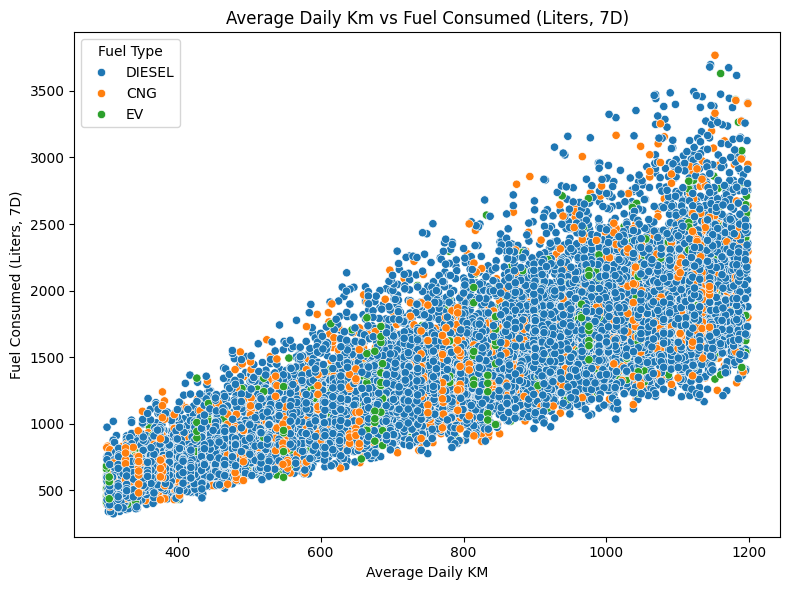

In [212]:
# Scatter plot of Mulitvariate analysis of Average Daily KM × Fuel Consumed (Liters, 7D) × Fuel Type
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_VRL_Logistics_Data,
            x = df_VRL_Logistics_Data['Average Daily KM'],
            y = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            hue = df_VRL_Logistics_Data['Fuel Type']
           )
plt.title('Average Daily Km vs Fuel Consumed (Liters, 7D)')
plt.xlabel('Average Daily KM')
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.legend(title = 'Fuel Type')
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM vs Fuel Consumed (Liters, 7D) by Fuel Type**

 -  There is **no clear pattern or separation** visible in the scatter plot..

##### Average Daily KM × Fuel Consumed (Liters, 7D) × Vehicle Type

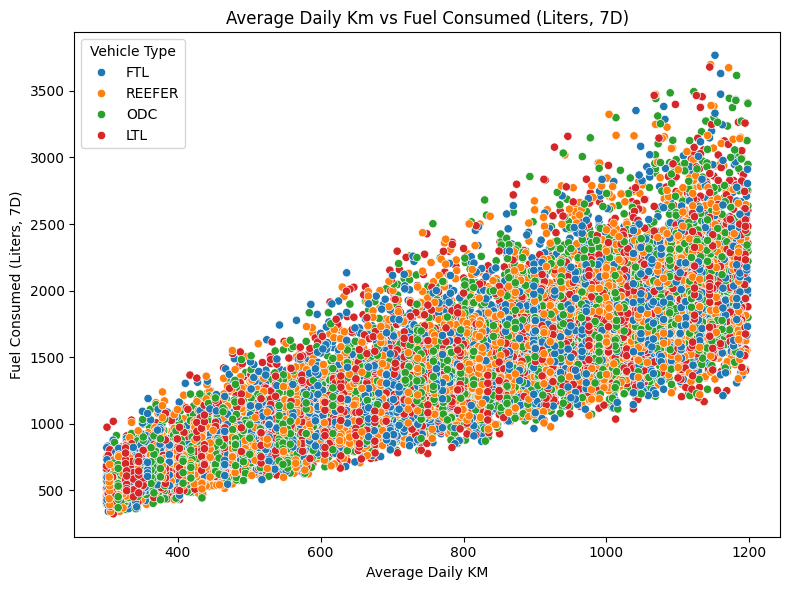

In [214]:
# Scatter plot of Mulitvariate analysis of Average Daily KM × Fuel Consumed (Liters, 7D) × Vehicle Type
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_VRL_Logistics_Data,
            x = df_VRL_Logistics_Data['Average Daily KM'],
            y = df_VRL_Logistics_Data['Fuel Consumed (Liters, 7D)'],
            hue = df_VRL_Logistics_Data['Vehicle Type']
           )
plt.title('Average Daily Km vs Fuel Consumed (Liters, 7D)')
plt.xlabel('Average Daily KM')
plt.ylabel('Fuel Consumed (Liters, 7D)')
plt.legend(title = 'Vehicle Type')
plt.tight_layout()
plt.show()

**Interpretation of Average Daily KM vs Fuel Consumed (Liters, 7D) by Vehicle Type**

 -  There is **no clear pattern or separation** visible in the scatter plot..

##### Max RPM (7D) × Avg RPM (7D) × Vehicle Type

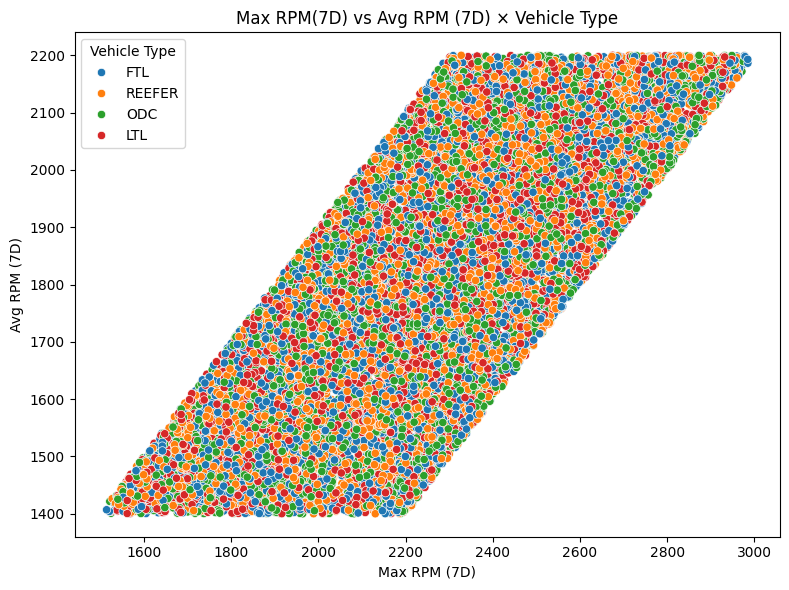

In [220]:
# Scatter plot of Mulitvariate analysis of Max RPM (7D) × Avg RPM (7D) × Vehicle Type
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_VRL_Logistics_Data,
           x = df_VRL_Logistics_Data['Max RPM (7D)'],
           y = df_VRL_Logistics_Data['Avg RPM (7D)'],
           hue = df_VRL_Logistics_Data['Vehicle Type']
           )
plt.title('Max RPM(7D) vs Avg RPM (7D) × Vehicle Type')
plt.xlabel('Max RPM (7D)')
plt.ylabel('Avg RPM (7D)')
plt.legend(title = 'Vehicle Type')
plt.tight_layout()
plt.show()

**Interpretation of Max RPM (7D) × Avg RPM (7D) × Vehicle Type**

 -  There is **no clear pattern or separation** visible in the scatter plot..

##### Average Daily KM × Max RPM (7D) × Region Operated

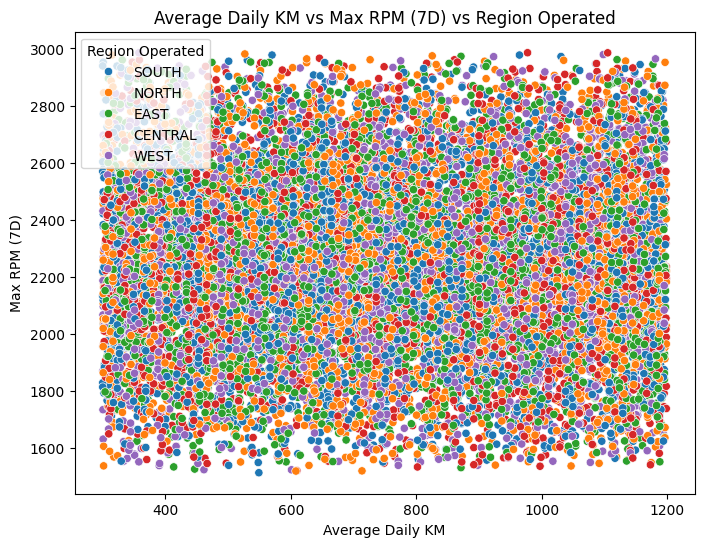

In [217]:
# Scatter plot of Mulitvariate analysis of Average Daily KM vs Max RPM (7D) vs Region Operated
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_VRL_Logistics_Data,
           x = df_VRL_Logistics_Data['Average Daily KM'],
           y = df_VRL_Logistics_Data['Max RPM (7D)'],
           hue = df_VRL_Logistics_Data['Region Operated']
           )
plt.title('Average Daily KM vs Max RPM (7D) vs Region Operated')
plt.xlabel('Average Daily KM')
plt.ylabel('Max RPM (7D)')
plt.legend(title = 'Region Operated')
plt.show()

**Interpretation of Average Daily KM vs Max RPM (7D) by Region Operated**

 -  There is **no clear pattern or separation** visible in the scatter plot..

##### Fuel Consumed (Liters, 7D) × Avg RPM (7D) × Vehicle Make

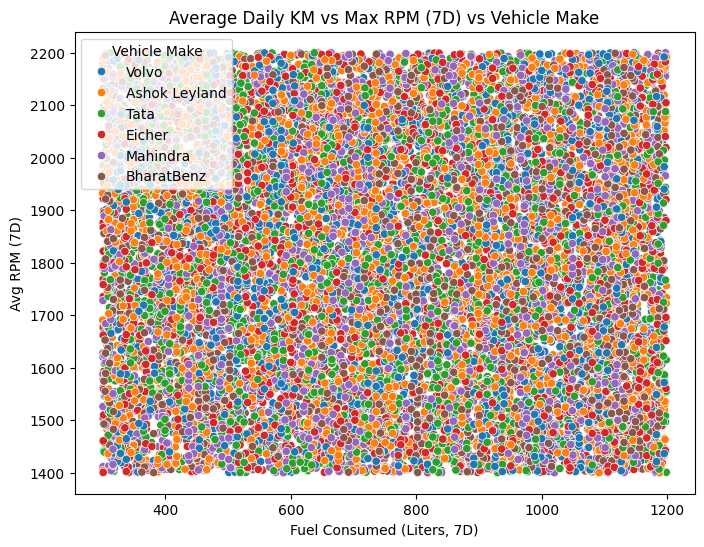

In [221]:
# Scatter plot of Mulitvariate analysis of Fuel Consumed (Liters, 7D) vs Avg RPM (7D) by Vehicle Make
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_VRL_Logistics_Data,
           x = df_VRL_Logistics_Data['Average Daily KM'],
           y = df_VRL_Logistics_Data['Avg RPM (7D)'],
           hue = df_VRL_Logistics_Data['Vehicle Make']
           )
plt.title('Average Daily KM vs Max RPM (7D) vs Vehicle Make')
plt.xlabel('Fuel Consumed (Liters, 7D)')
plt.ylabel('Avg RPM (7D)')
plt.legend(title = 'Vehicle Make')
plt.show()

**Interpretation of Fuel Consumed (Liters, 7D) vs Avg RPM (7D) by Vehicle Make**

 -  There is **no clear pattern or separation** visible in the scatter plot..